In [122]:
import pandas as pd
from tqdm import tqdm
from IPython.display import display, HTML
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
import math
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import scipy
from matplotlib.mlab import PCA

%matplotlib inline  
DEFAULT_DPI = 600
matplotlib.rcParams['figure.figsize'] = (15, 8)

from sklearn import linear_model
import numpy.ma as ma

In [56]:
data = pd.read_table('dataset_16_3_learn', sep='\t', header=None)

In [57]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,2d091df8a60dacb2fd48f00eb340a6c9,cd48b669c676c59e90afc3f5119a0a96,0,-,0,1415200687,5.0,-,-,0,...,-,-,-,-,0,0,0,1,0,0
1,58eda80fdf63f18e62fe493df573f1ed,b34e651ea850a5d0f899c01e6c7f74ef,0,-,0,1415123460,6.0,-,-,0,...,-,-,-,-,0,0,0,1,0,0
2,a0ce2b827a3b205ec8020c68ceb98307,d80617175761603da848bb556e92fb15,0,-,0,1411382781,49.0,-,-,0,...,-,-,-,-,0,0,0,1,0,0
3,881dff0c119e24c589f39a5d0dcc97b6,6cda5a37c4e4ffa6b8ff7ea2b3210f49,0,-,0,1415723772,0.0,-,-,0,...,-,-,-,-,0,0,0,1,0,0
4,60bc5343689d74e3242f402dd4e951fb,b117e1626a32ede00473a84c900d5aec,0,-,0,1415695240,0.0,-,-,0,...,-,-,-,-,0,0,0,1,0,0


# Первичная обработка

На основе части 2 не буду ни на что менять 0, а пропуски заменю на eps.

Далее повторение начала части 2.

In [58]:
del data[0]
del data[1]

In [59]:
columns_number = 140
n = len(data)
print(n)
eps = 10**(-6)

9153


In [60]:
def convert(s):
    dict = {'пн':1., 'вт':2., 'ср':3., 'чт':4., 'пт':5., 'сб':6., 'вс':7., '-':eps, '':eps, None:eps}
    if s in dict.keys():
        return dict[s]
    else:
        return float(s)

In [61]:
converted_data = pd.DataFrame()
for index, row in tqdm(data.iterrows()):
    new_row = []
    for i in range(2, columns_number):
        new_row.append(convert(row[i]))
    converted_data = converted_data.append([new_row])

9153it [02:28, 61.54it/s]


In [62]:
samples = np.asarray(converted_data)
samplesT = samples.T
columns_number -=2

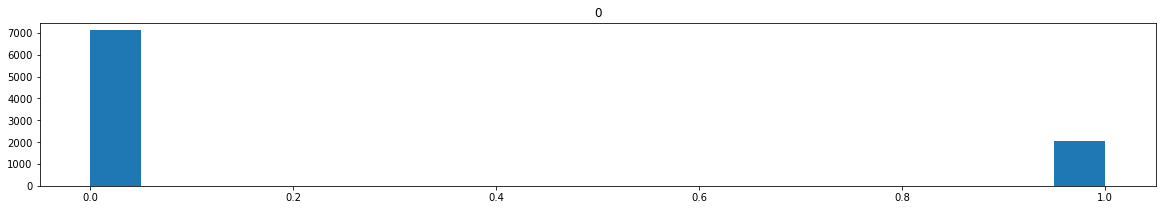

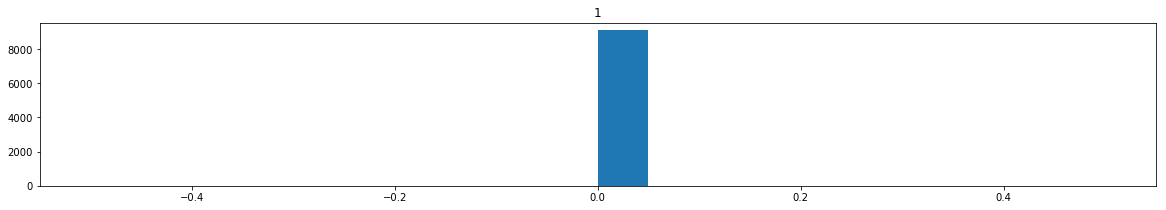

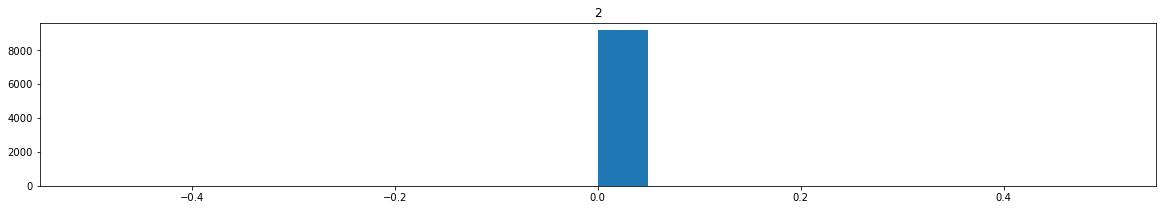

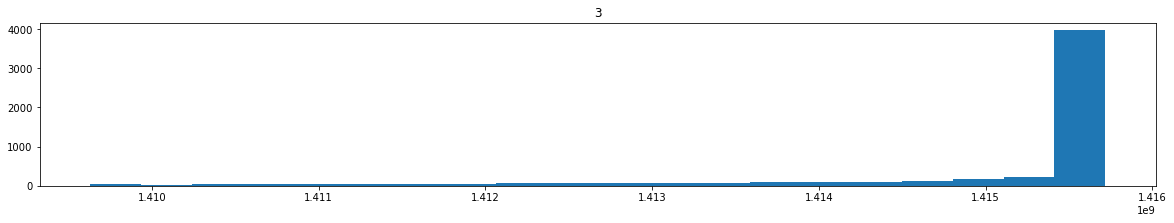

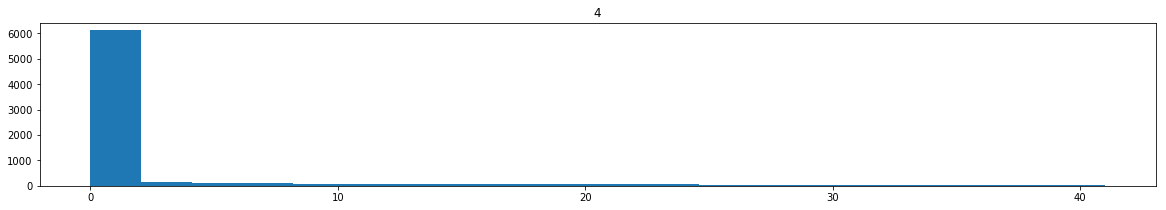

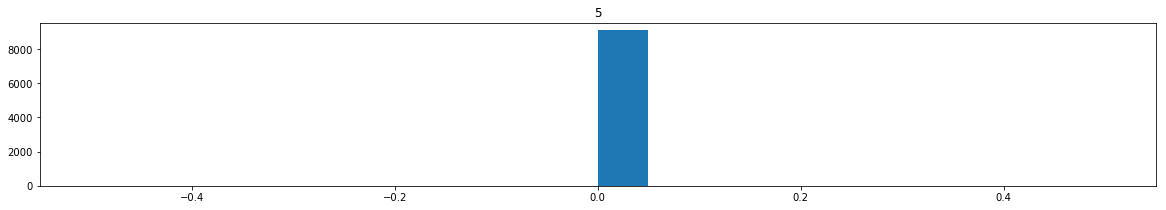

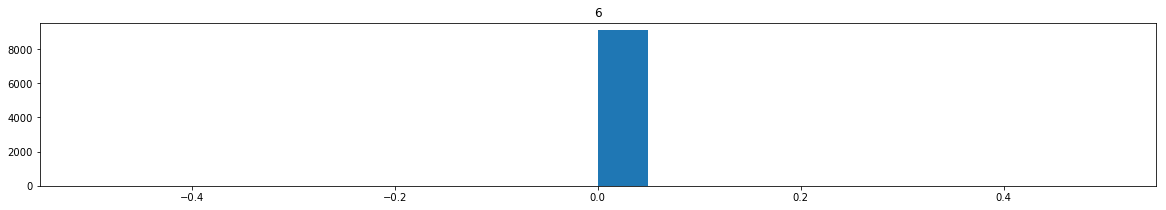

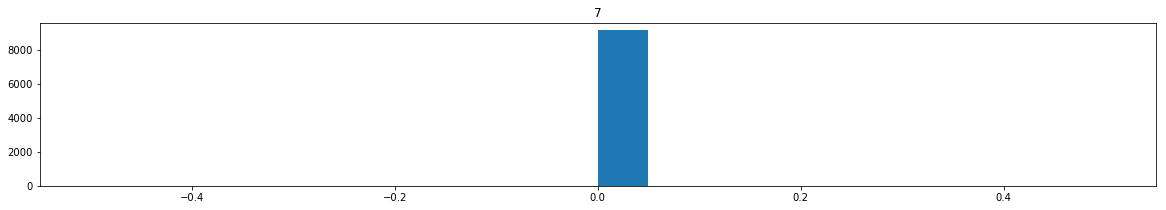

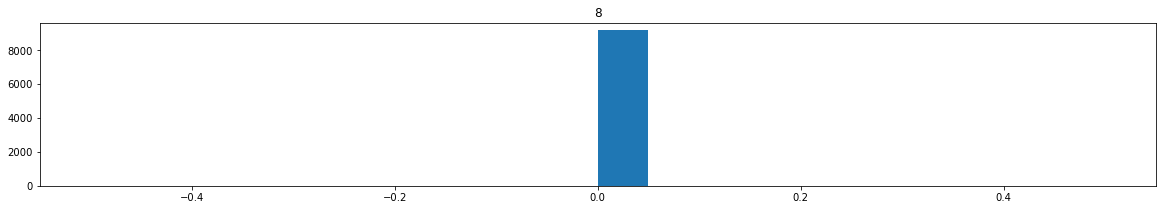

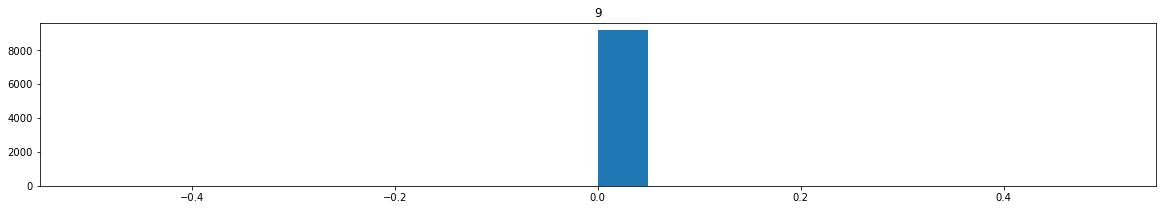

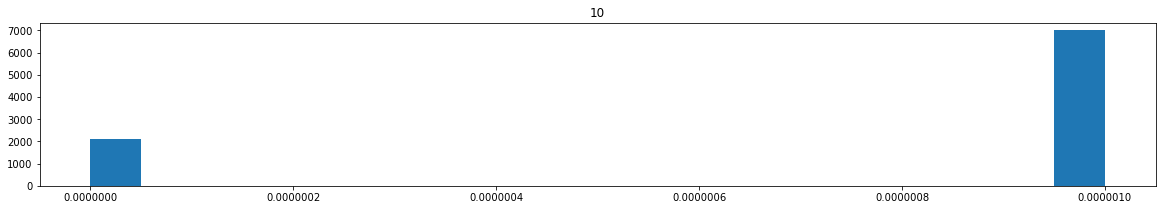

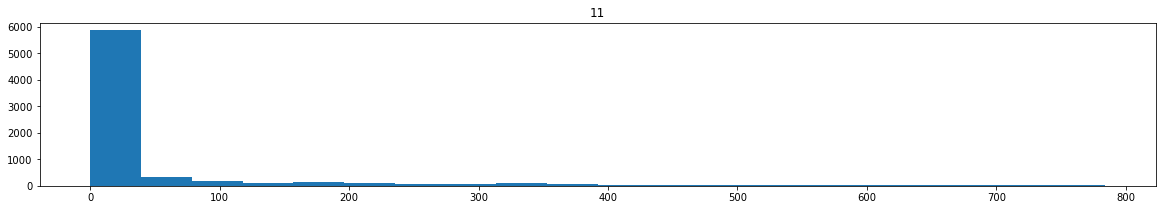

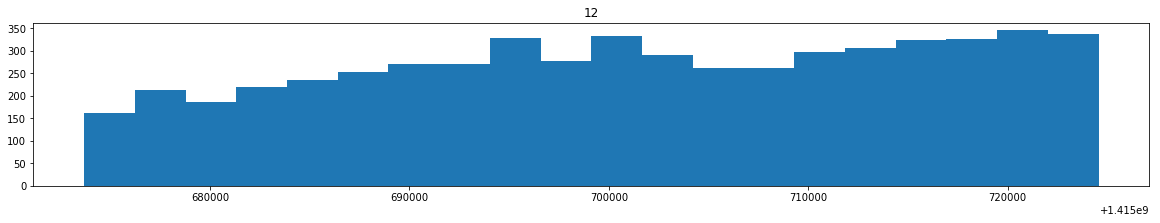

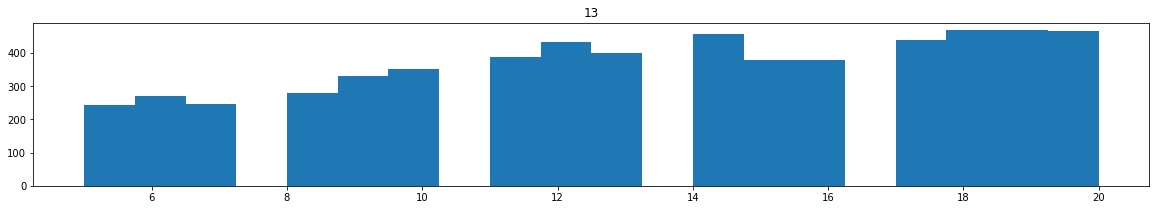

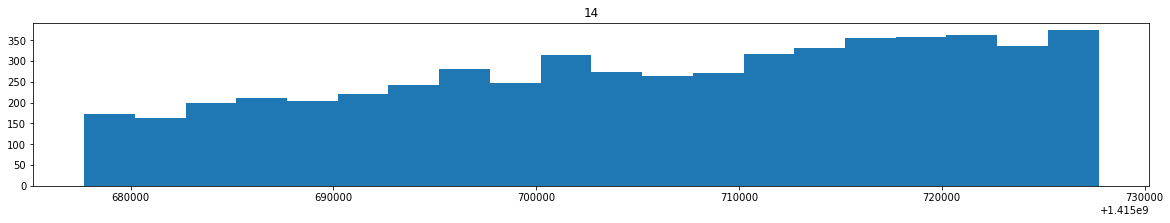

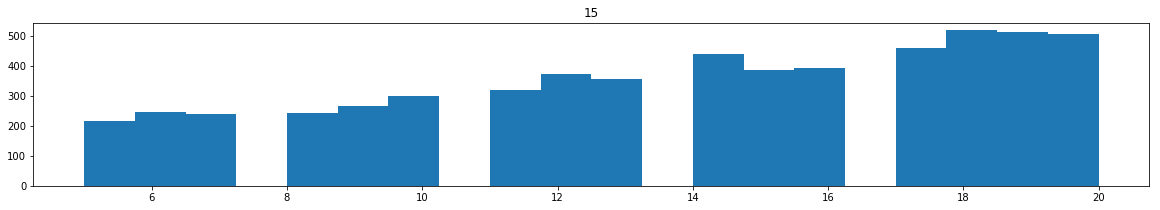

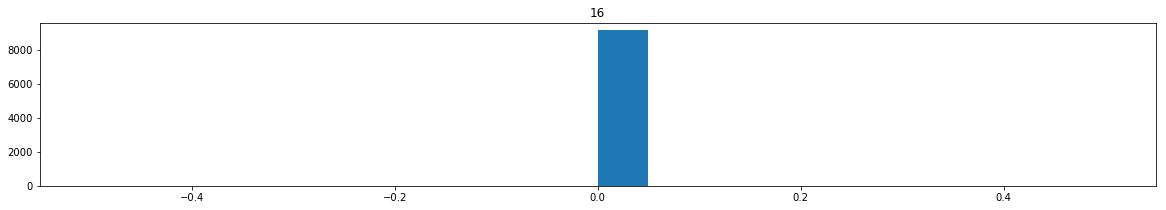

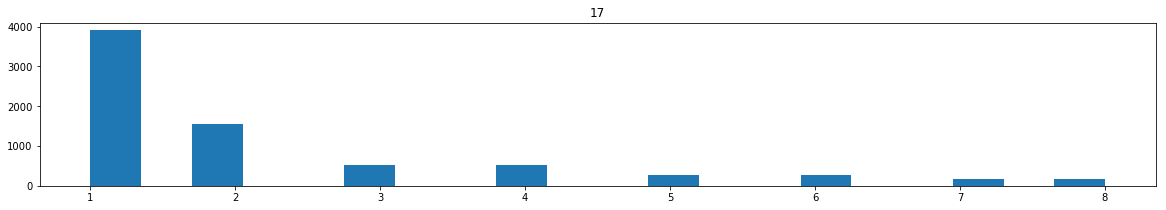

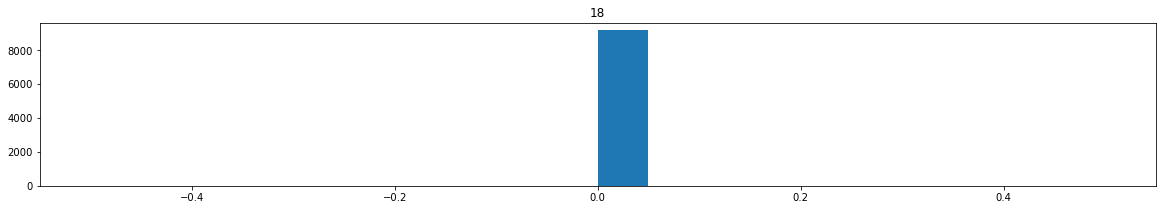

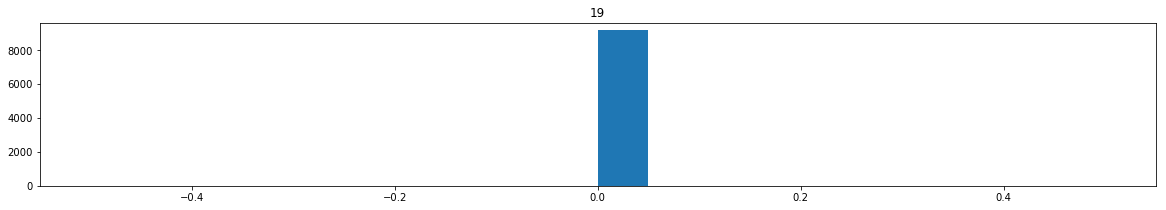

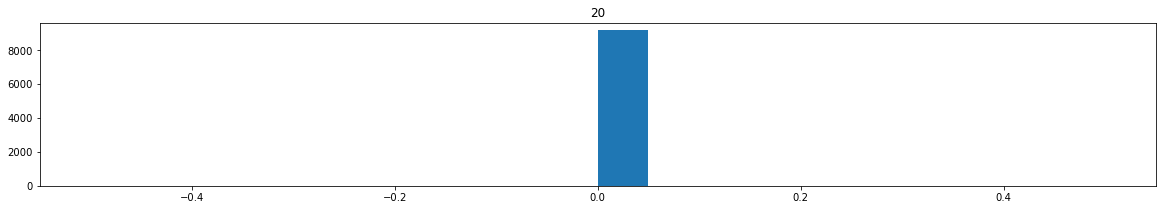

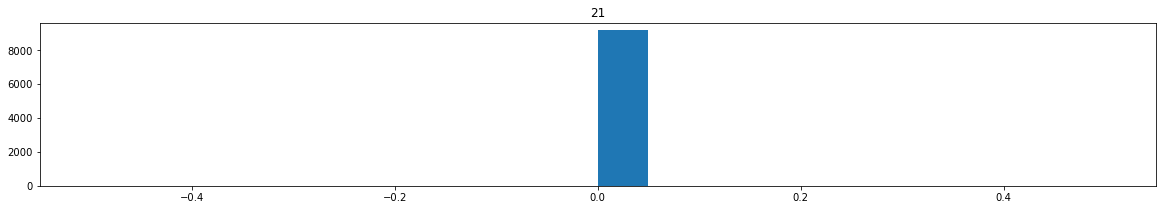

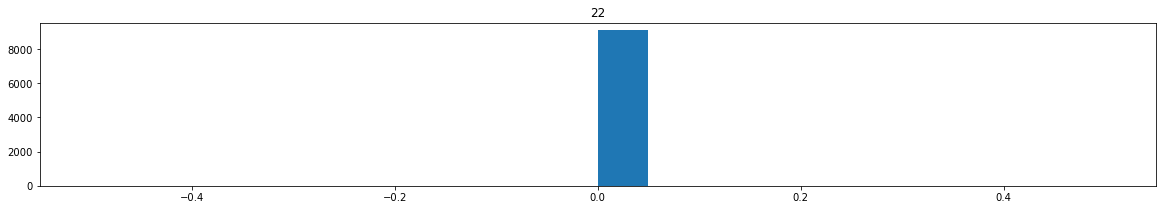

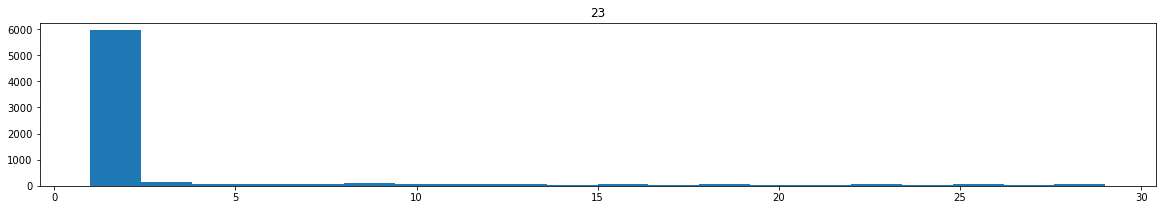

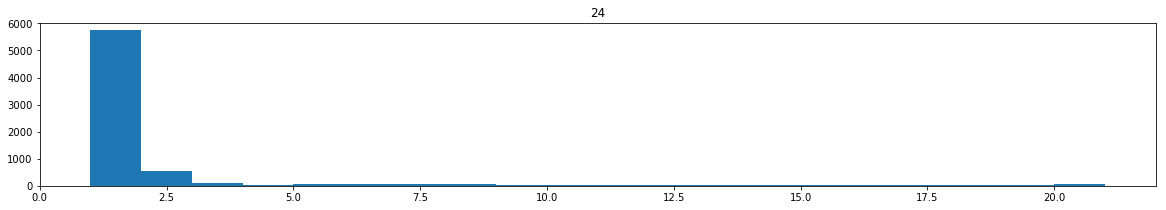

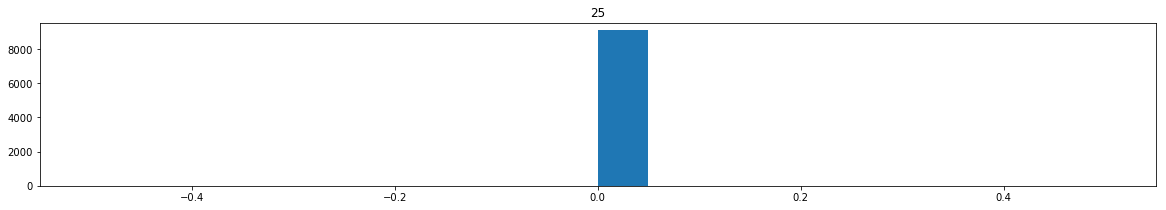

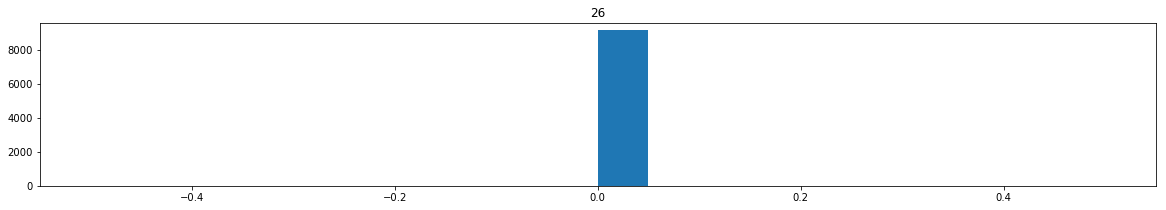

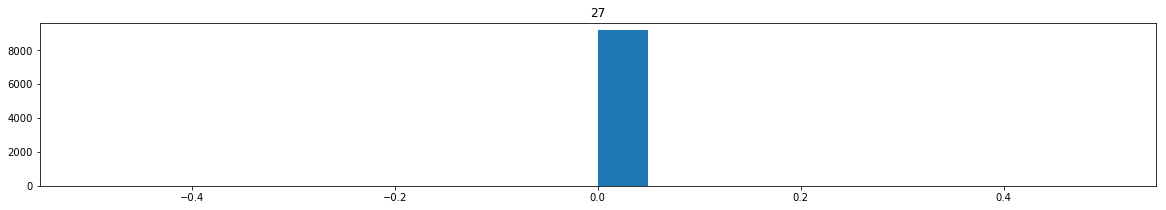

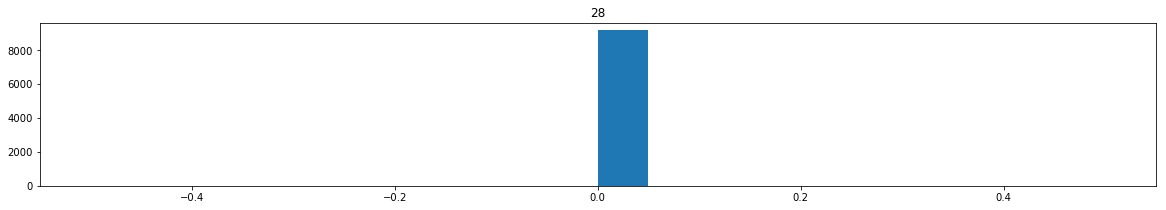

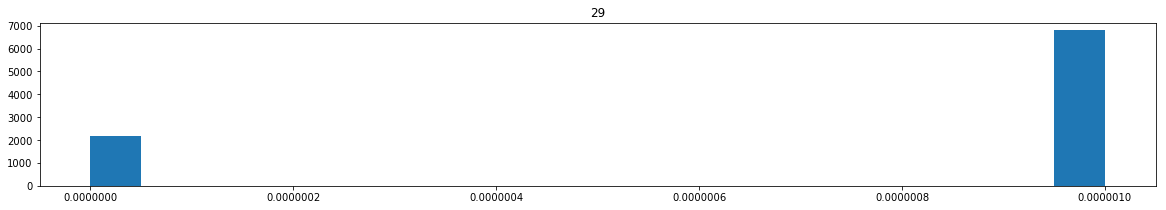

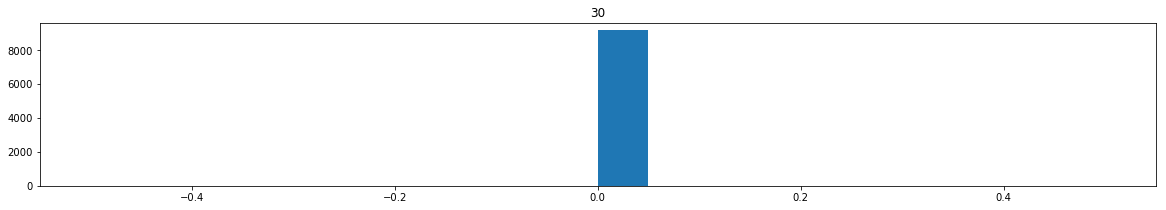

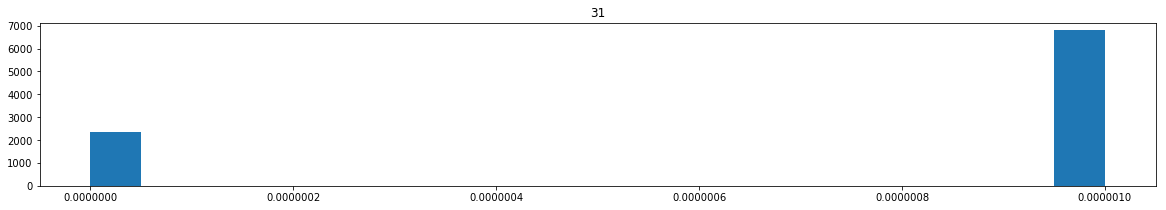

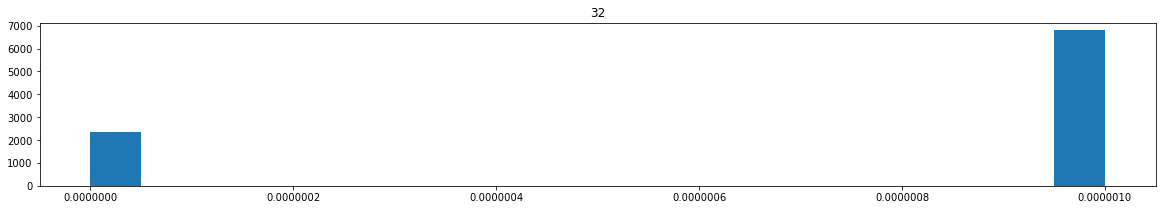

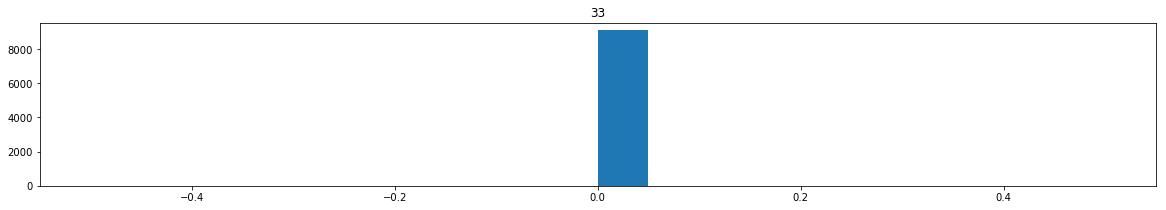

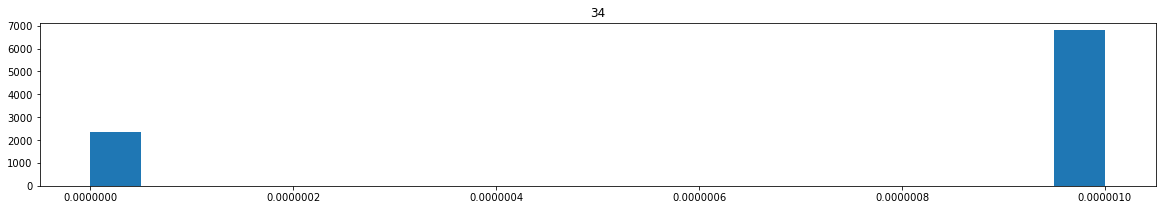

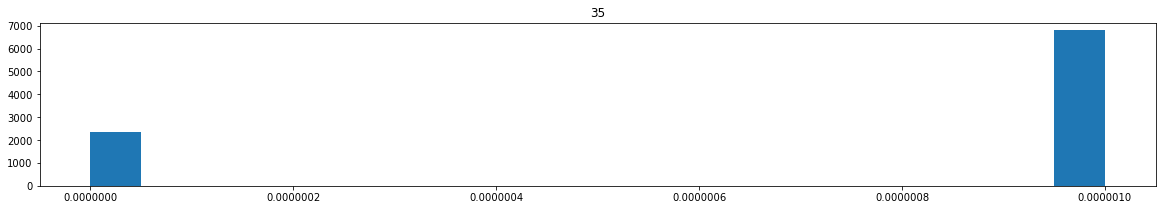

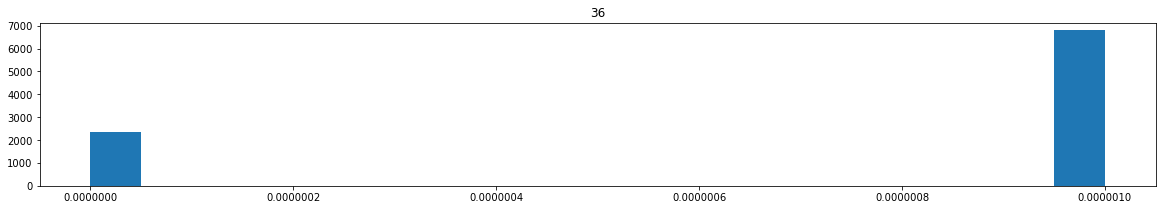

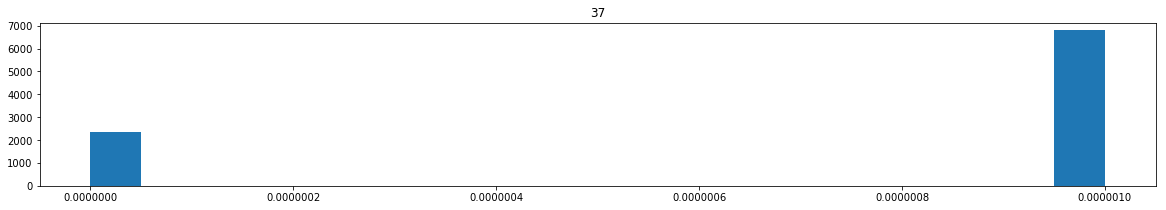

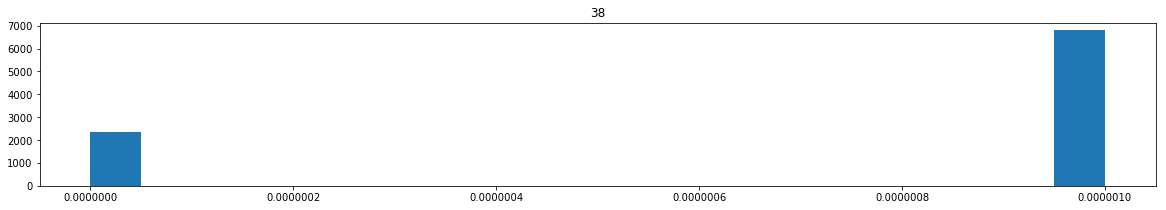

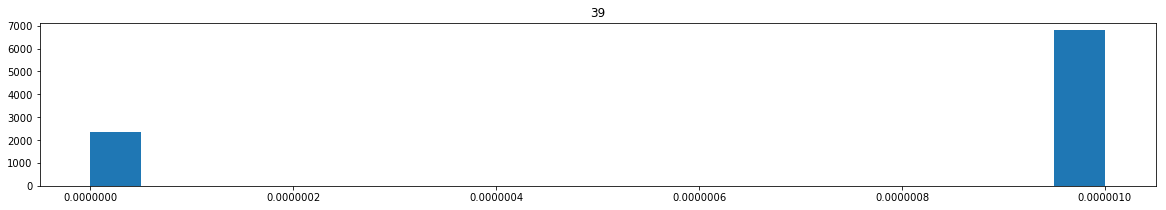

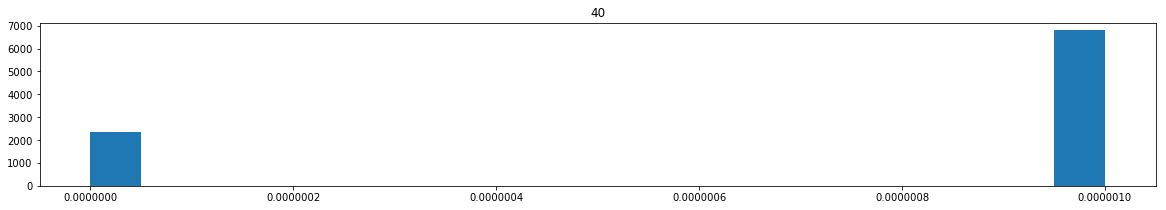

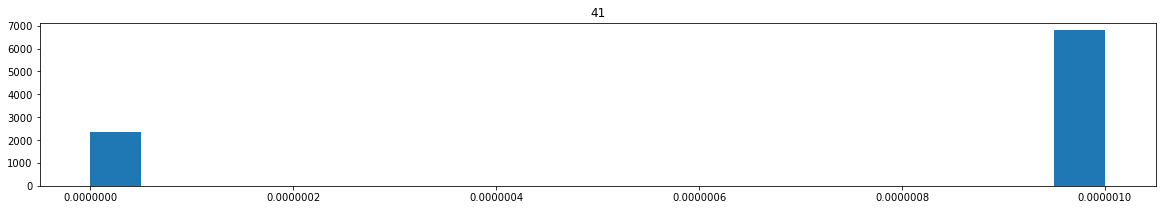

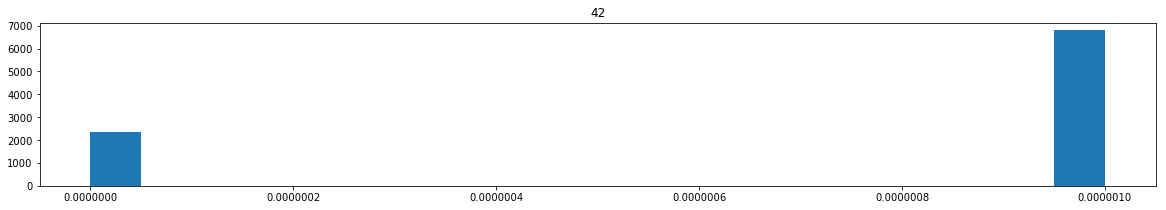

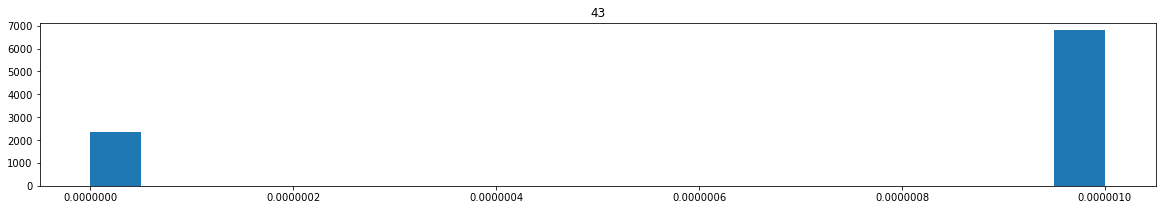

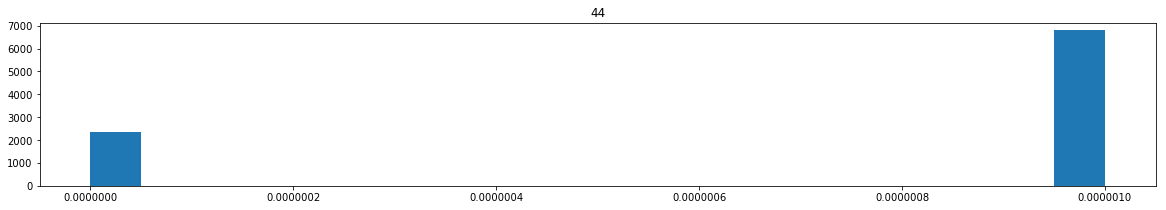

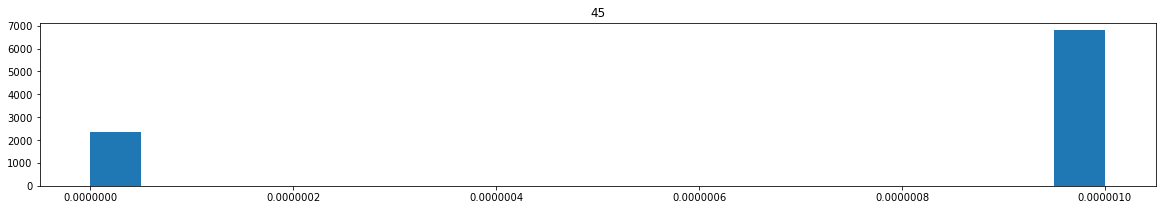

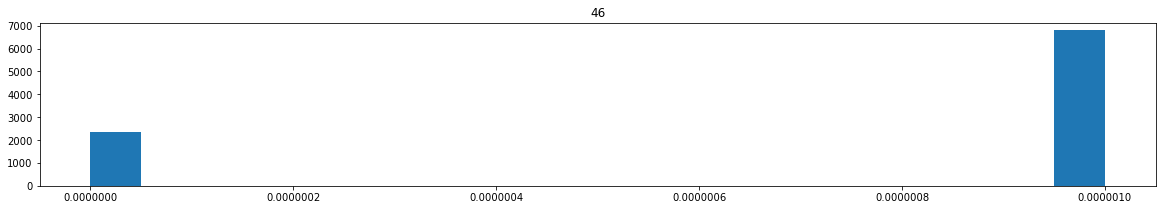

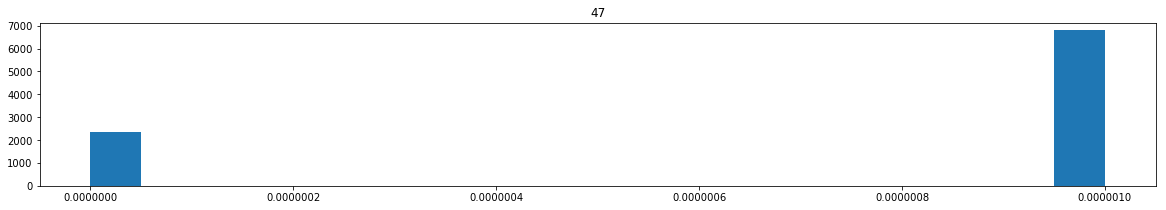

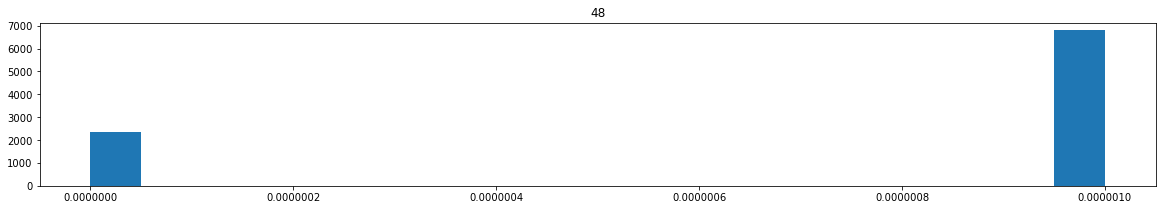

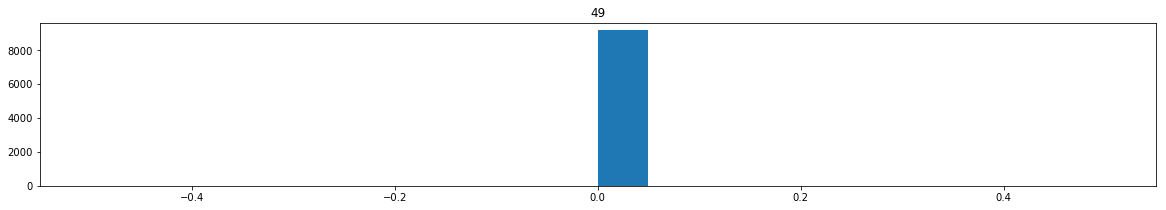

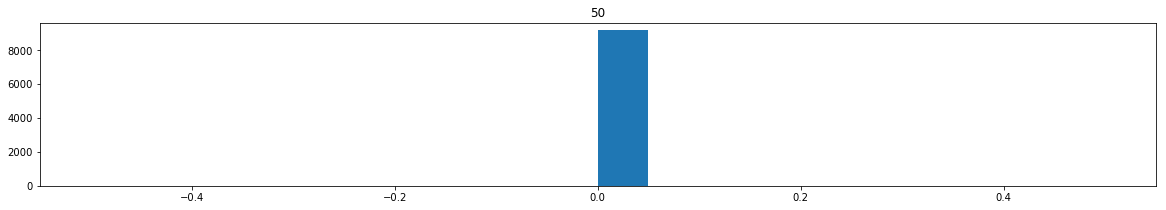

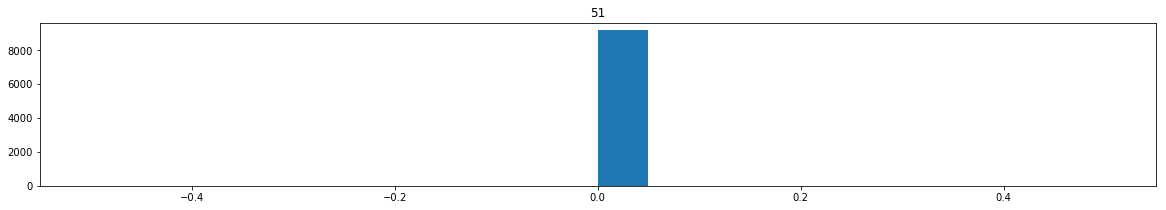

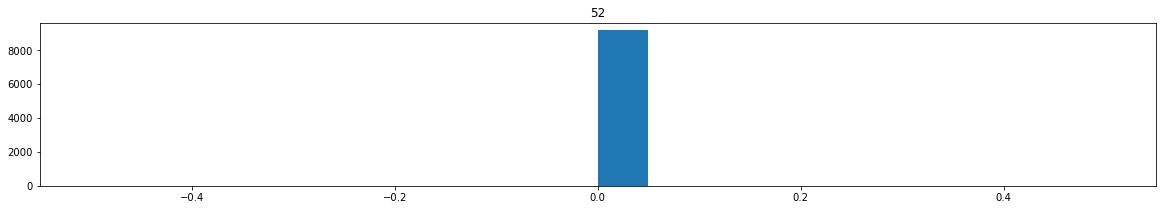

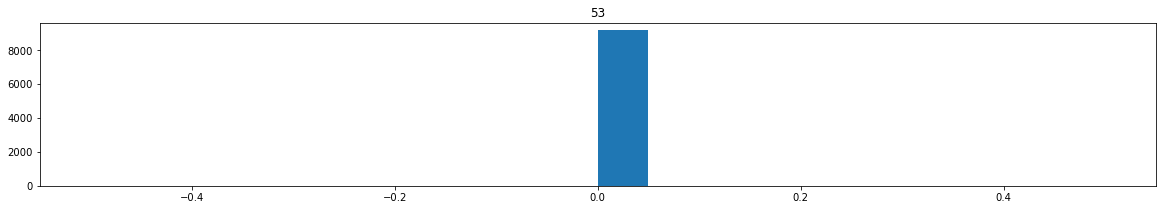

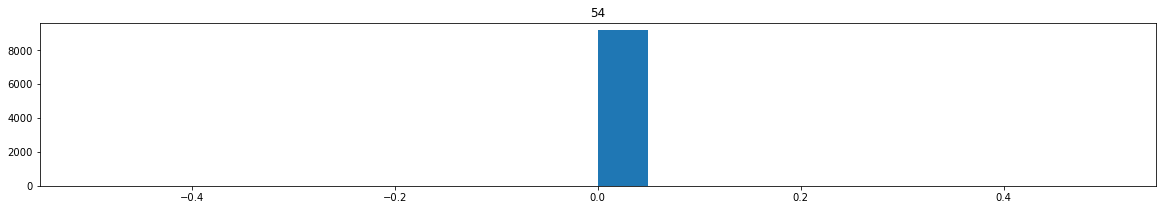

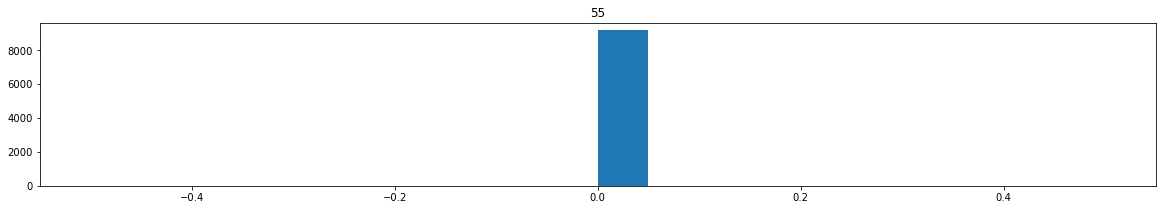

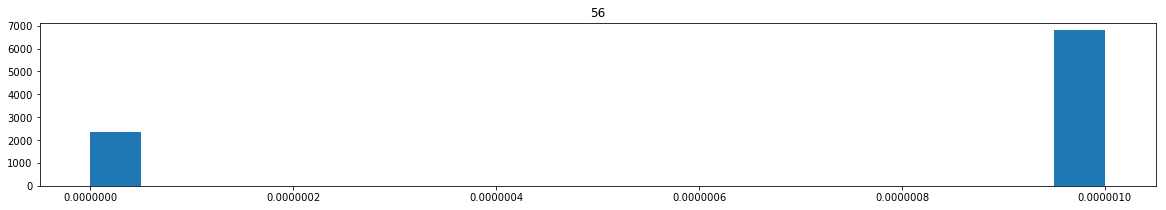

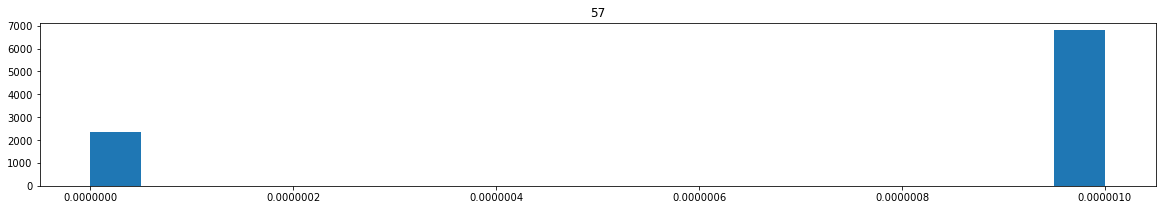

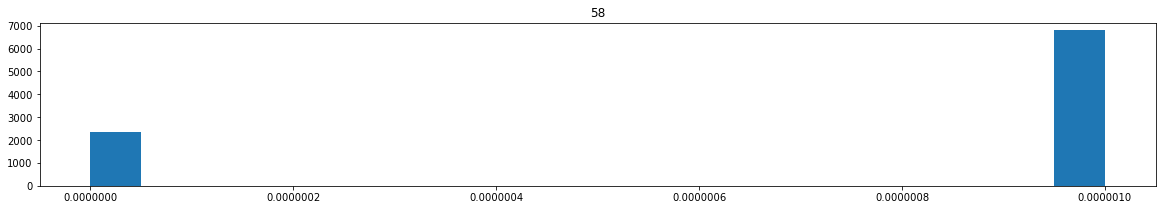

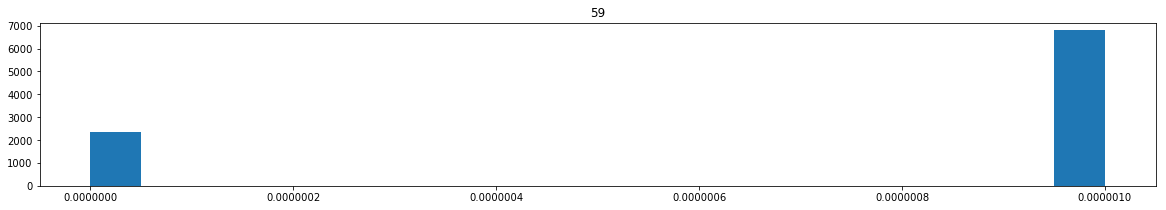

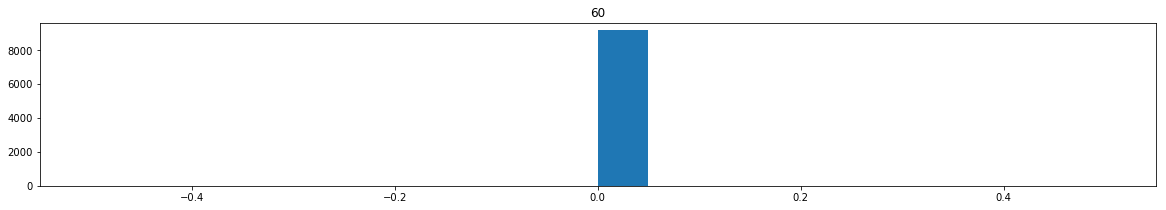

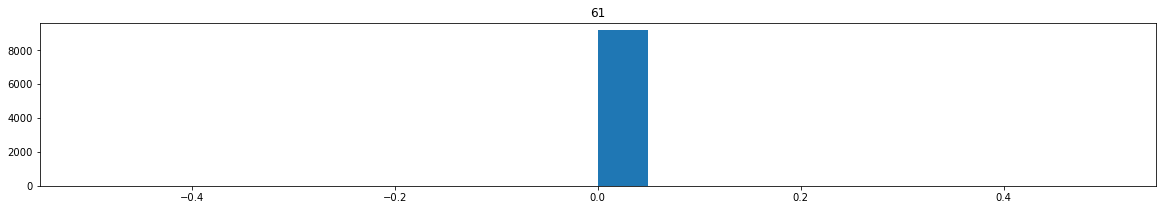

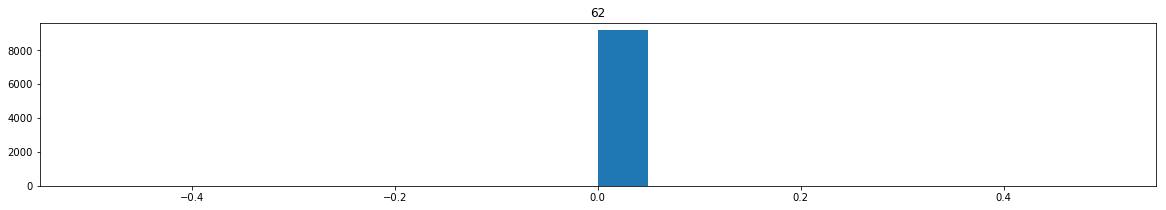

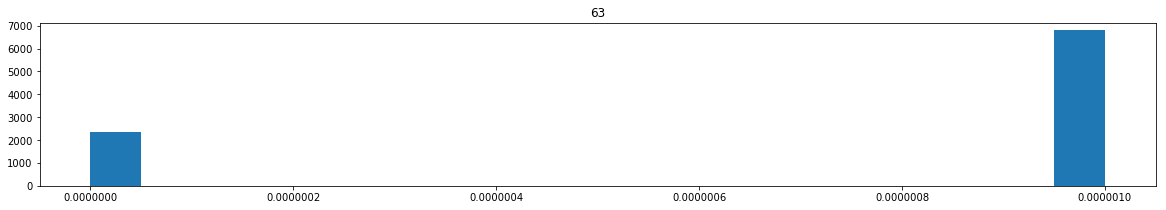

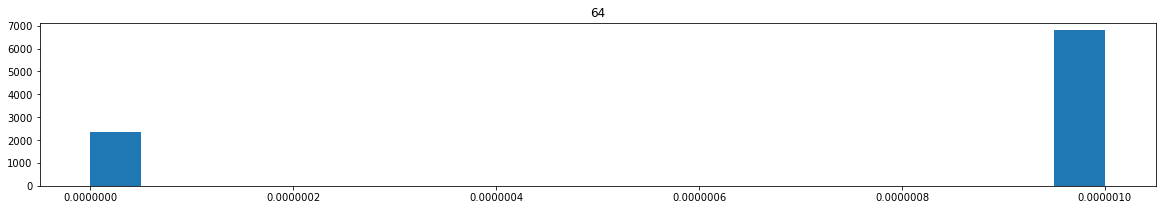

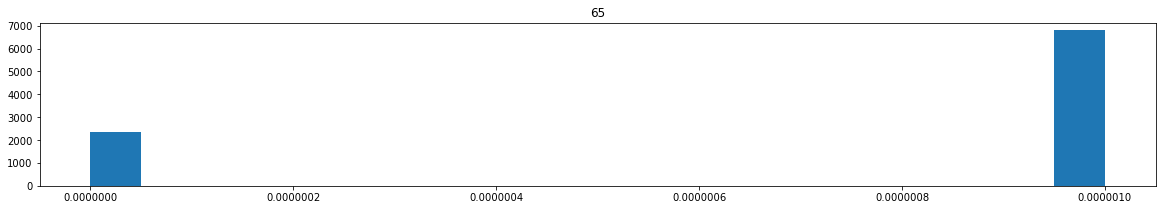

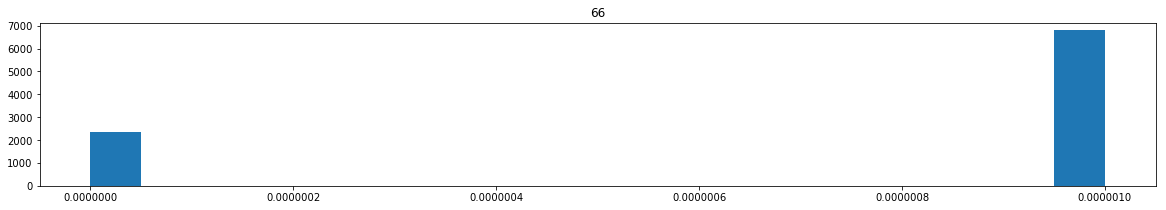

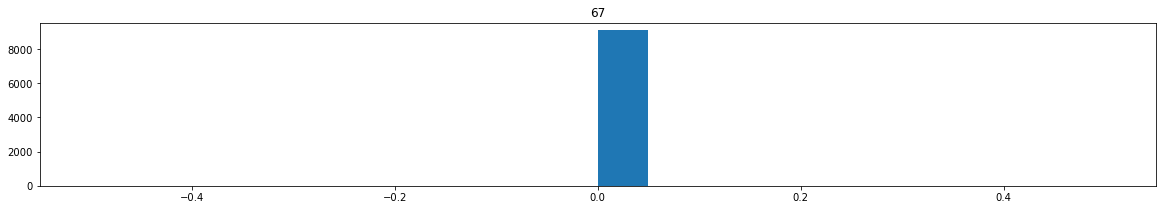

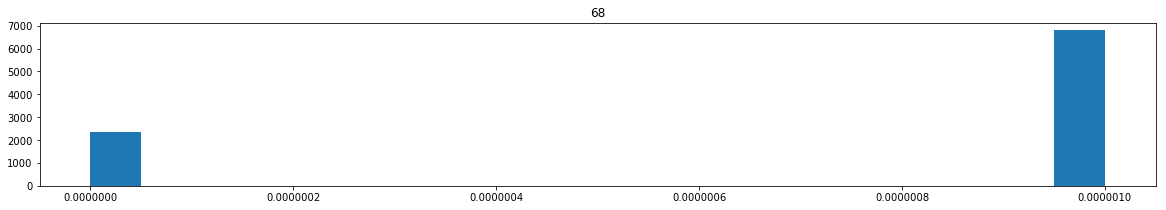

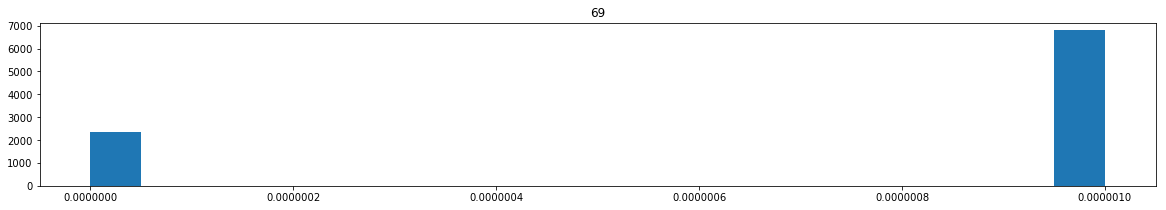

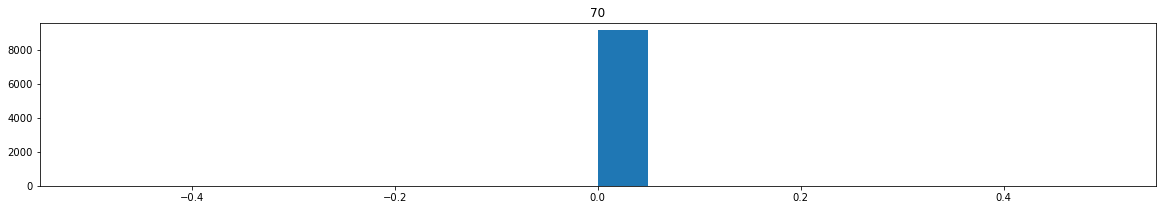

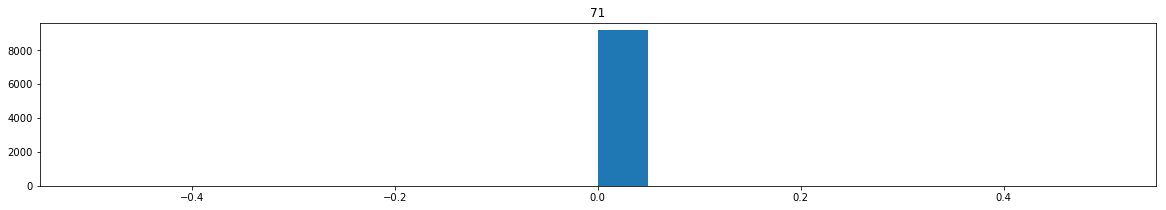

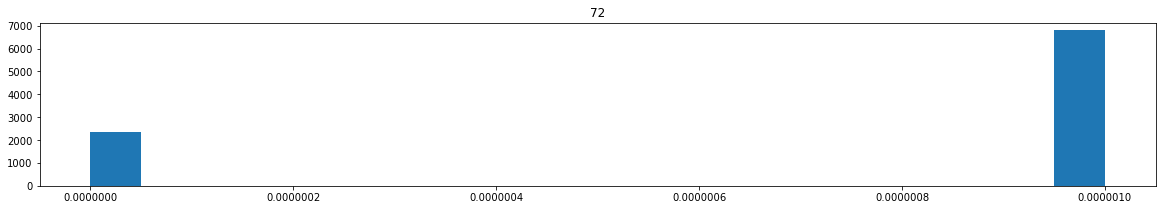

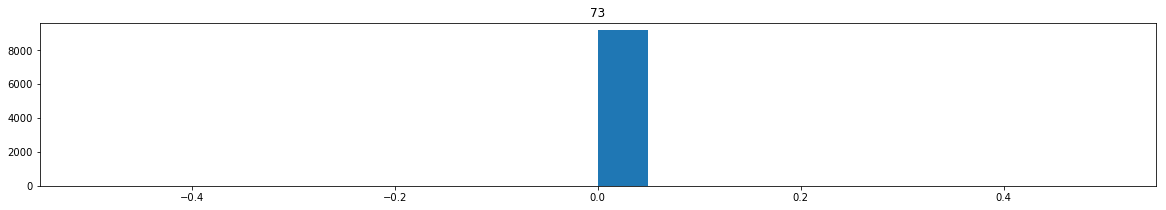

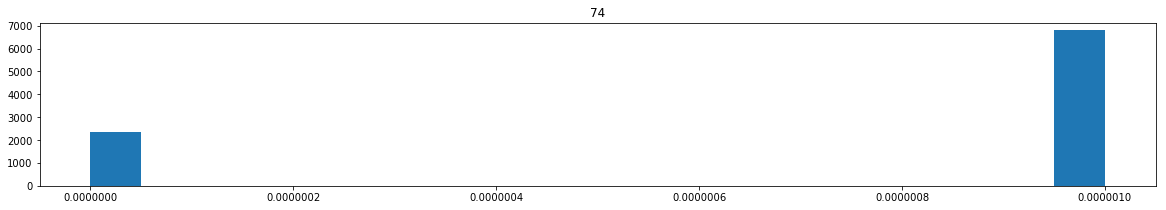

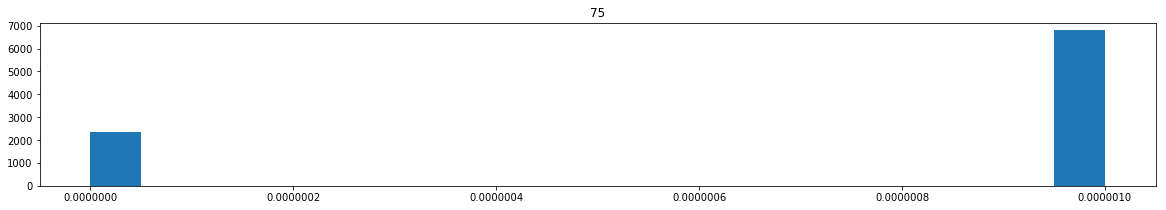

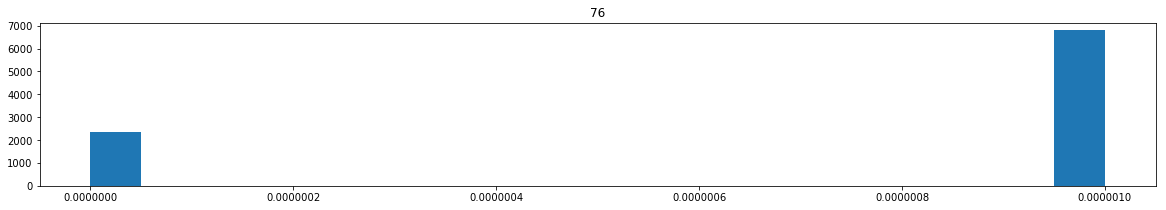

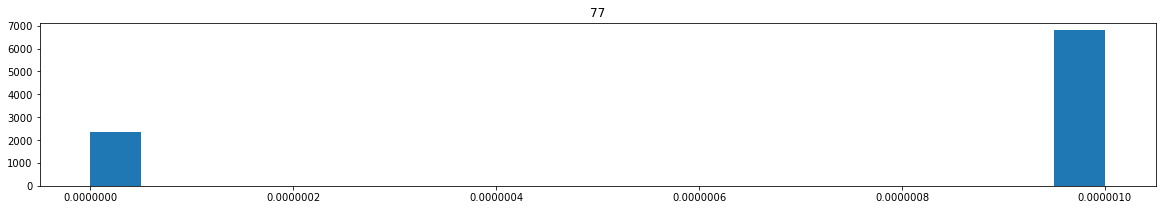

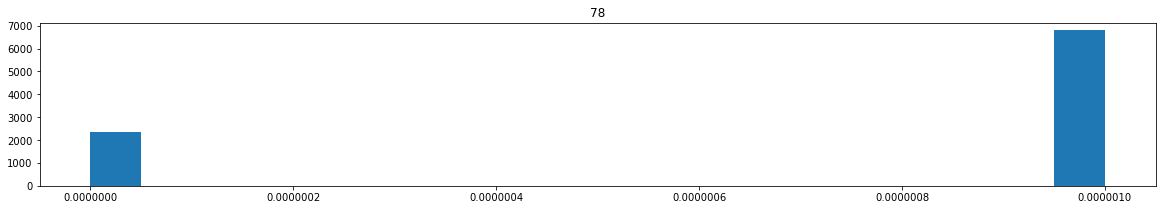

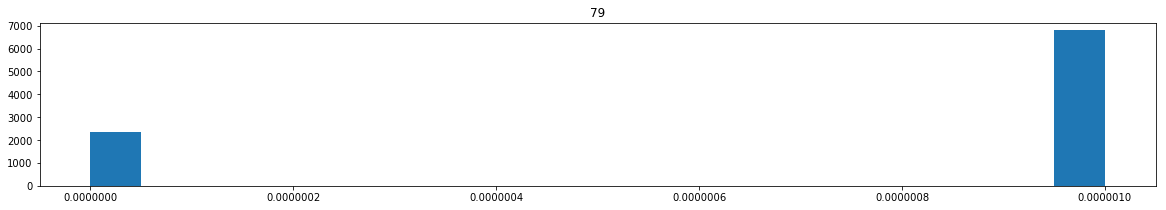

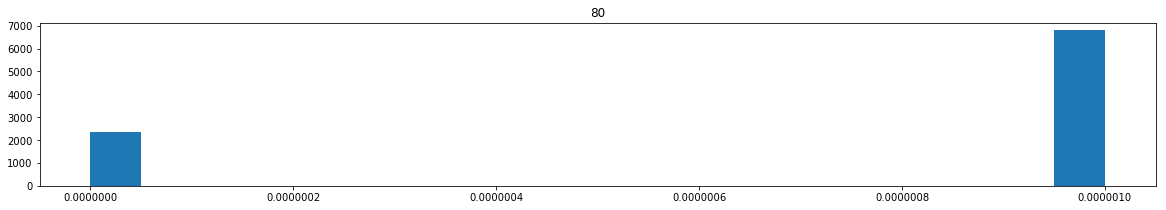

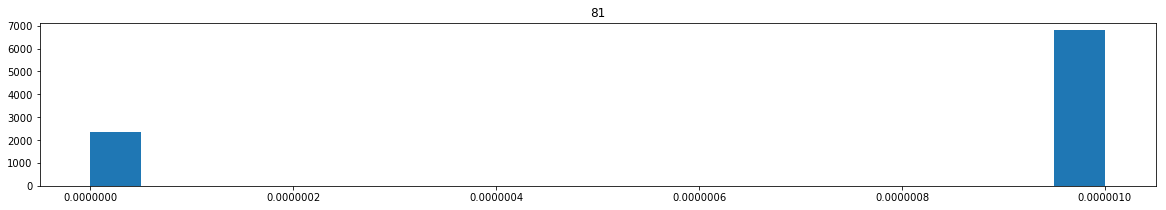

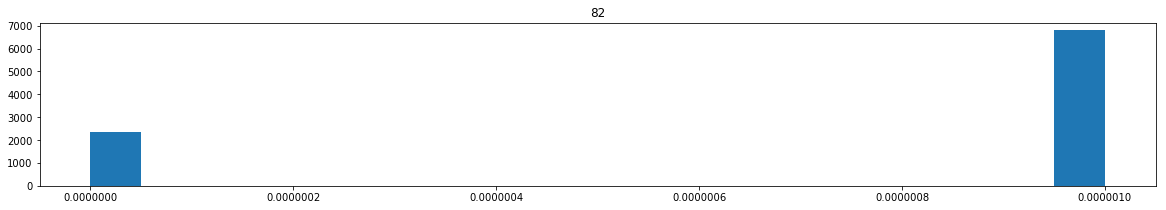

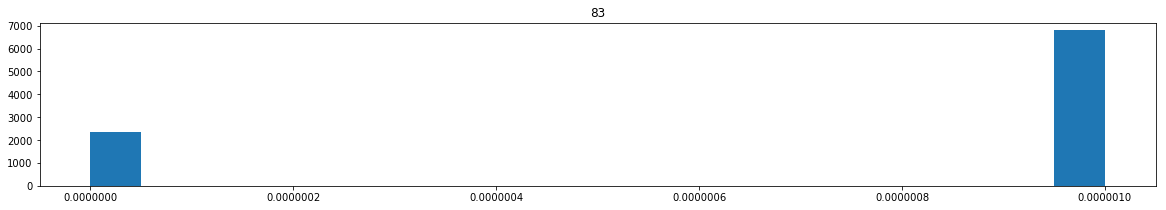

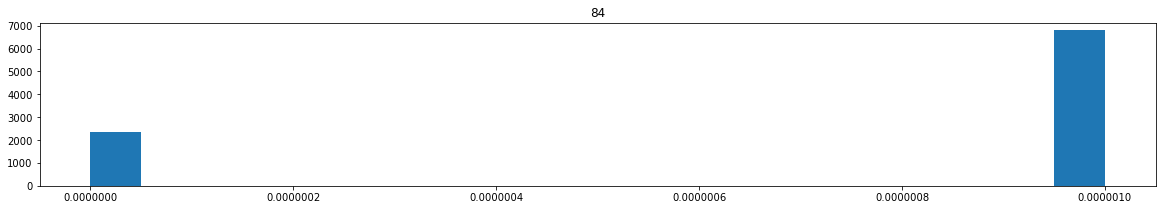

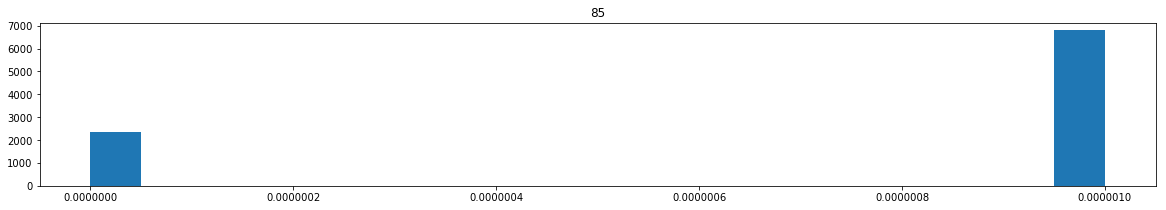

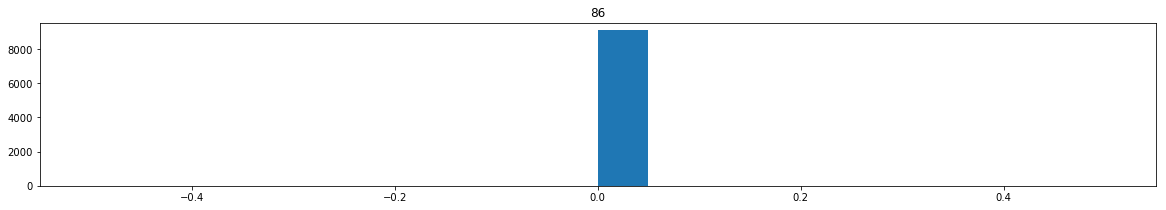

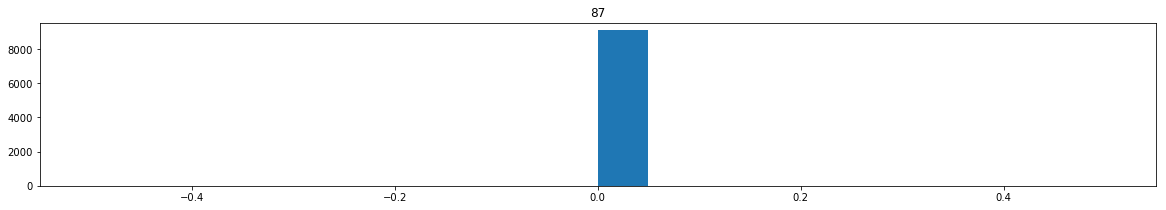

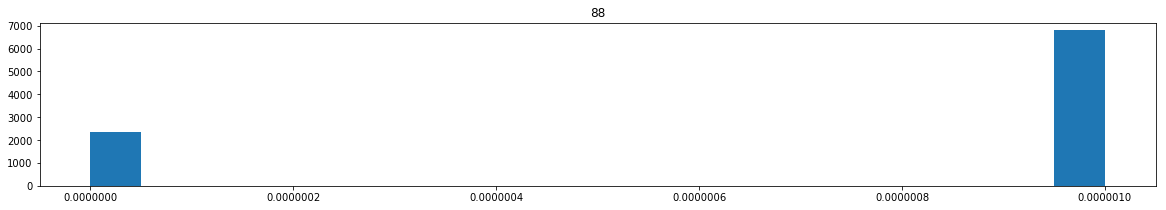

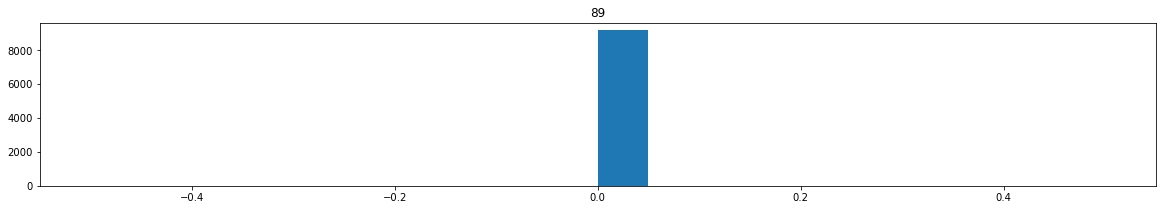

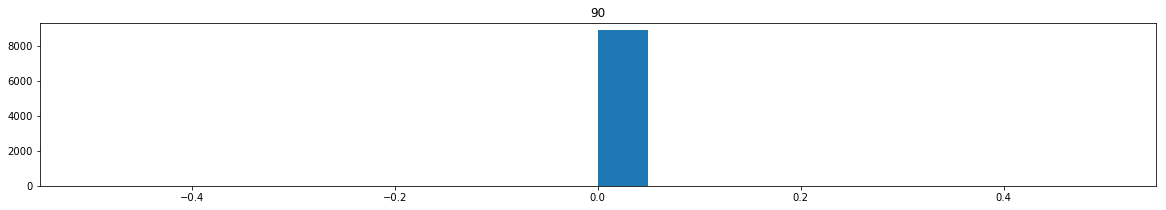

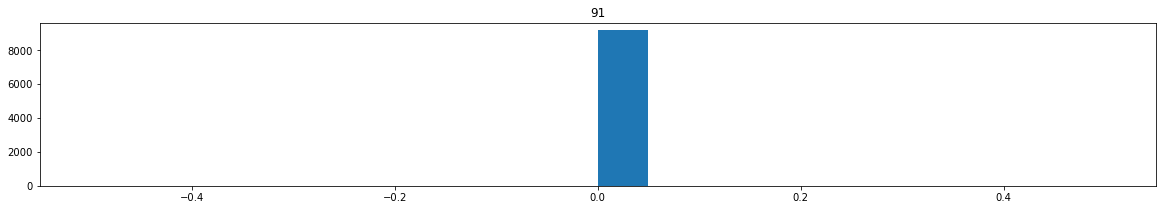

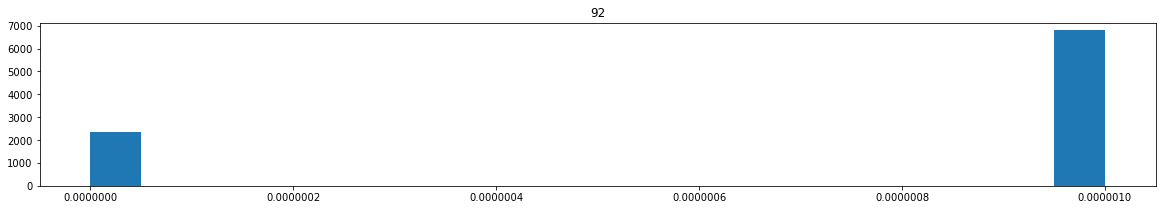

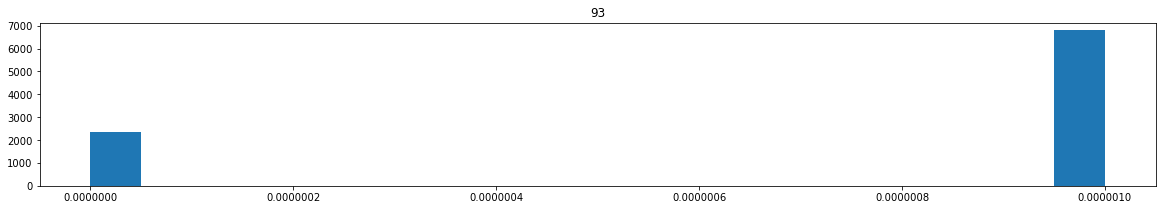

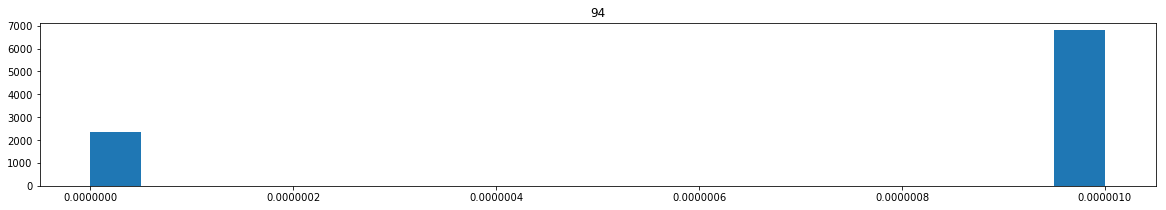

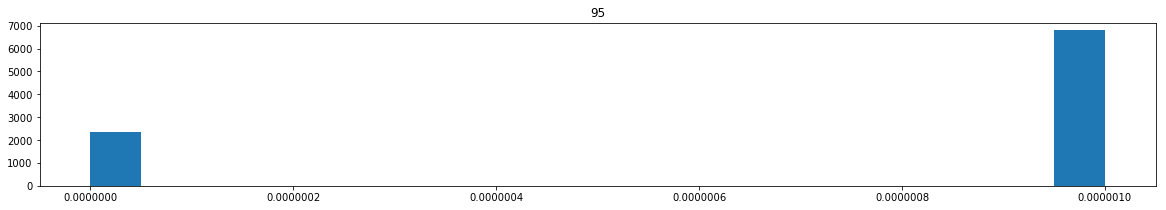

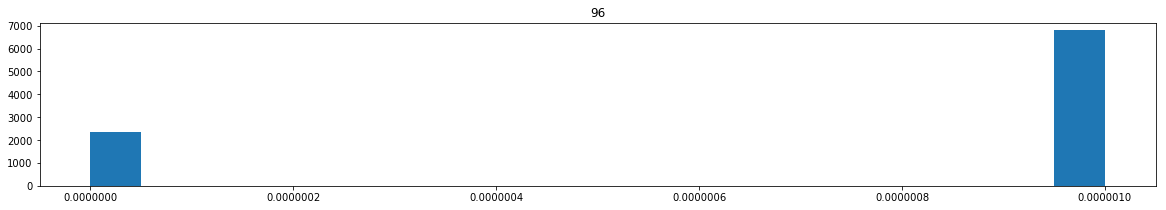

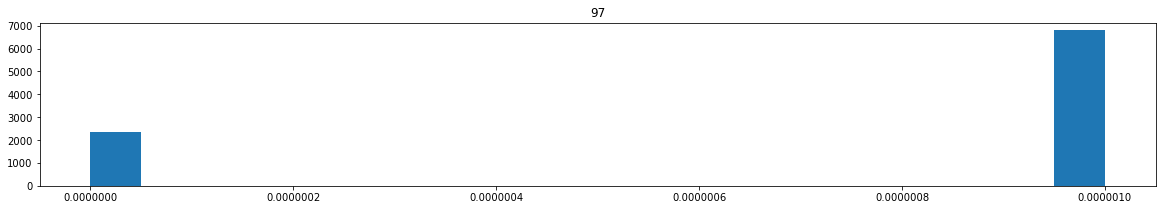

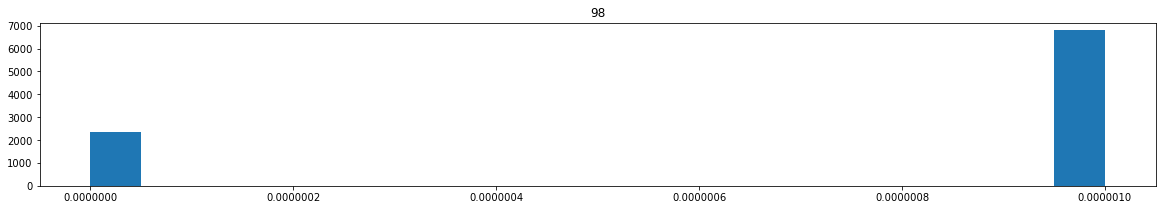

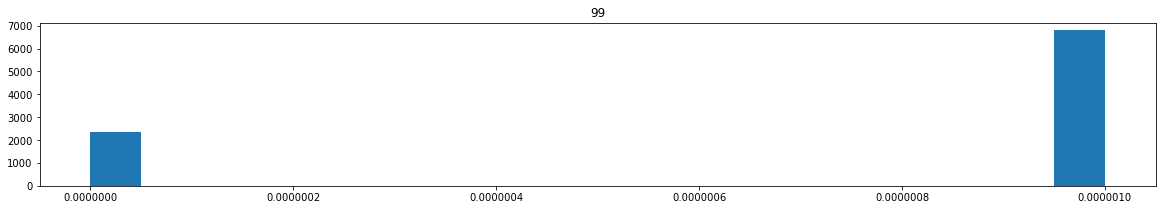

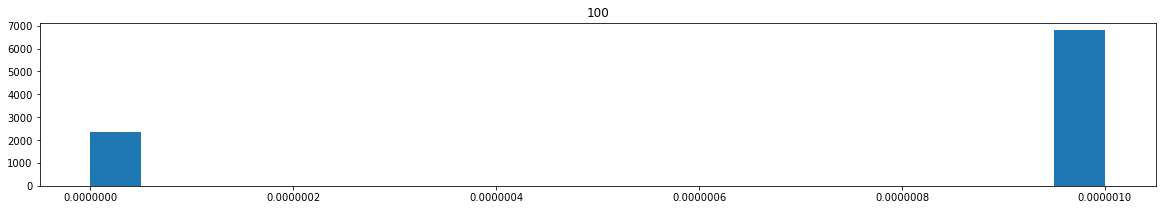

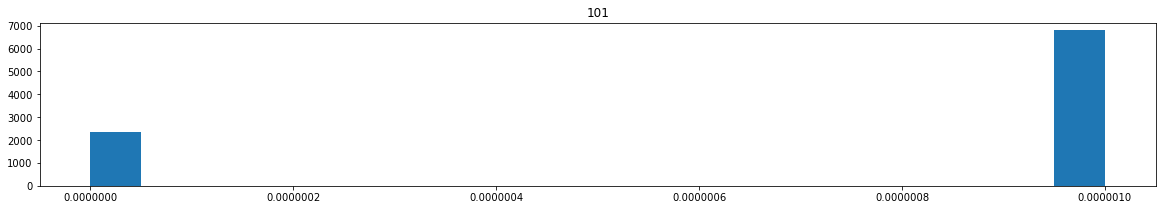

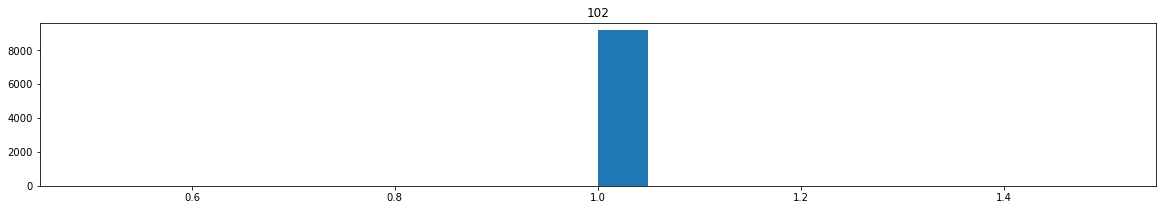

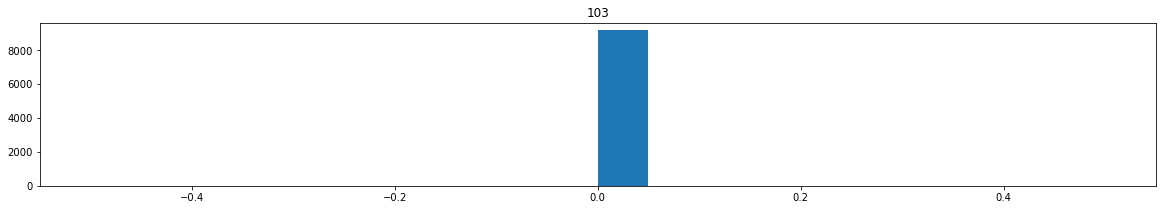

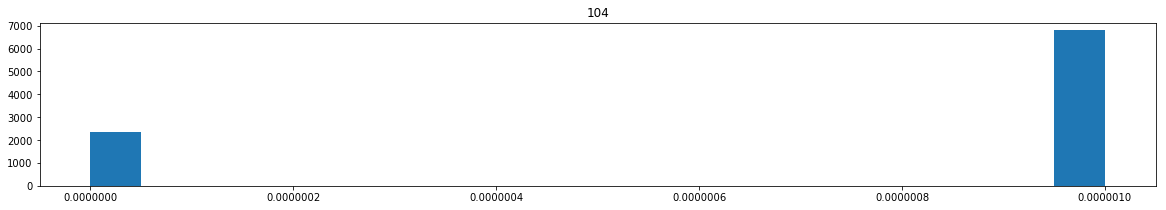

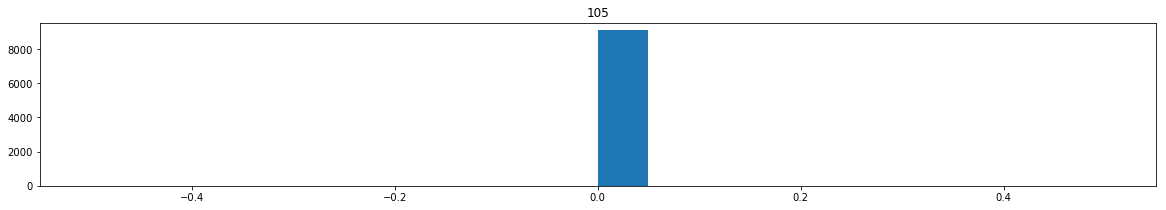

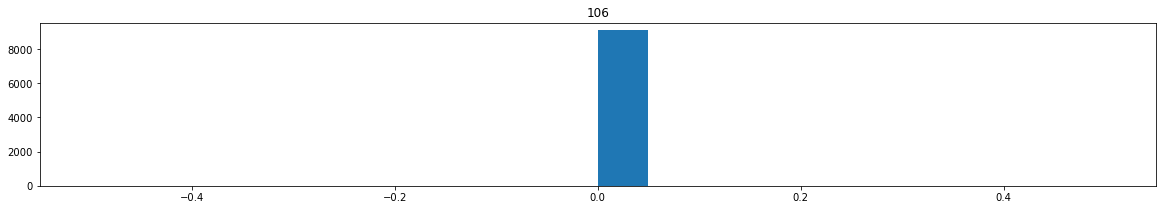

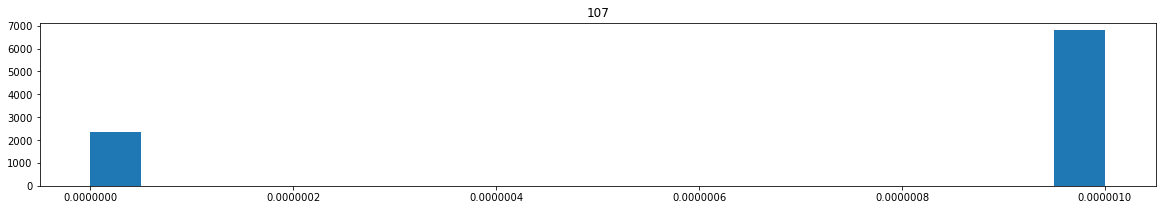

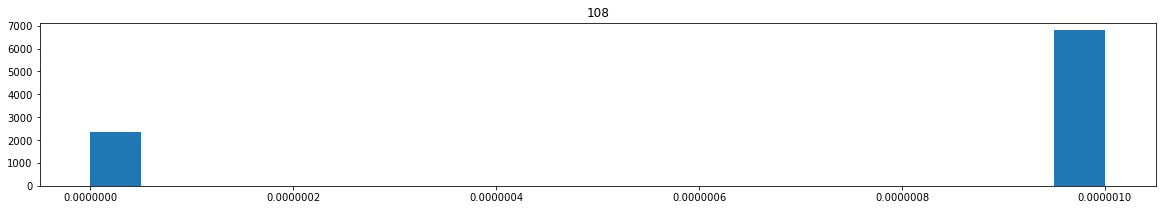

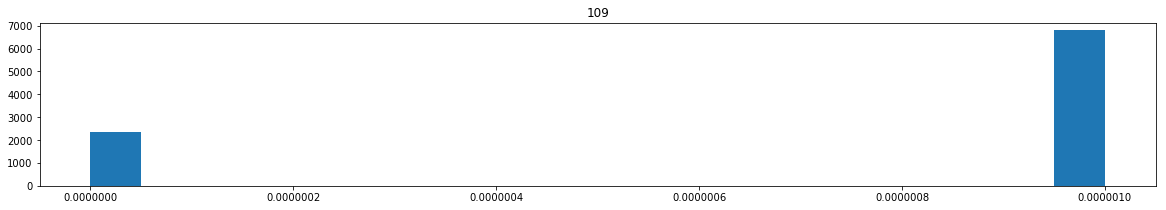

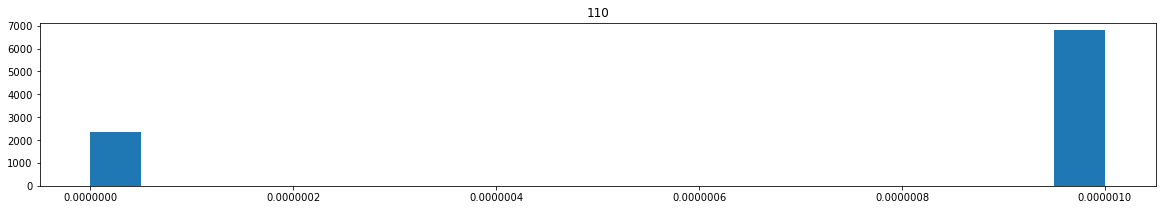

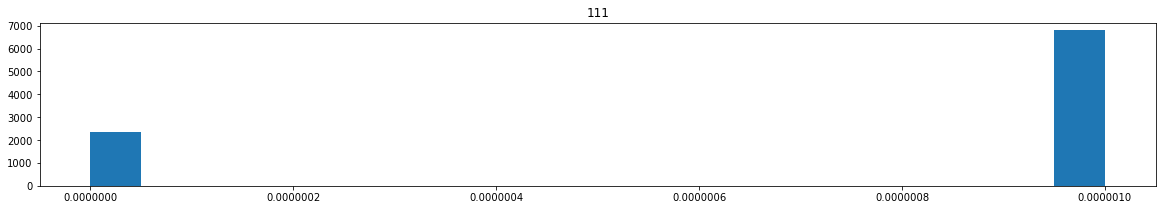

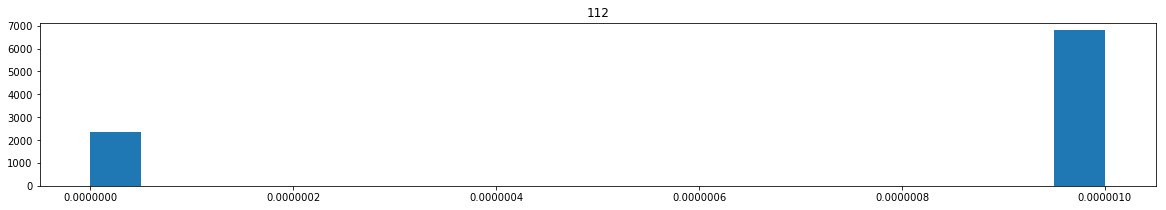

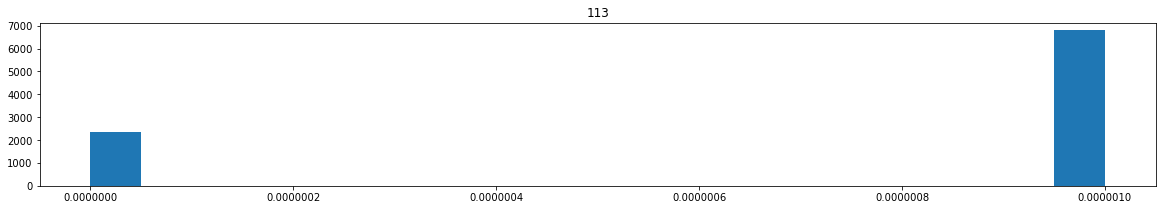

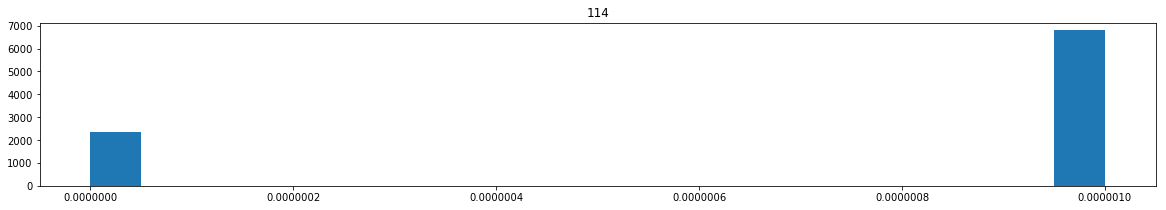

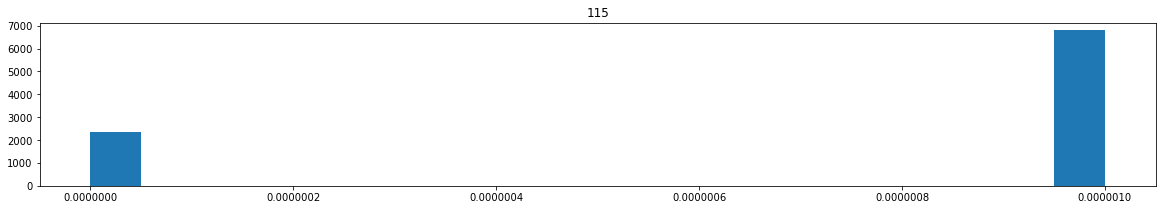

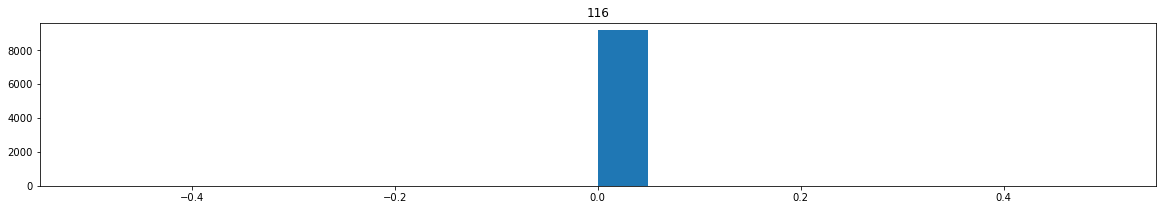

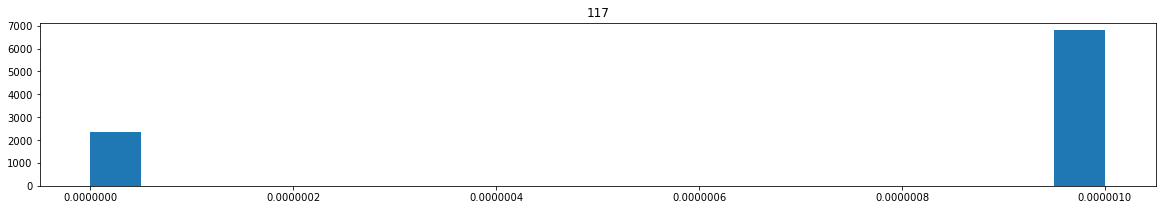

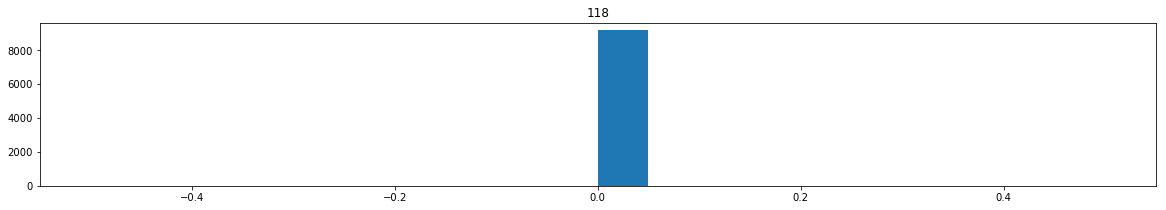

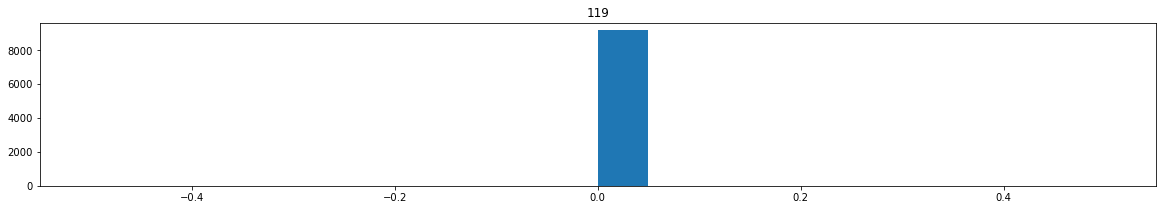

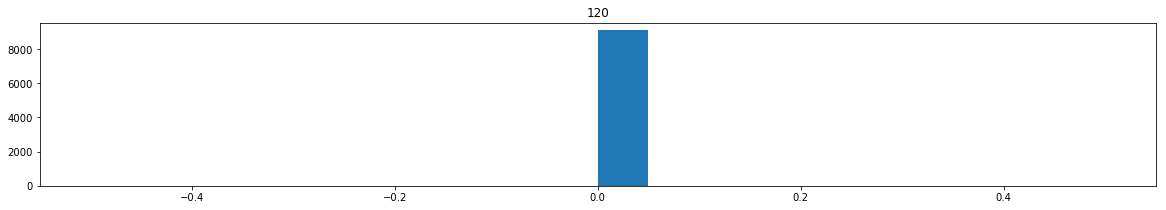

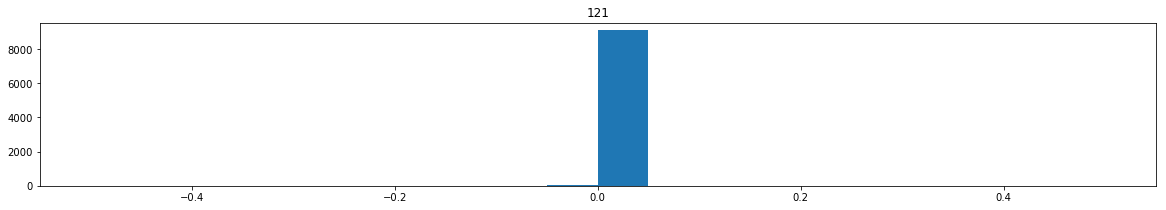

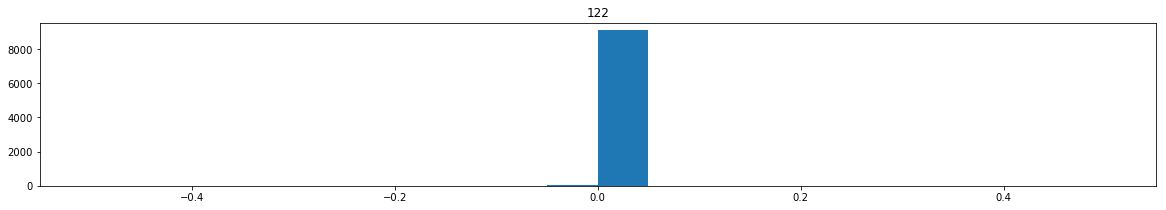

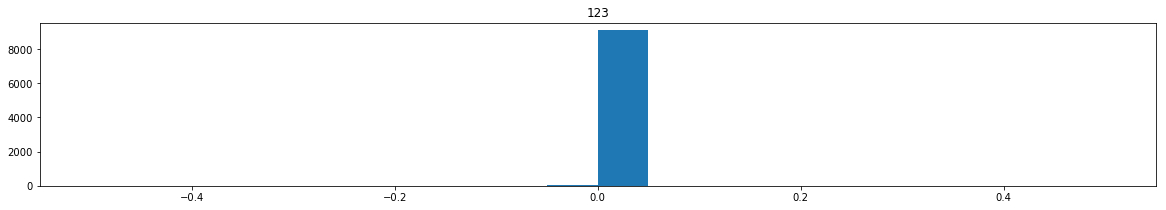

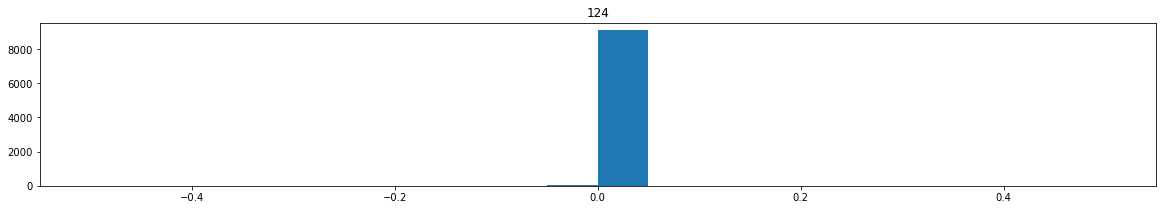

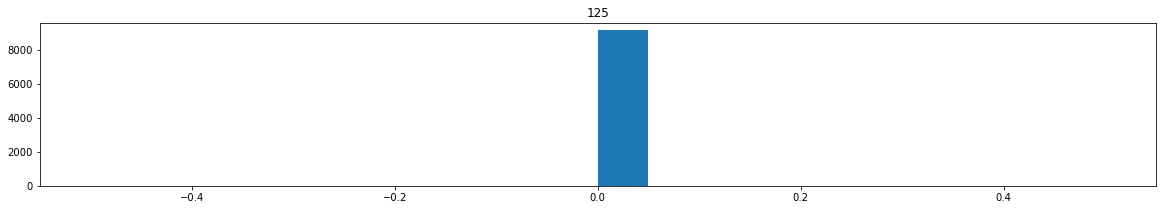

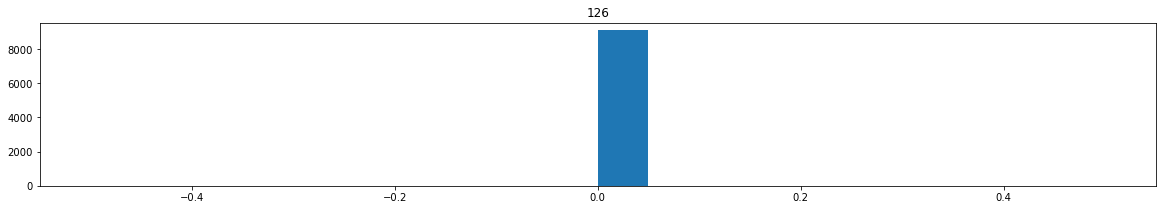

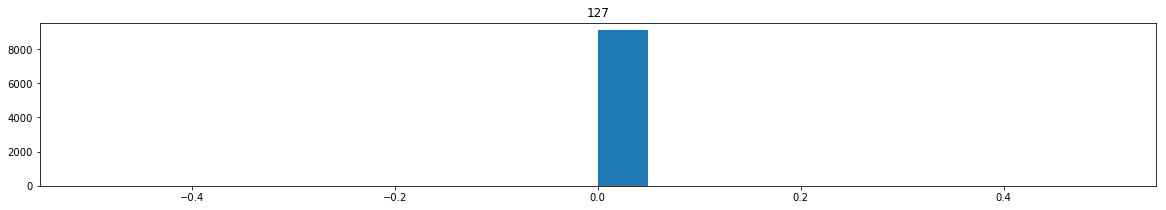

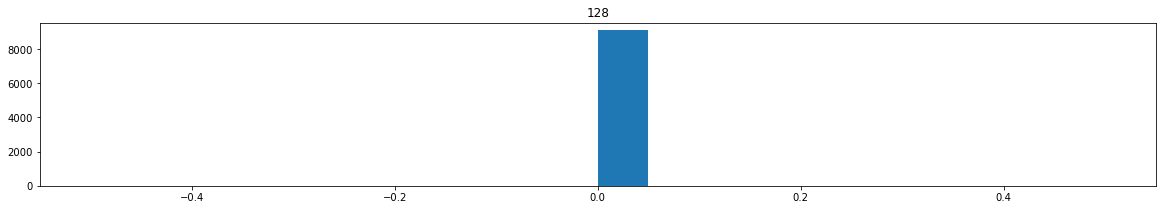

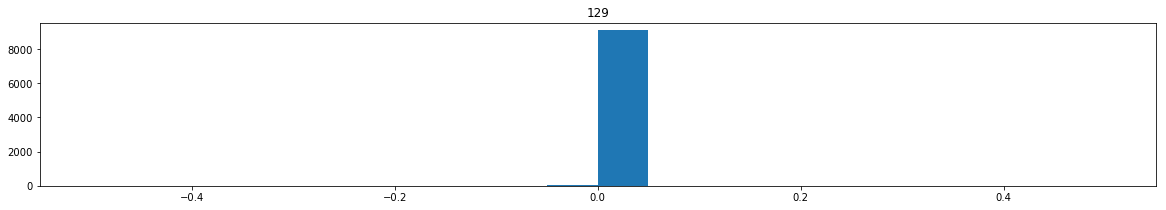

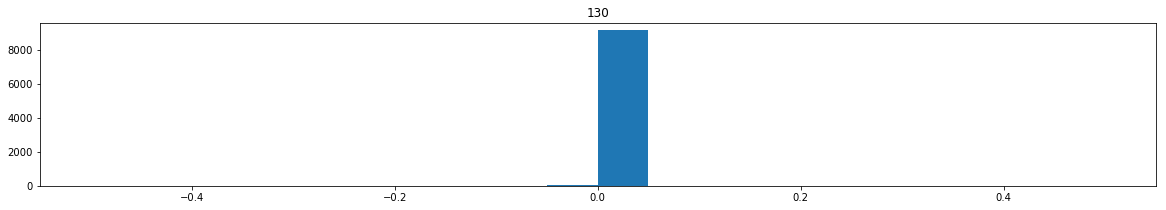

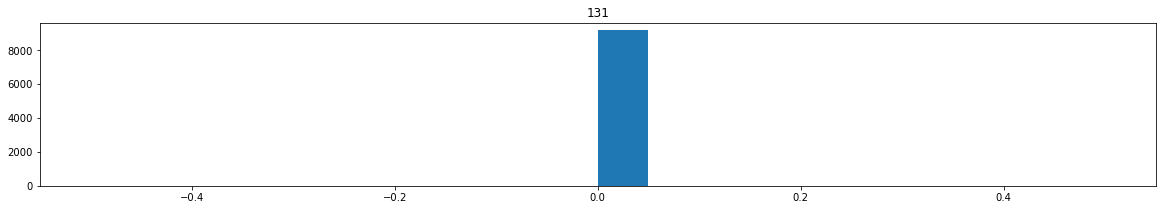

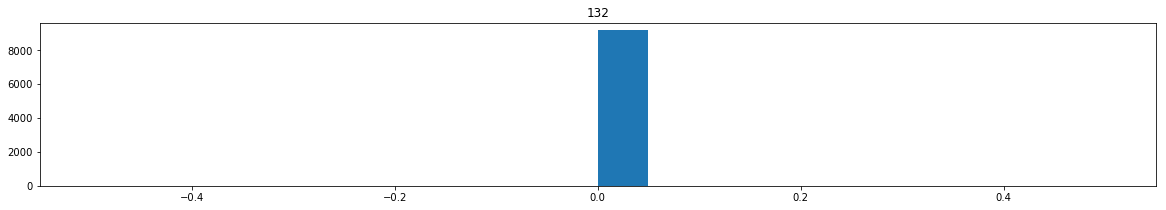

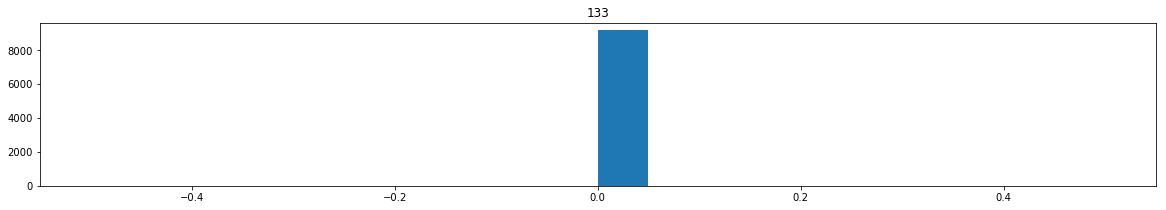

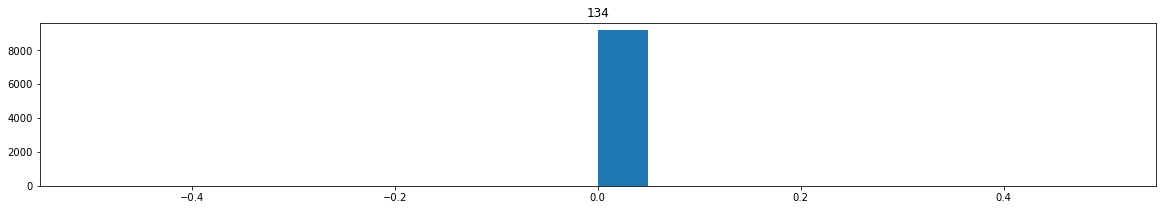

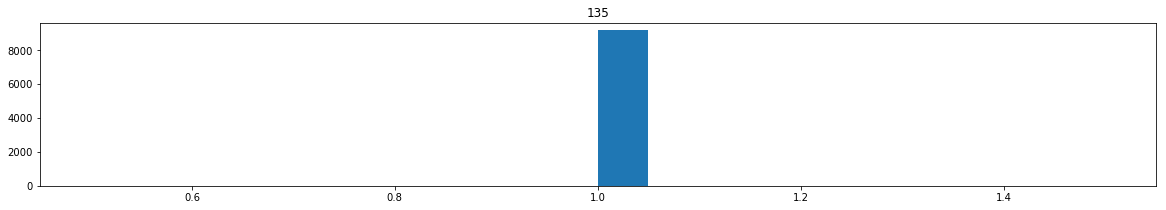

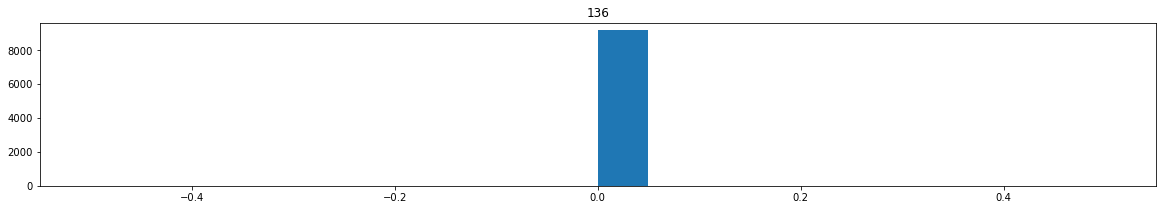

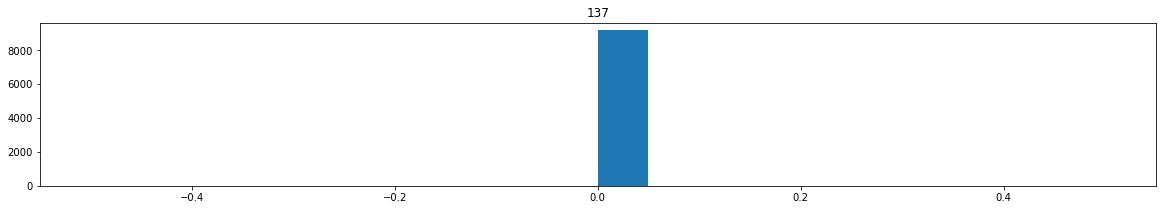

In [63]:
for i in range(columns_number):
    plt.figure(figsize=(20, 3))
    sorted_samples_i = np.sort(samplesT[i])
    lim = (sorted_samples_i[int(n * 0.2)],
             sorted_samples_i[int(n * 0.8)])
    plt.hist(samplesT[i], bins=20,
            range=lim)
    plt.title(i)
    plt.show()

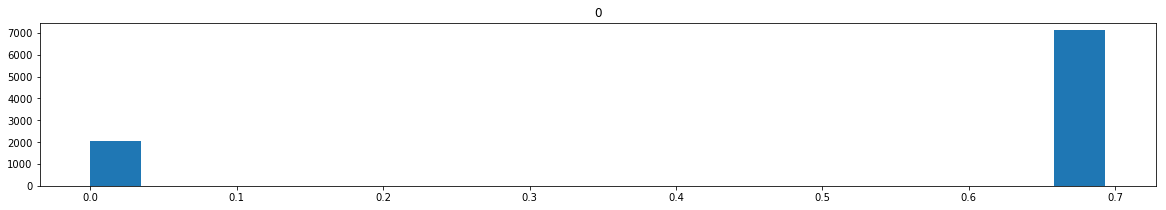

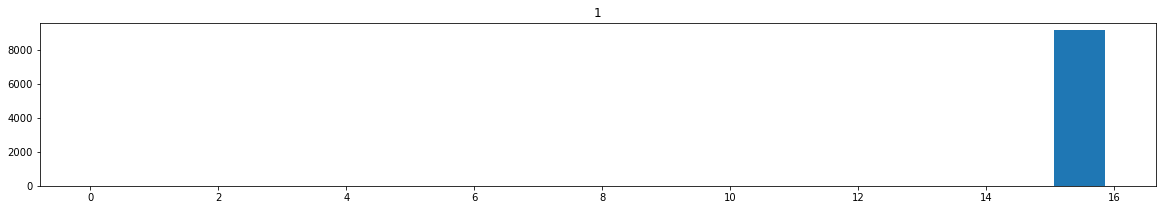

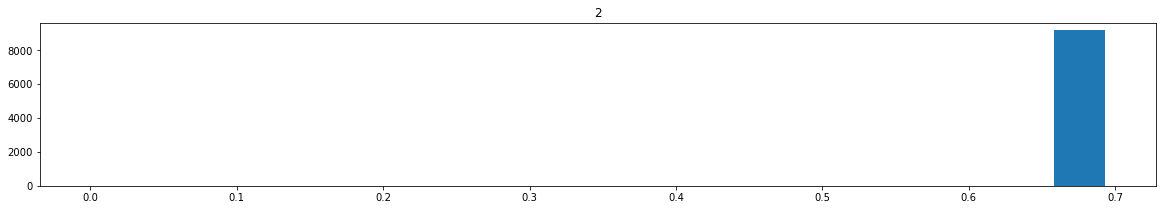

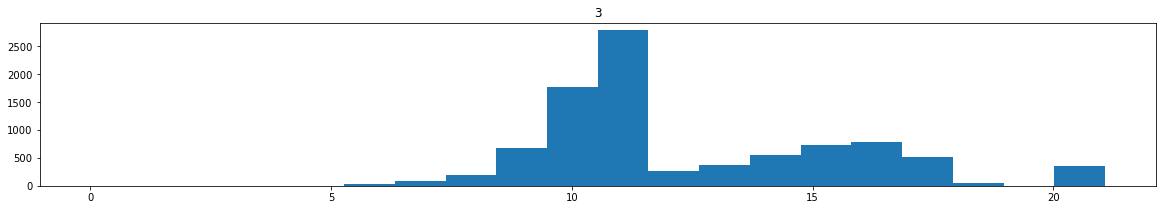

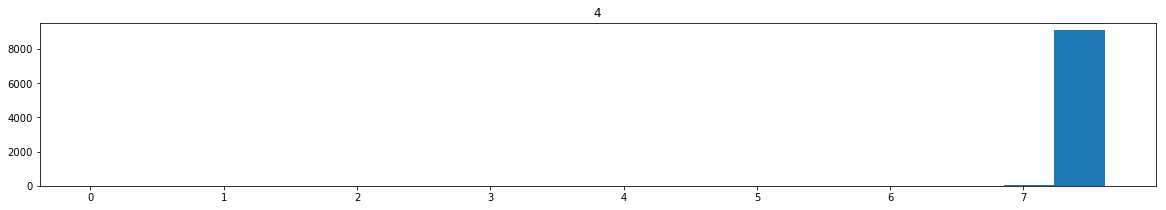

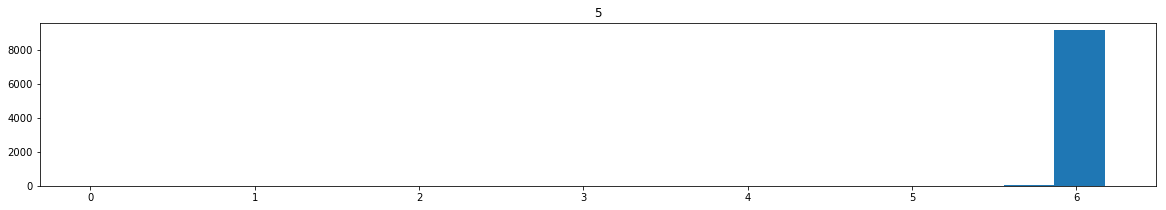

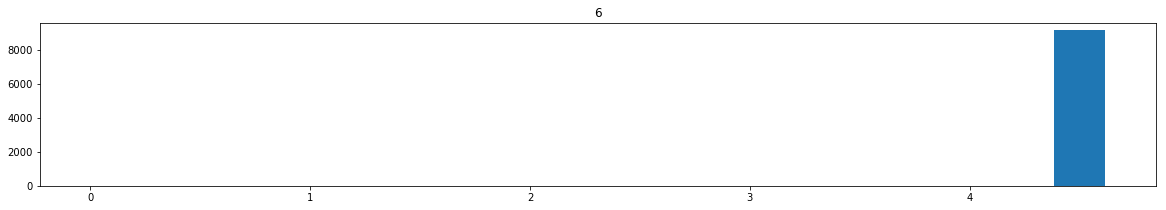

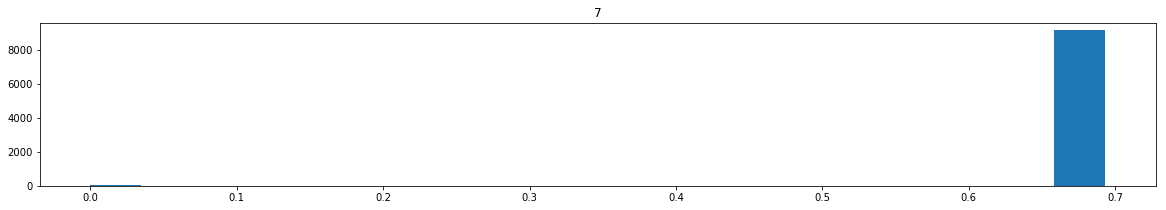

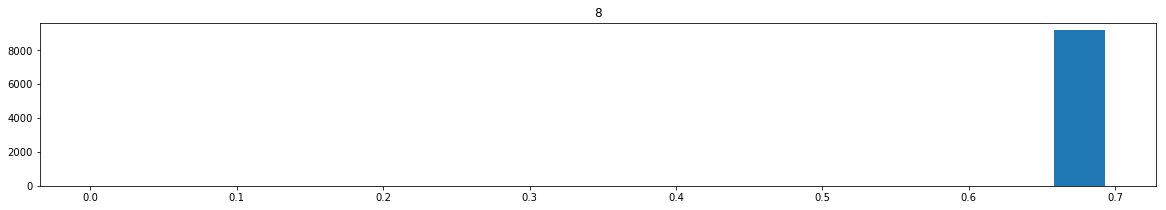

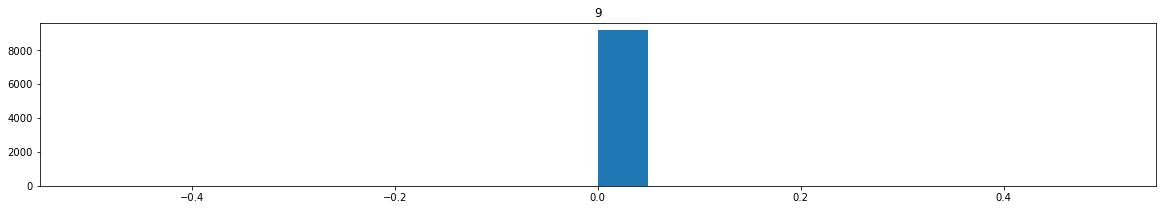

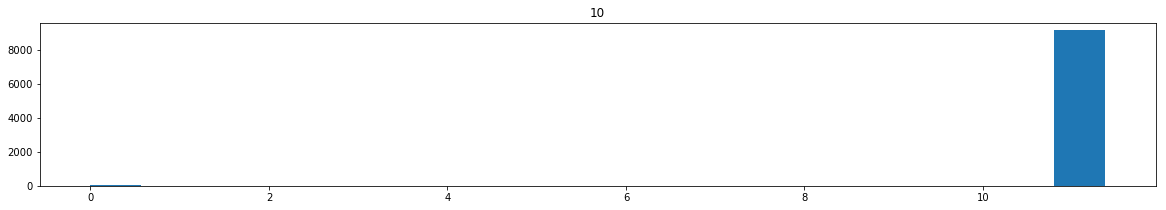

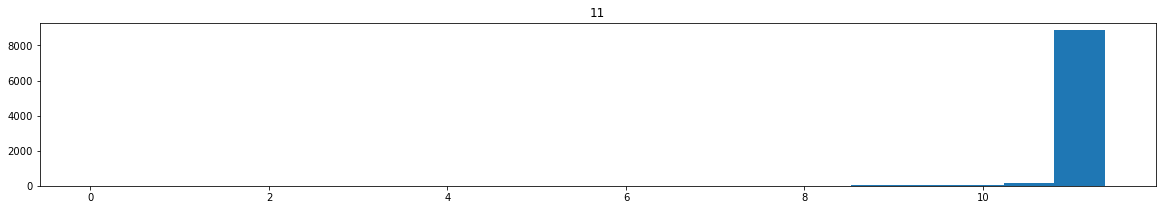

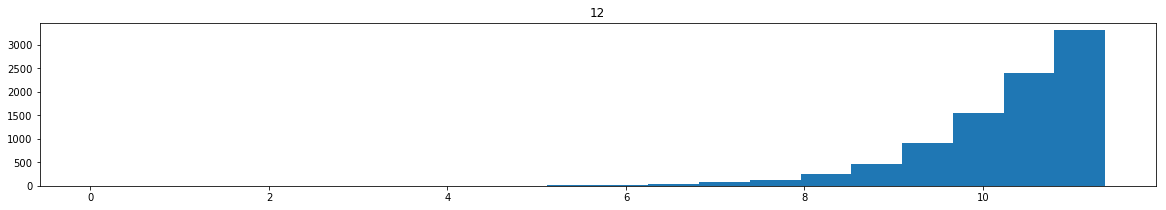

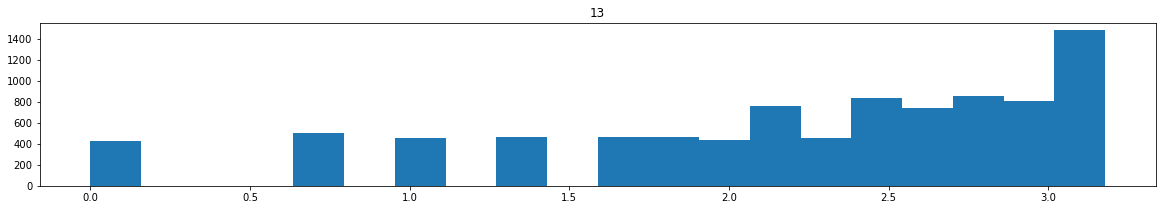

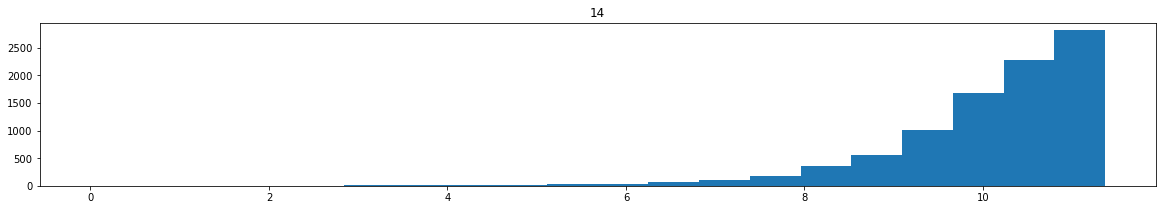

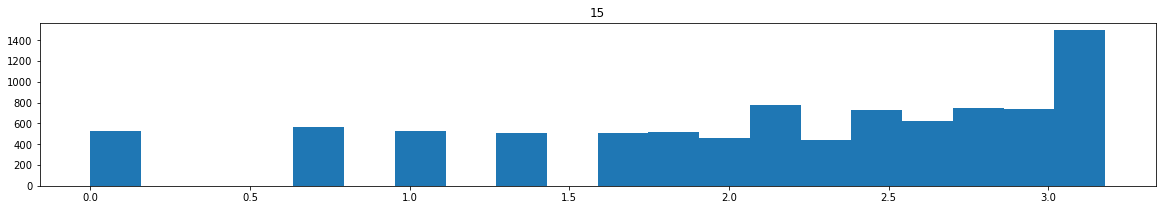

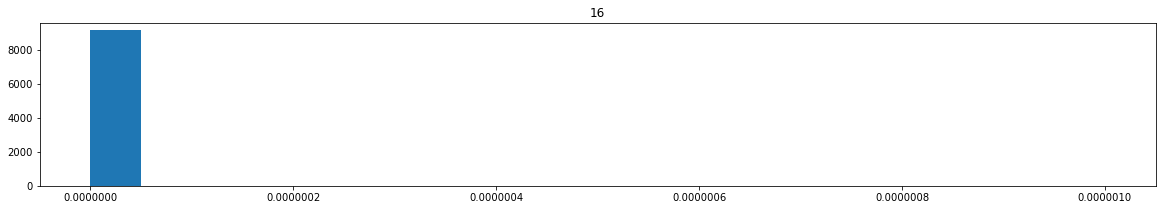

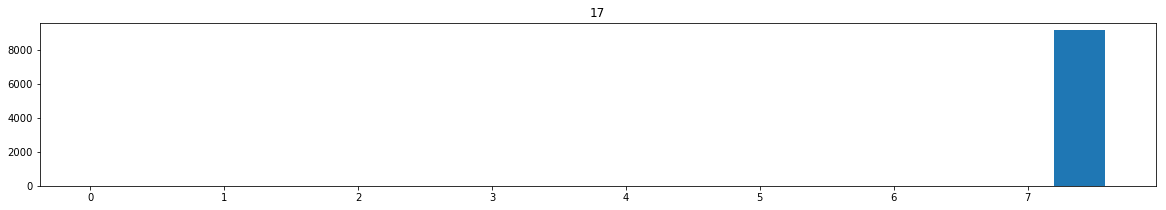

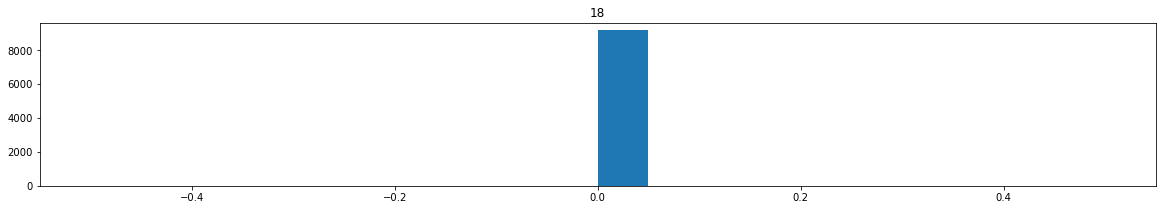

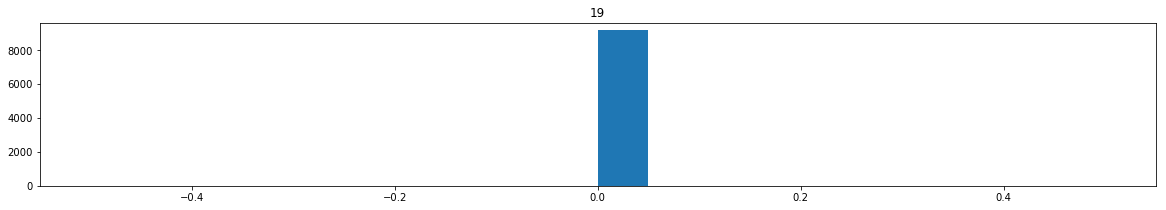

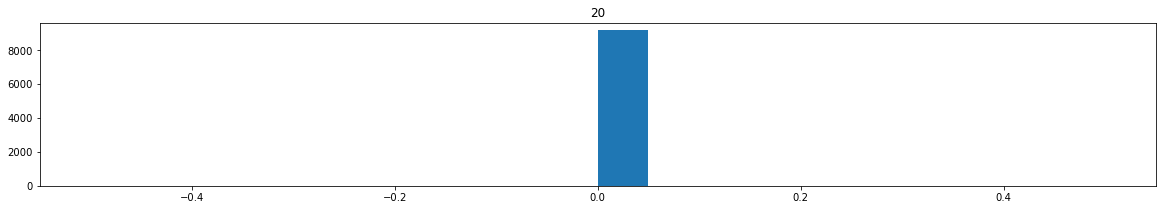

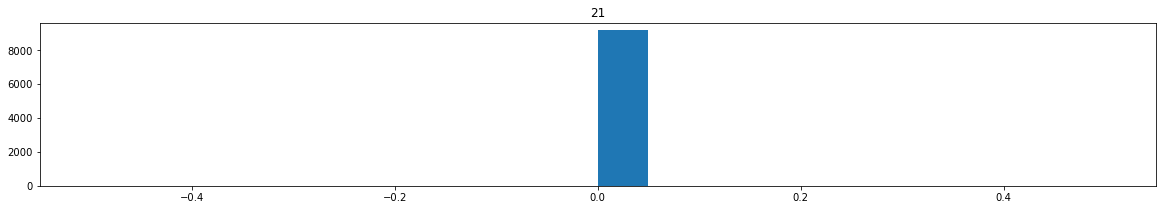

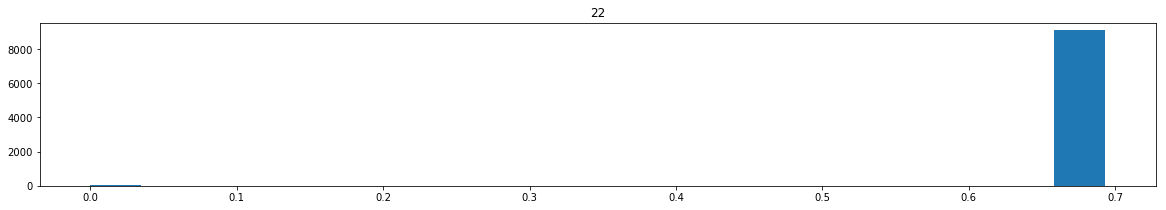

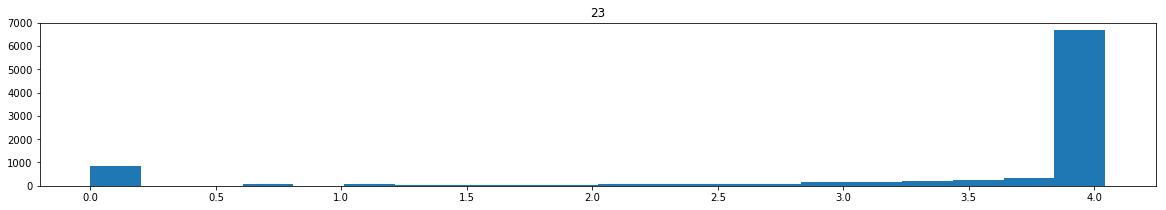

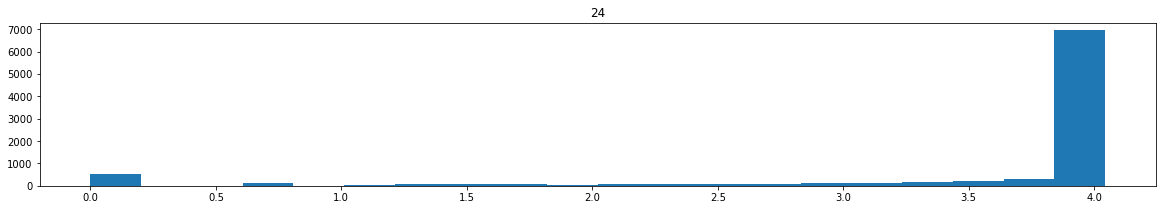

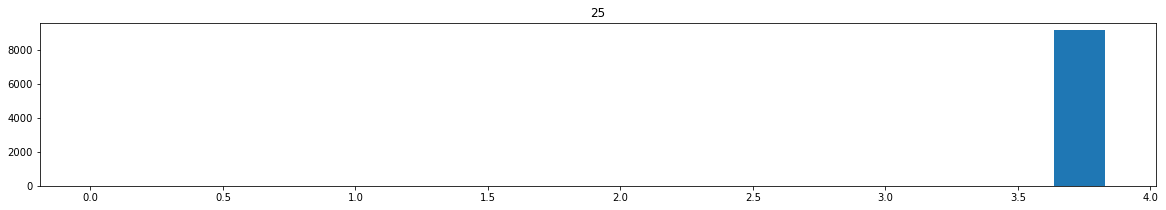

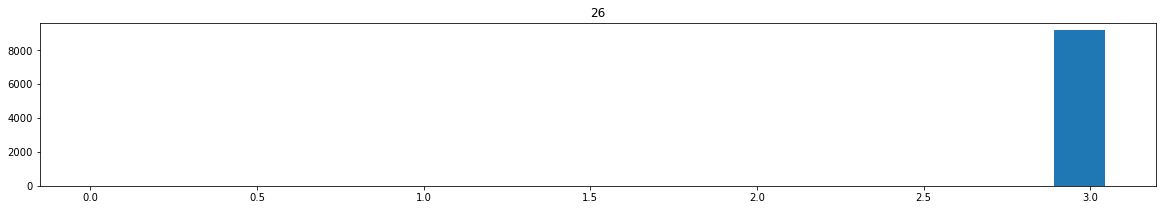

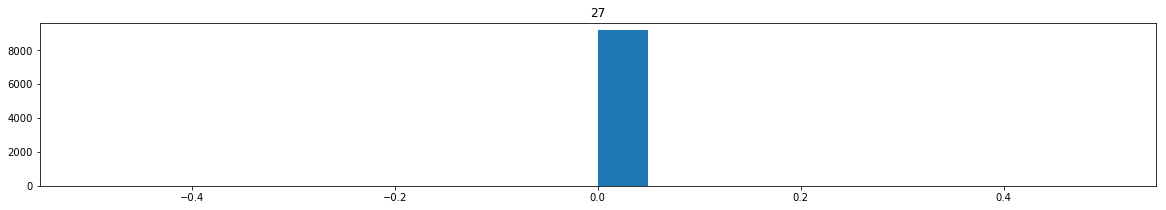

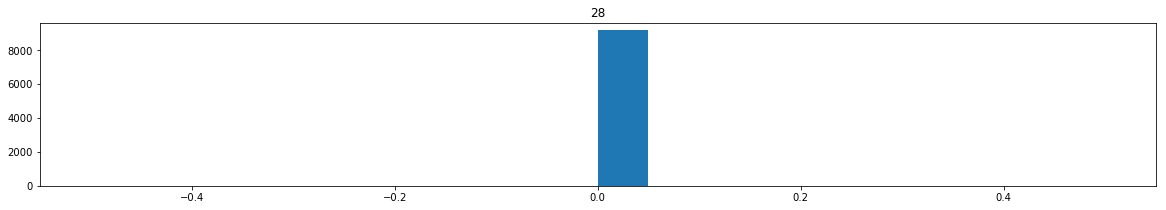

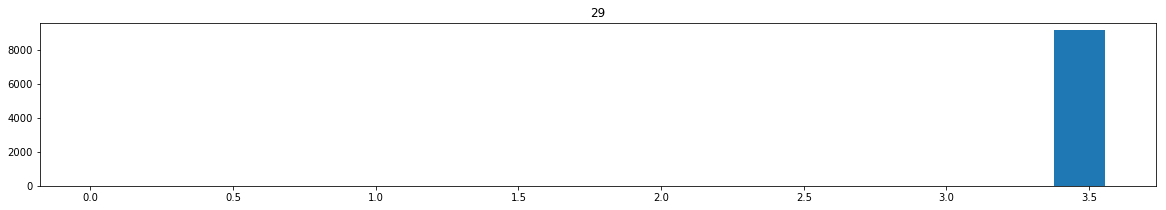

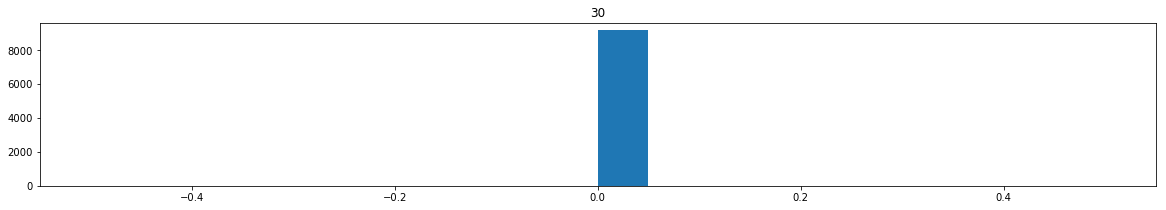

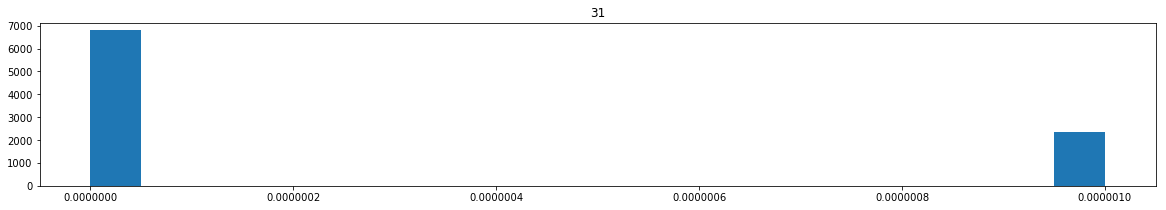

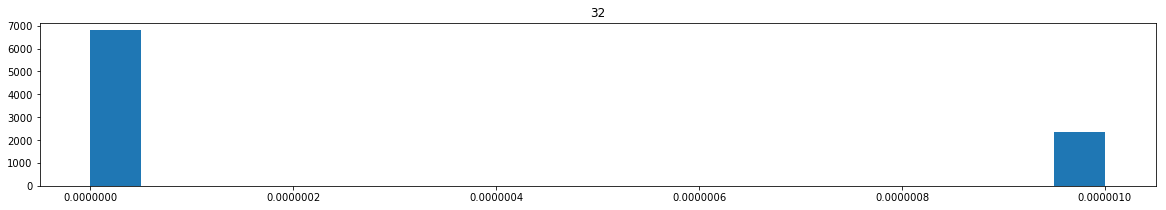

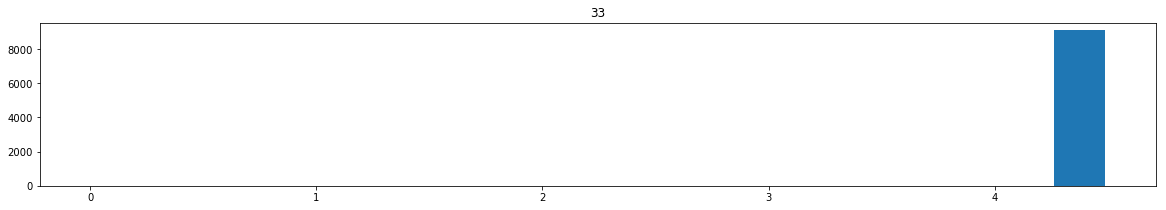

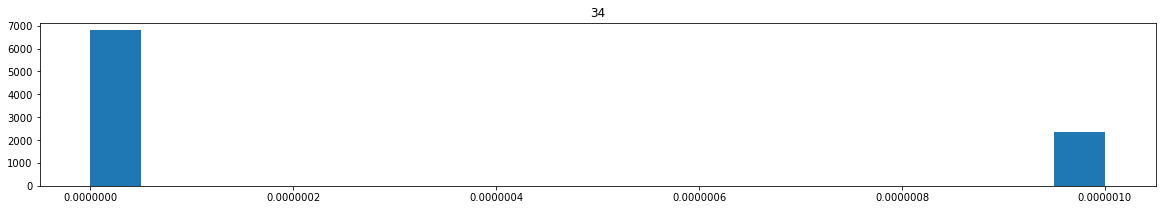

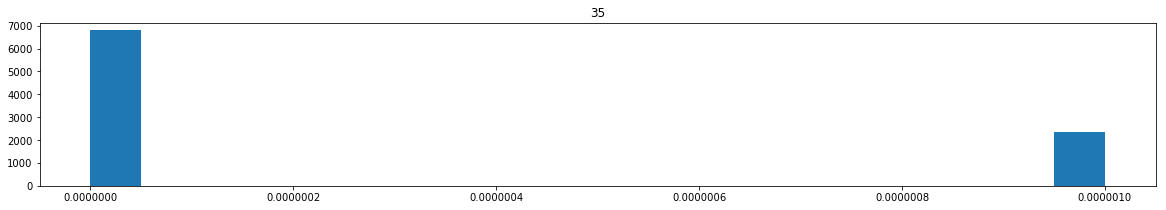

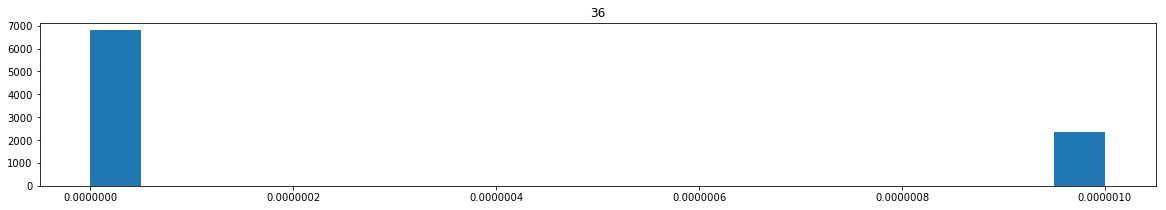

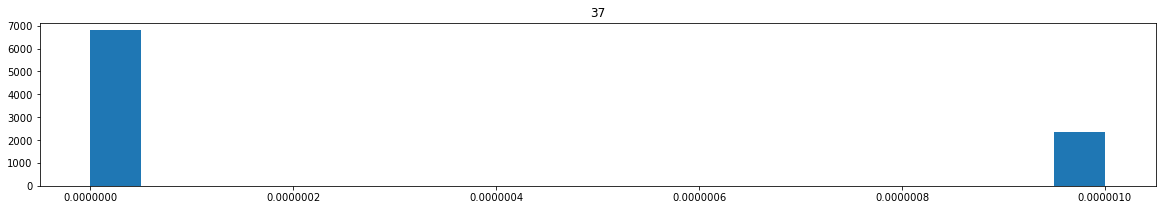

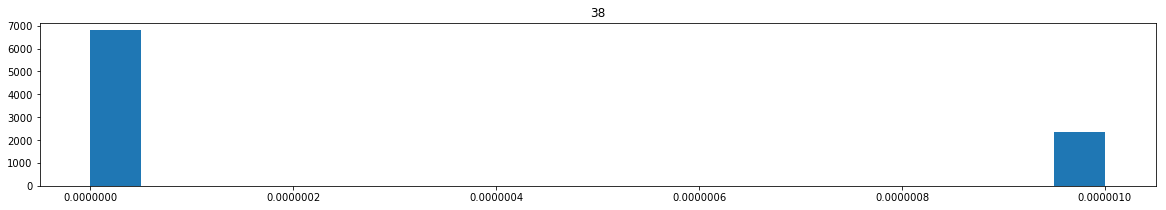

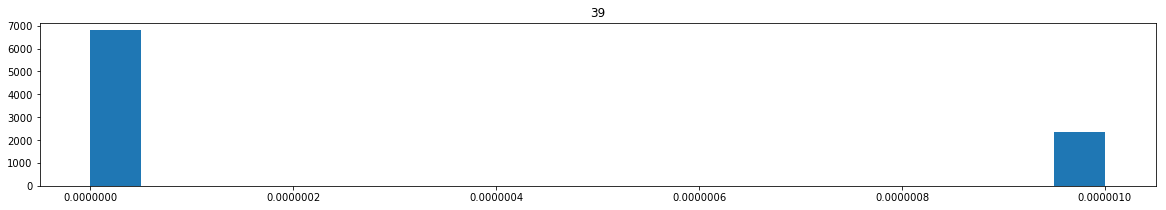

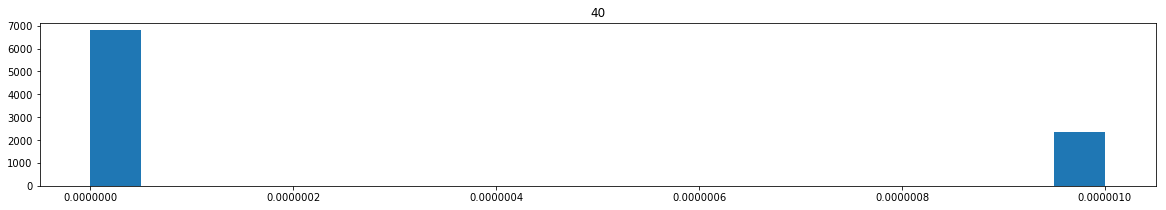

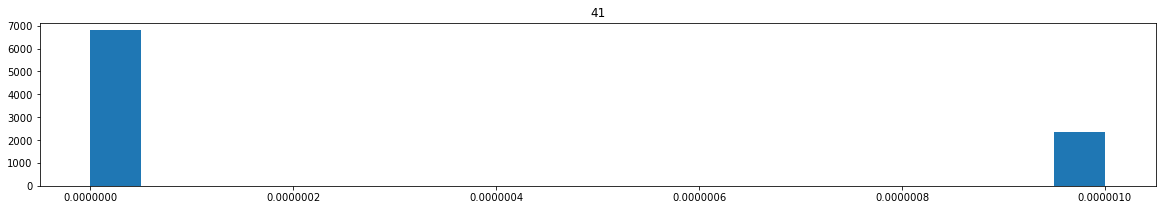

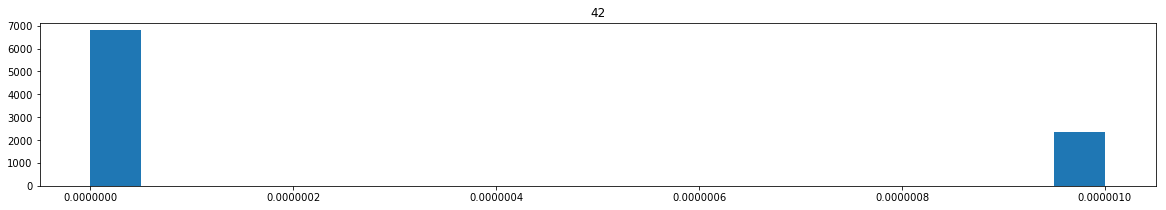

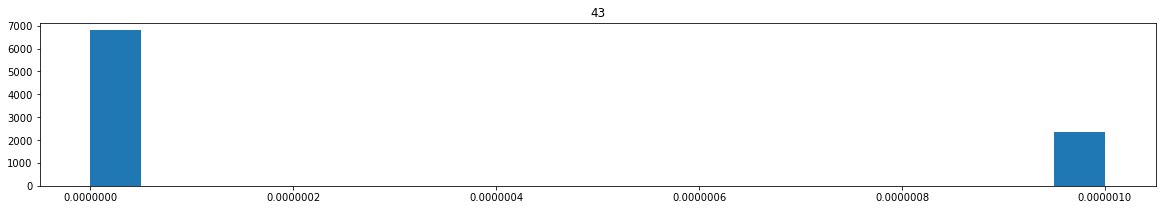

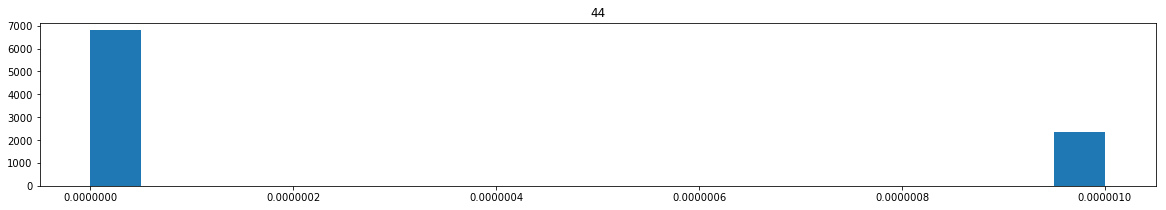

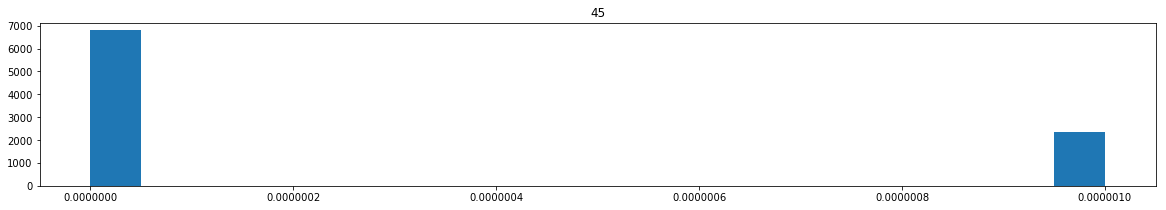

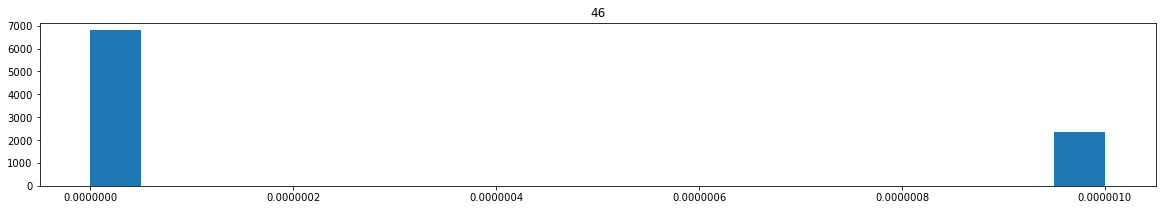

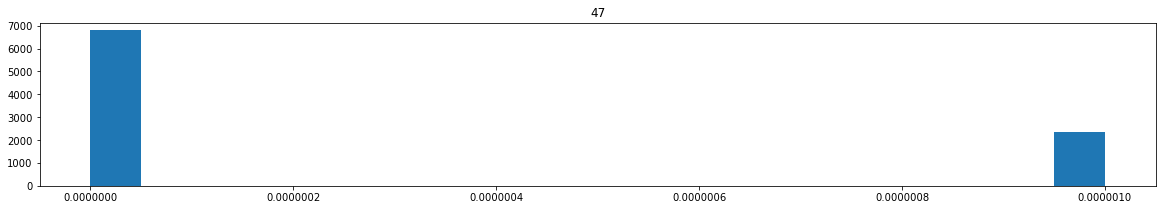

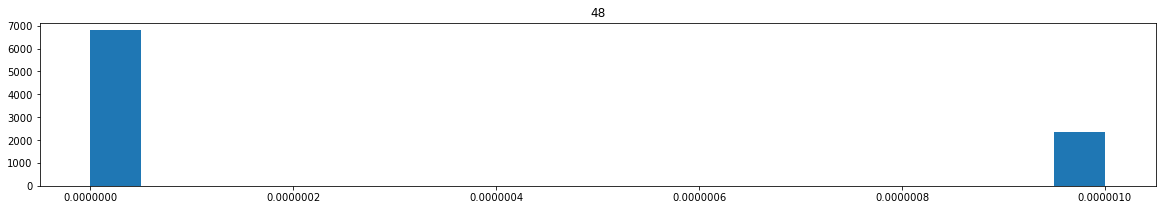

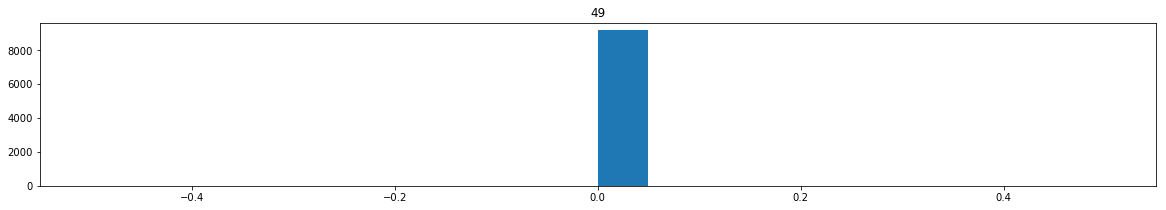

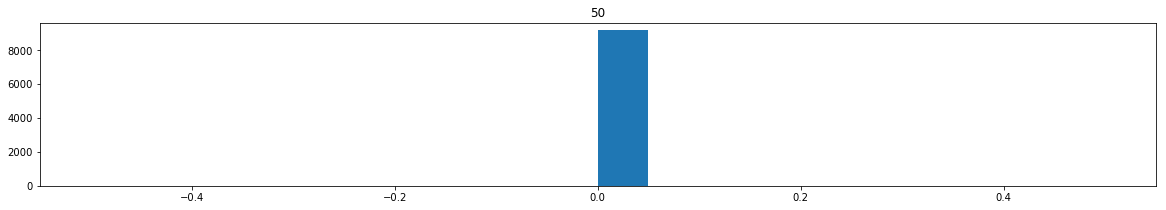

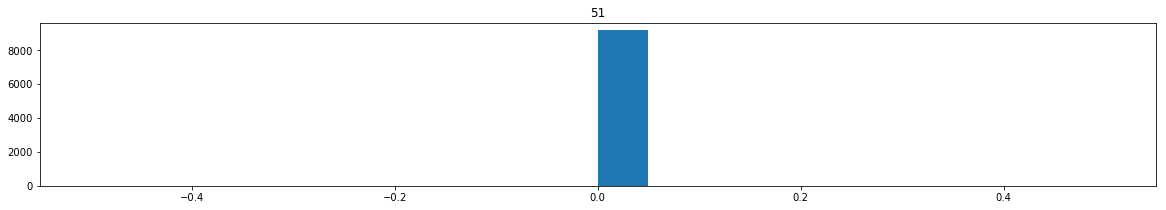

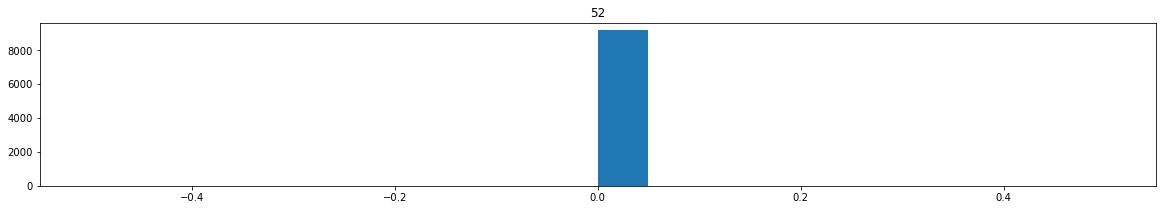

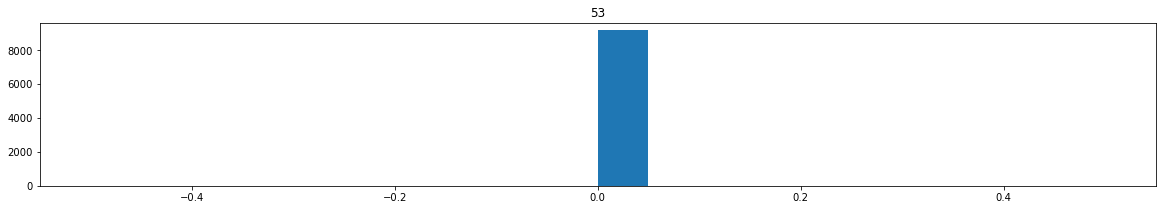

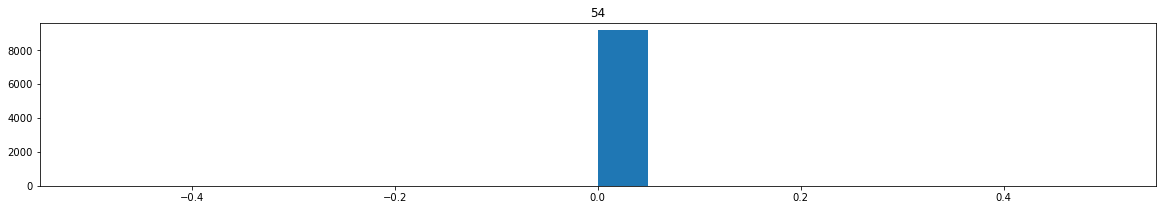

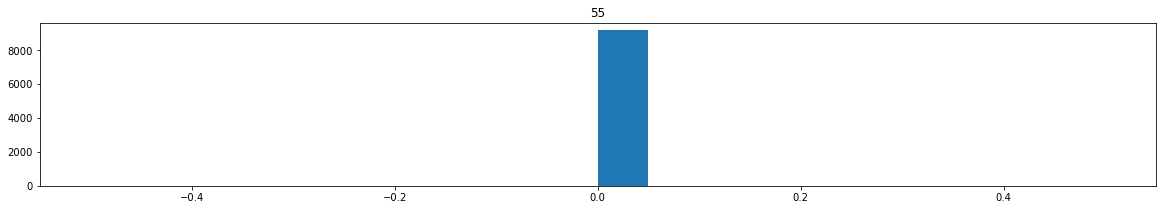

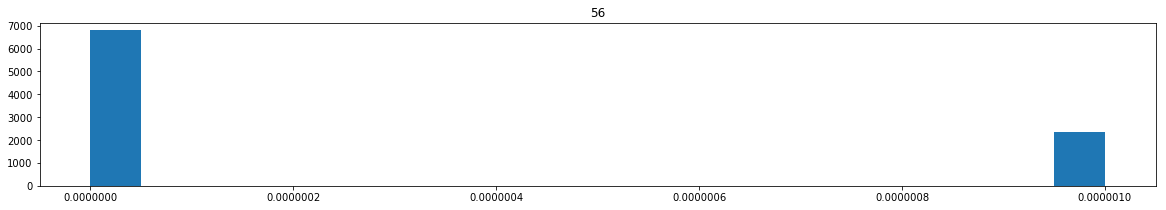

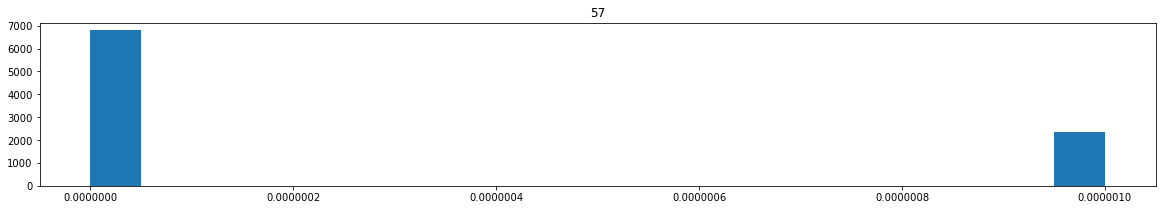

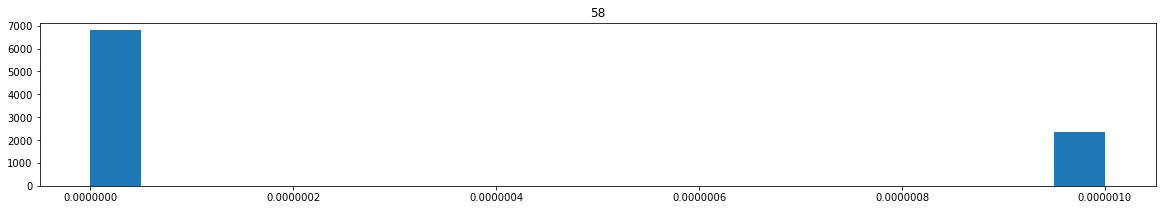

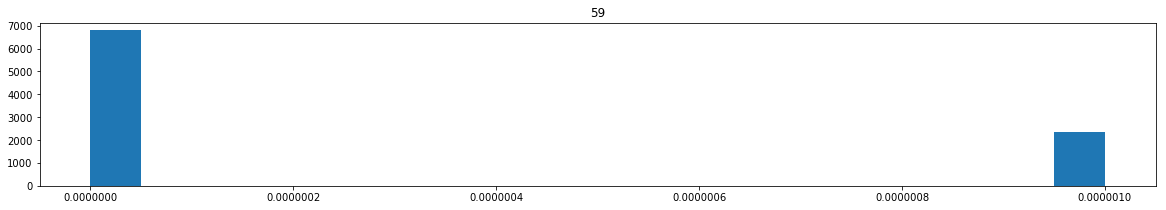

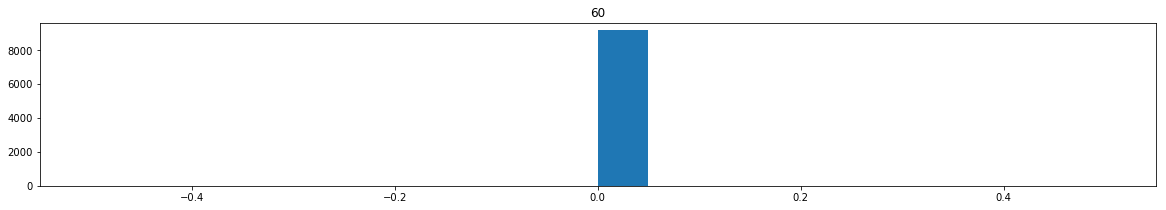

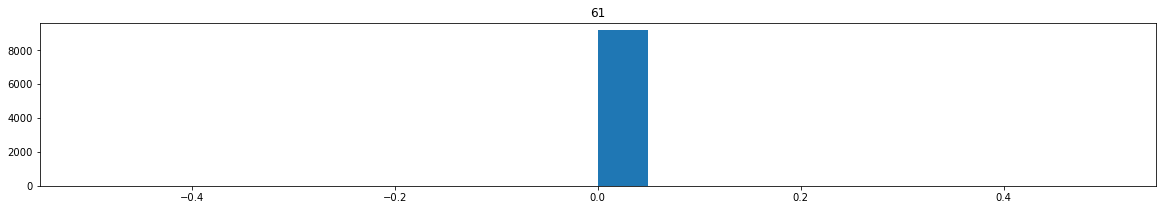

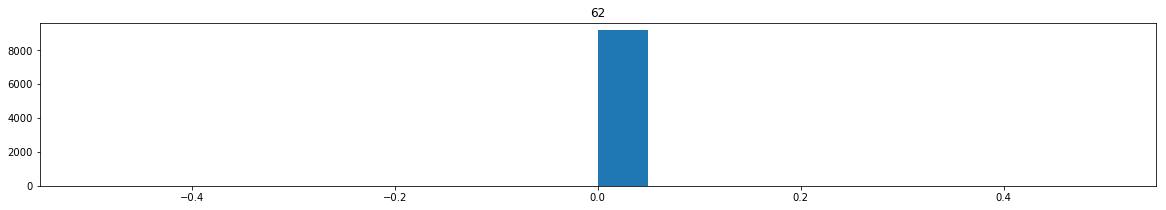

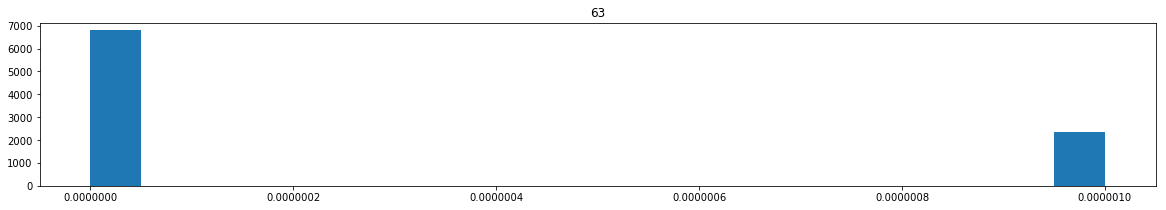

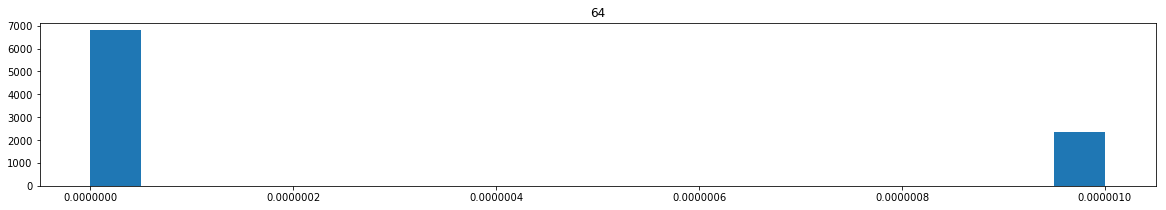

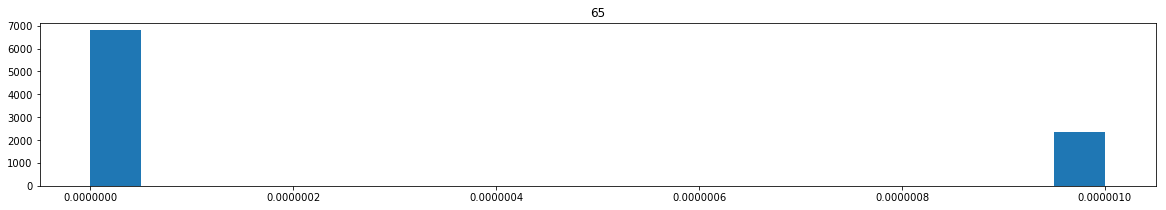

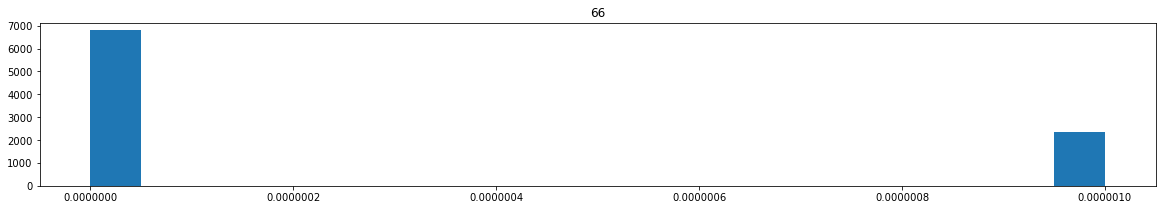

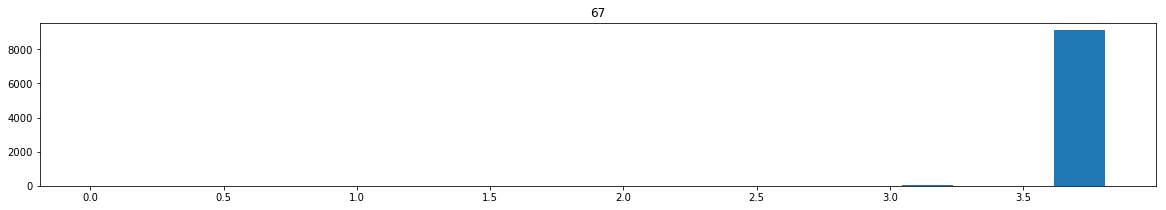

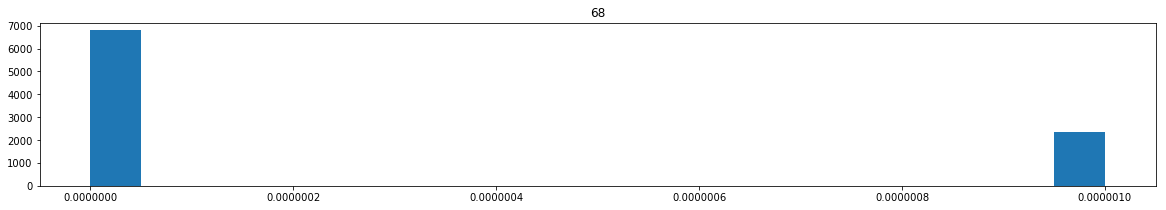

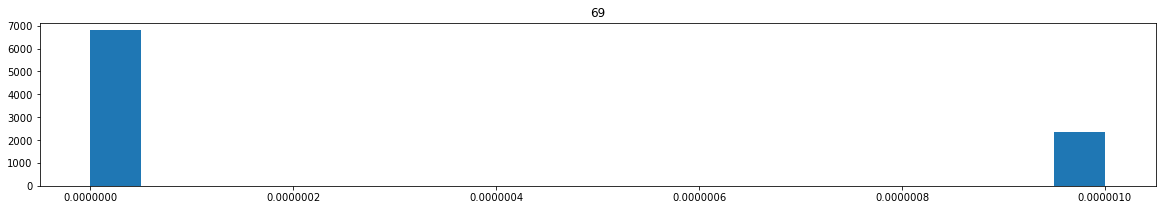

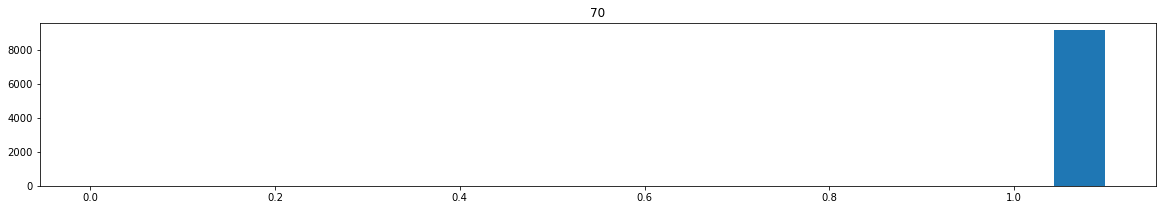

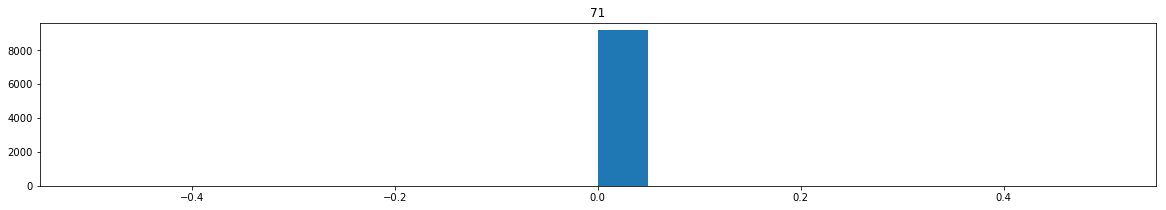

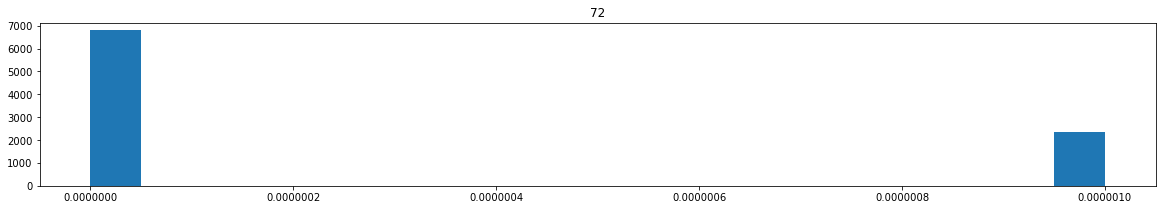

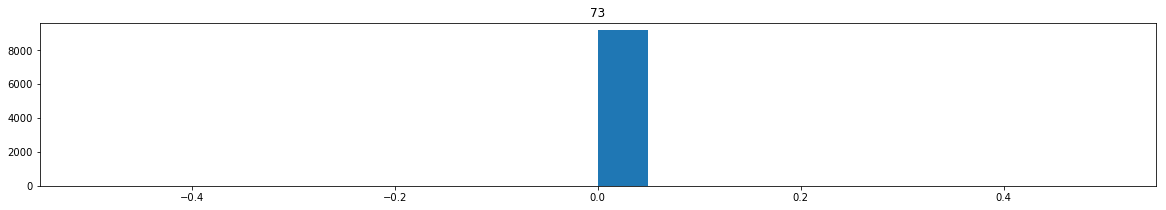

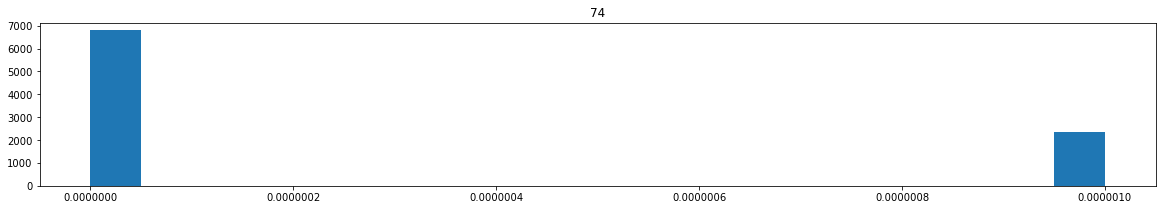

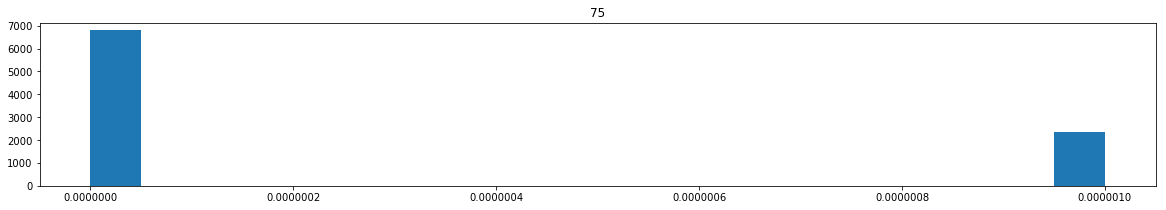

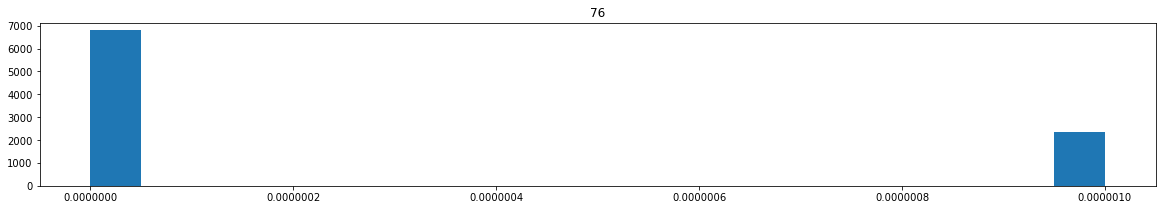

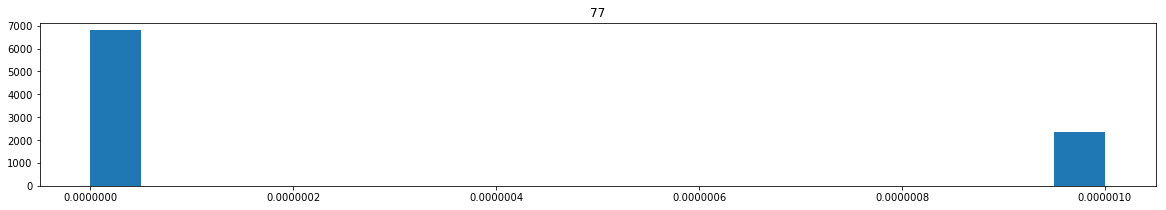

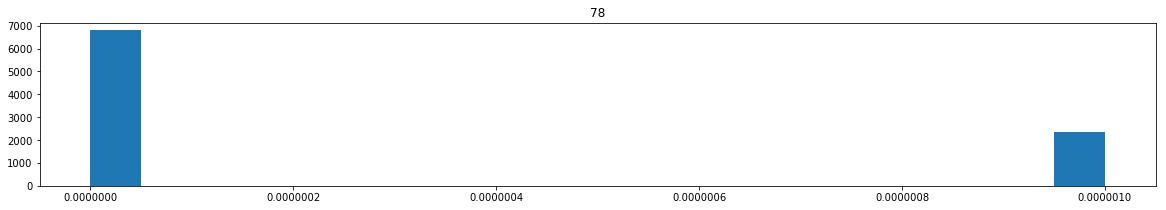

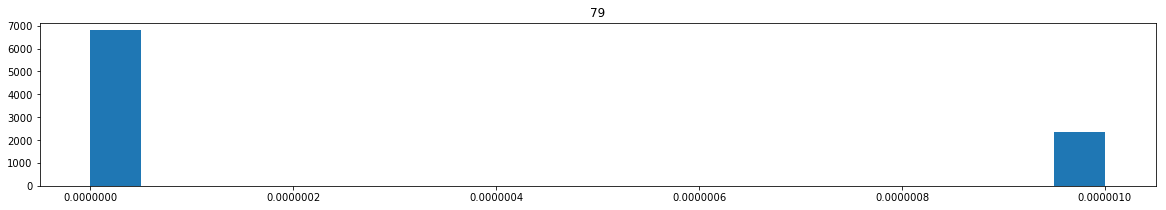

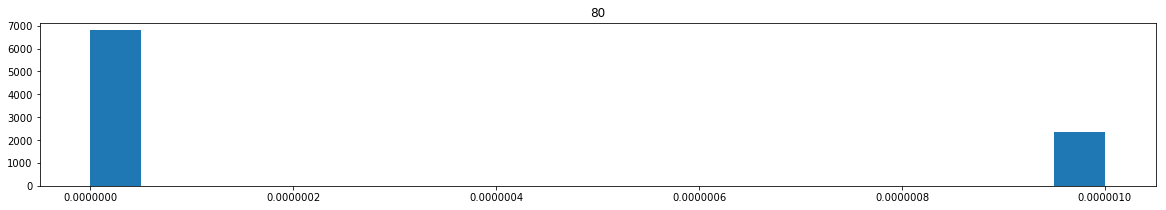

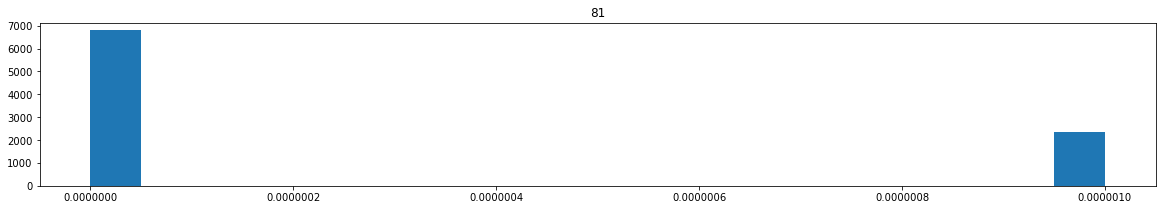

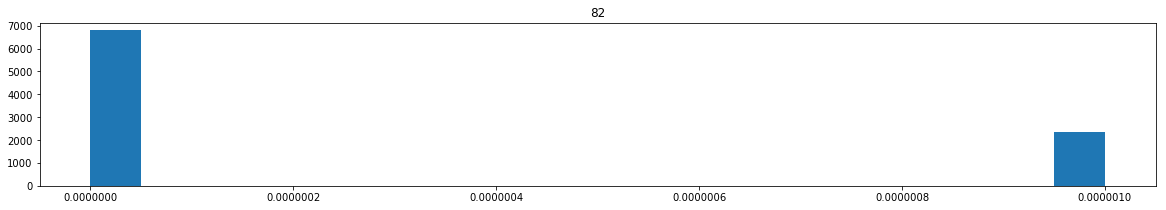

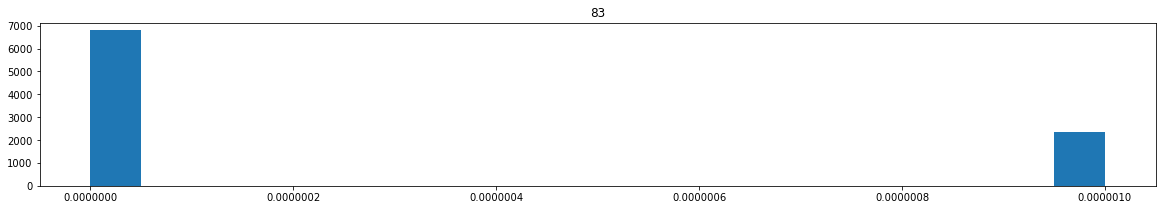

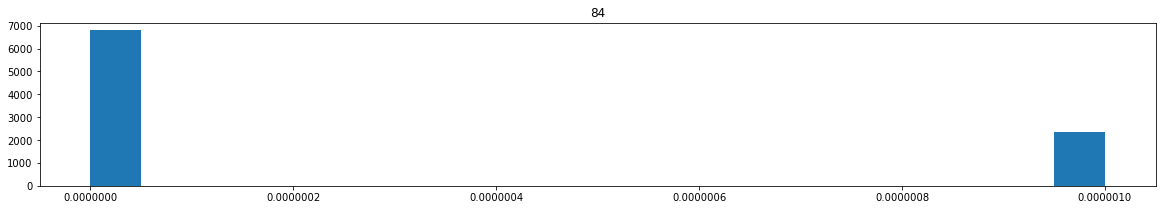

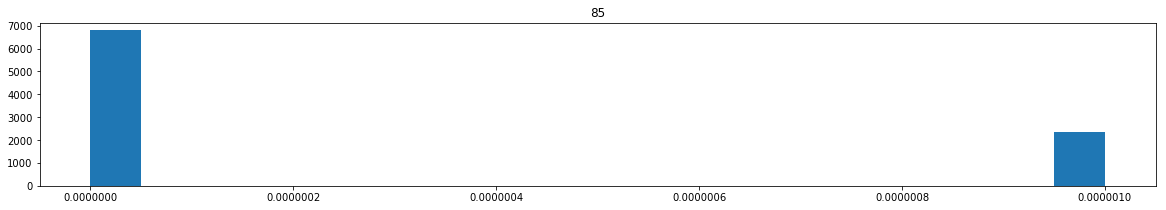

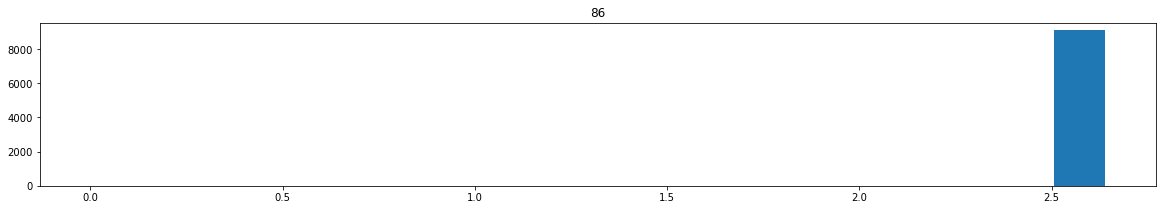

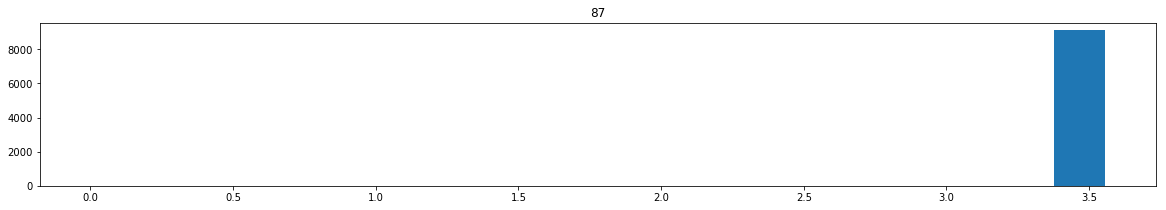

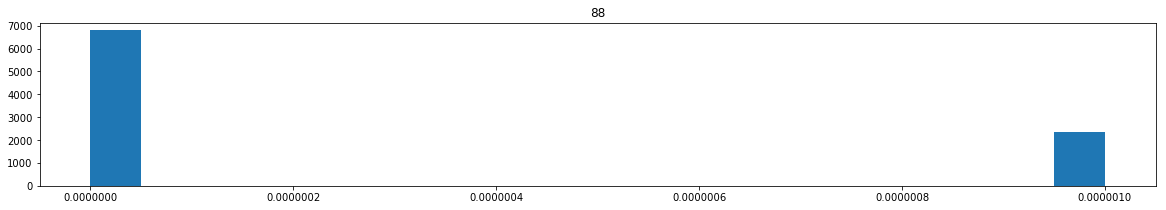

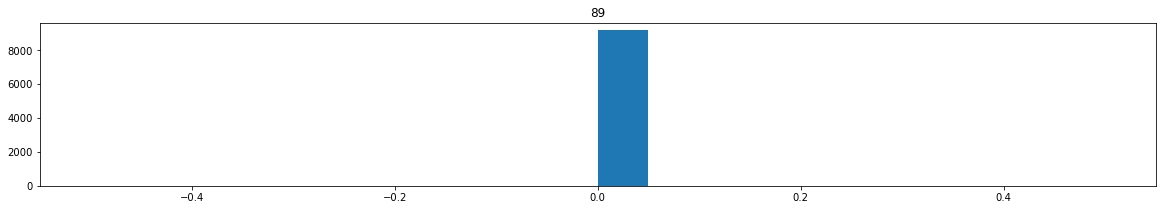

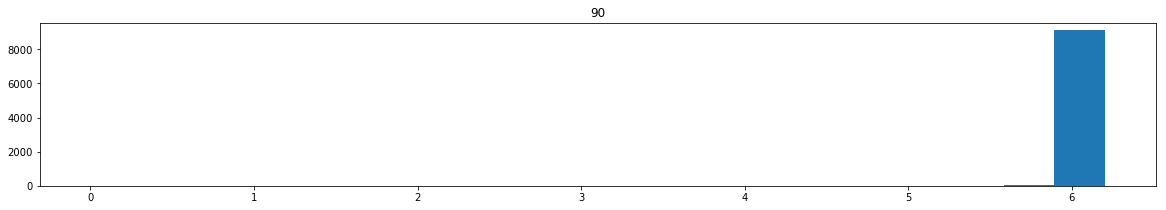

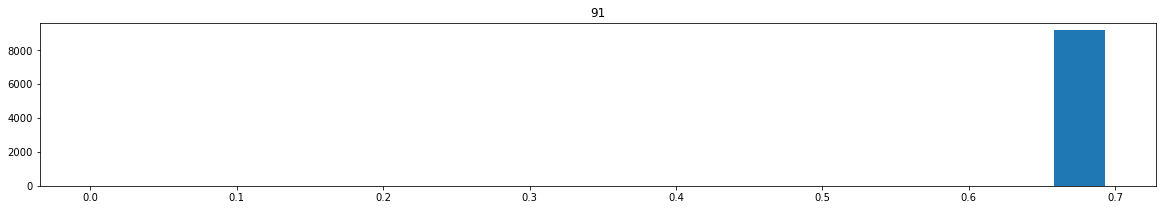

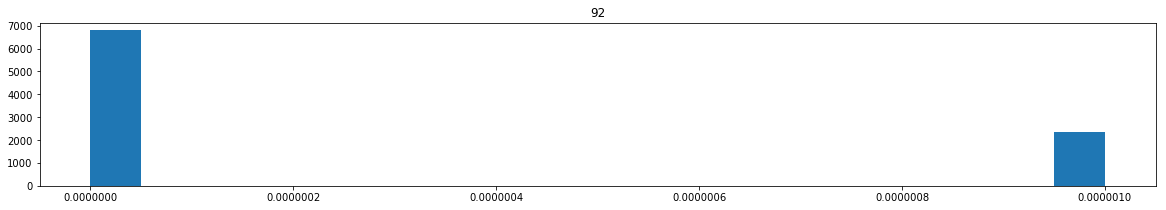

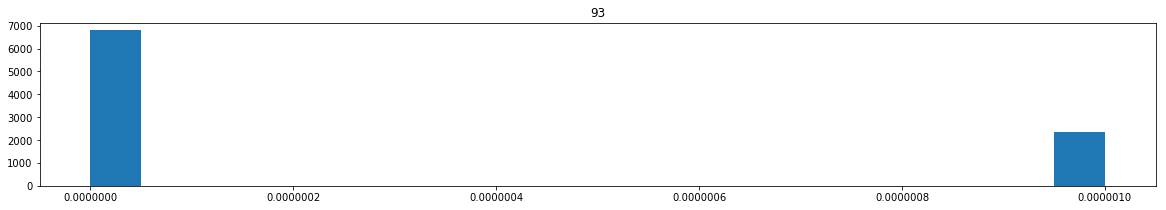

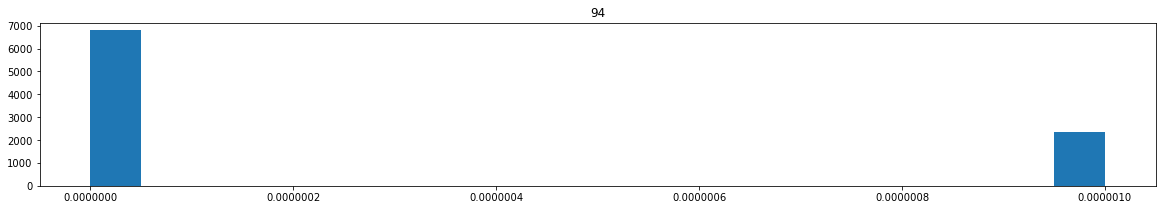

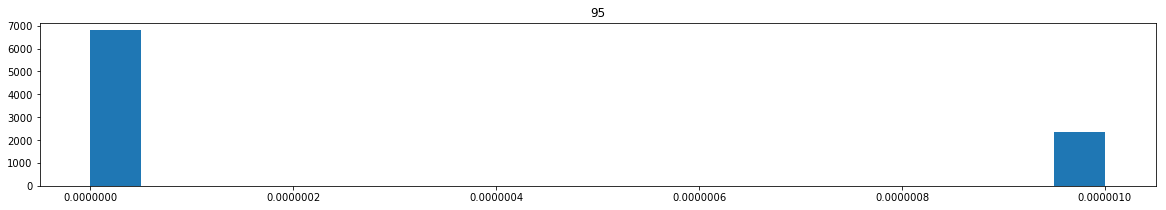

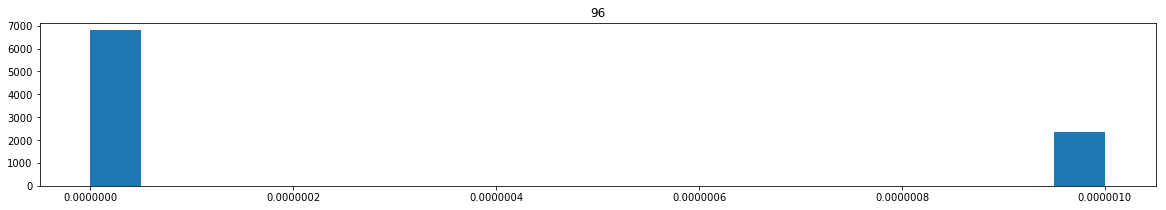

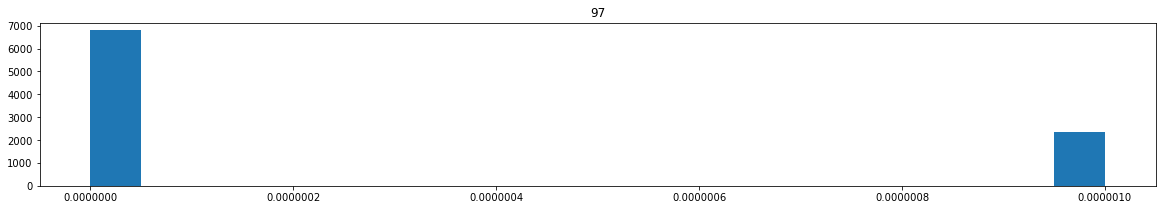

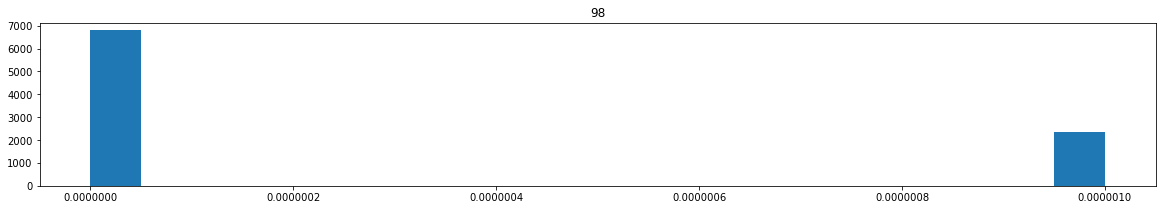

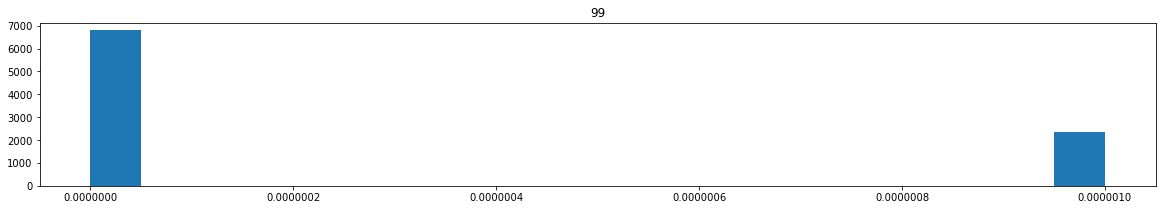

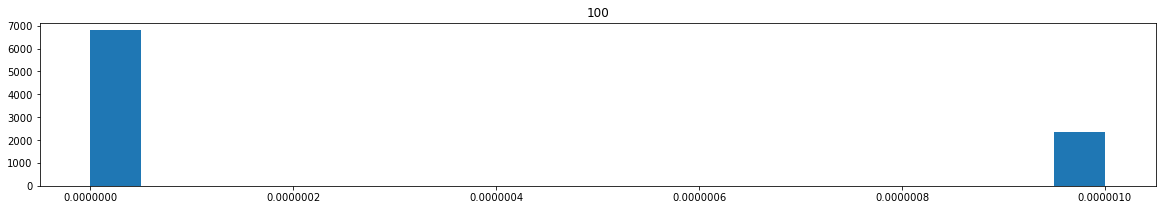

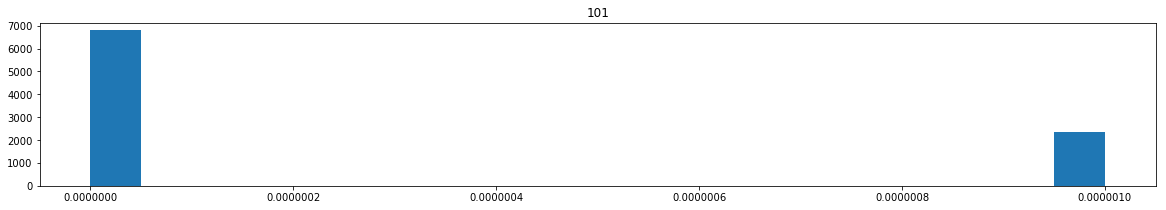

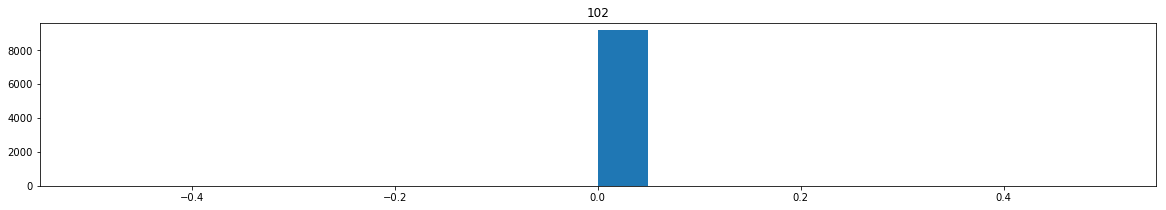

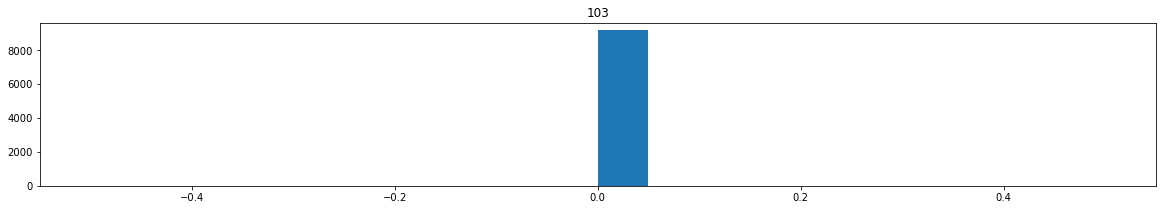

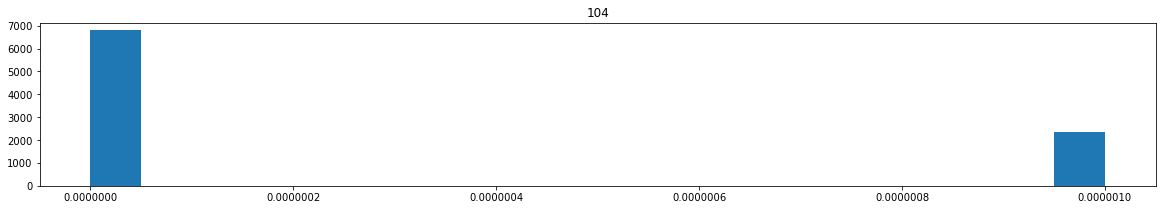

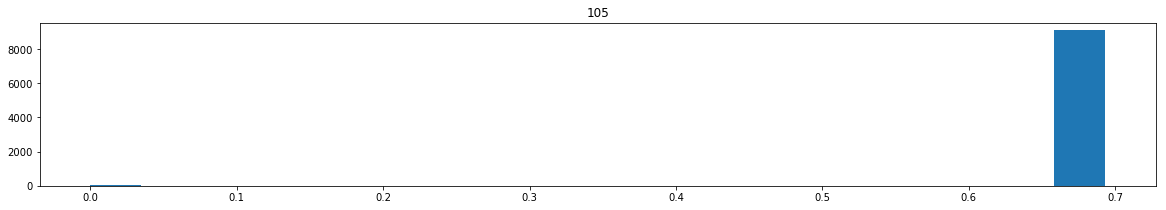

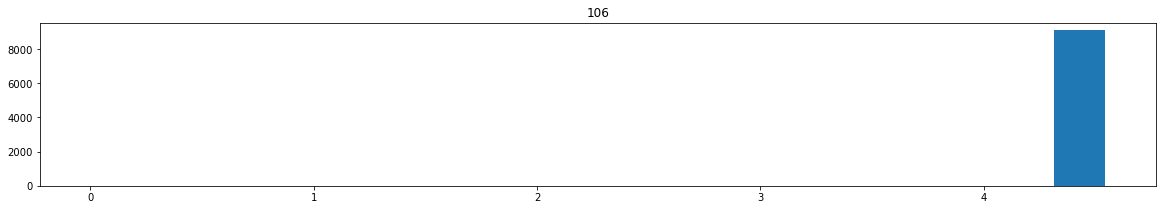

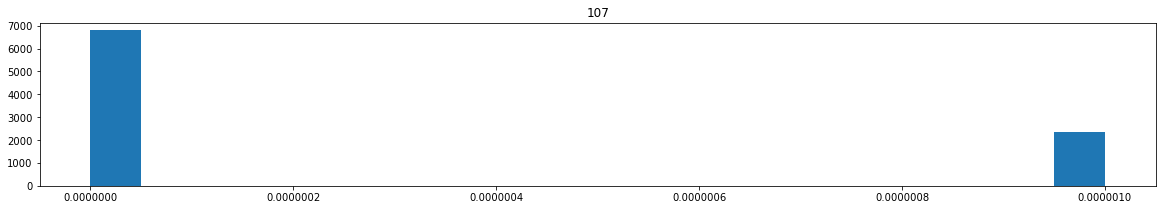

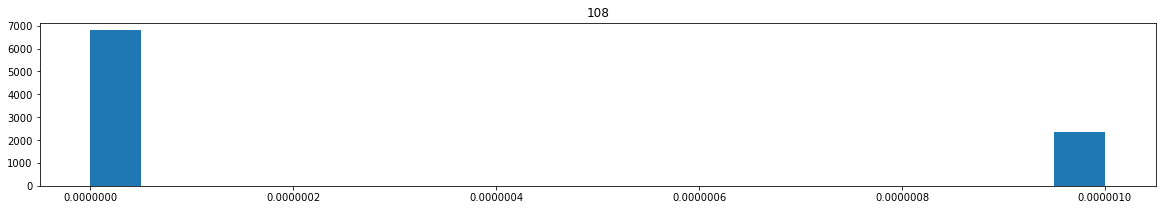

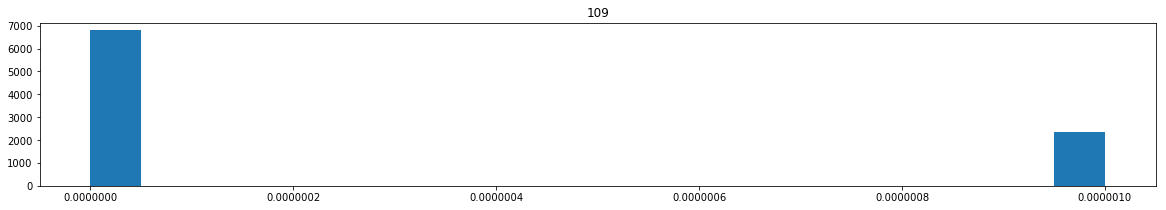

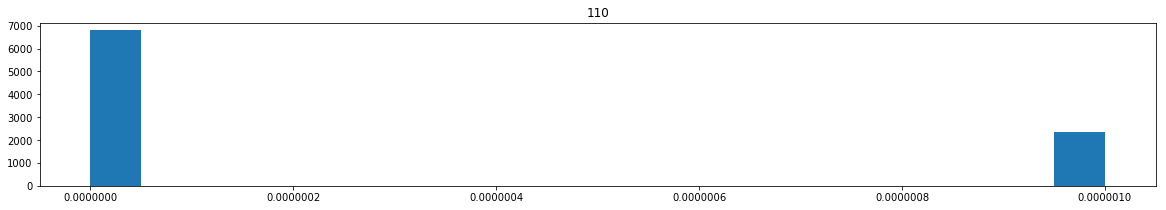

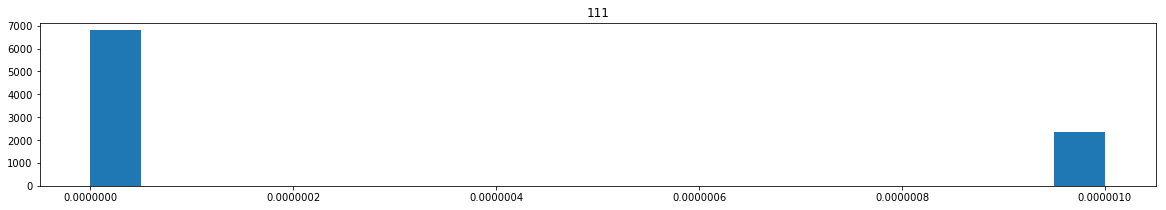

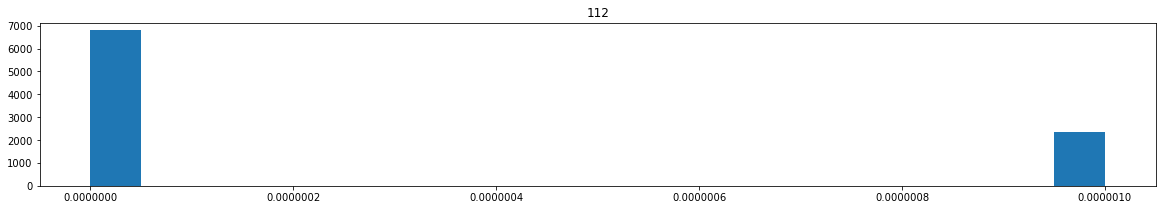

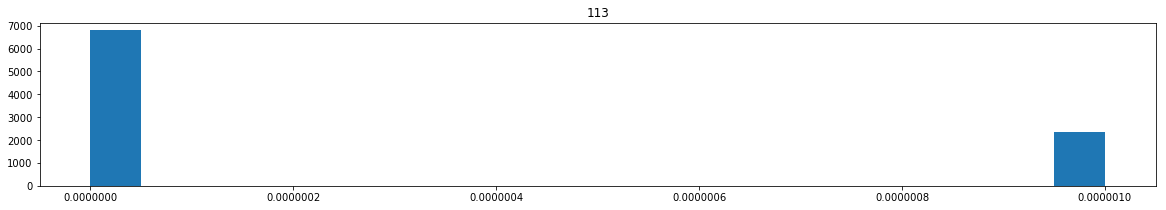

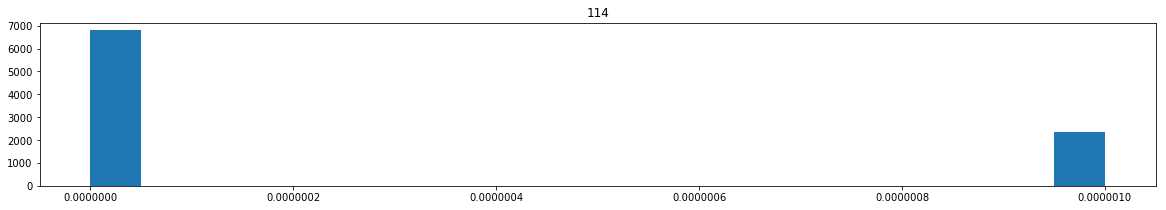

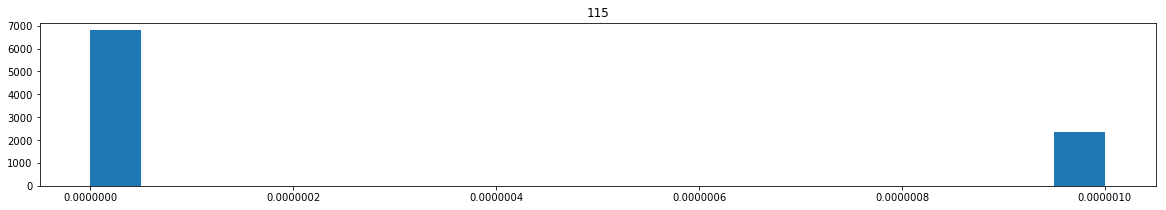

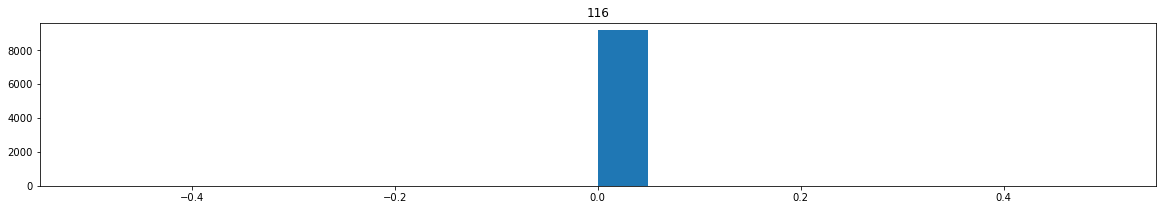

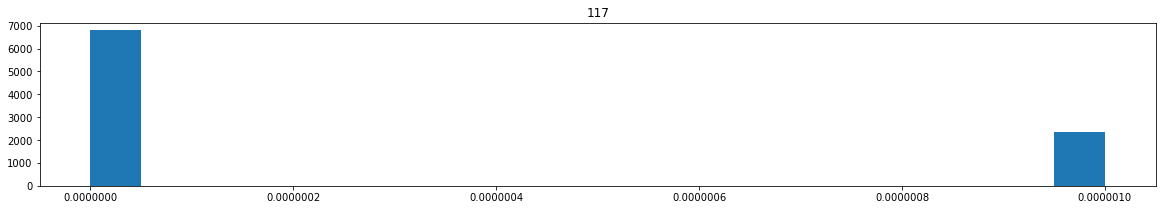

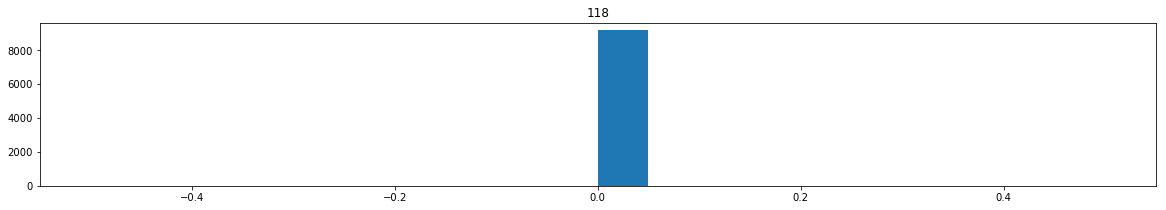

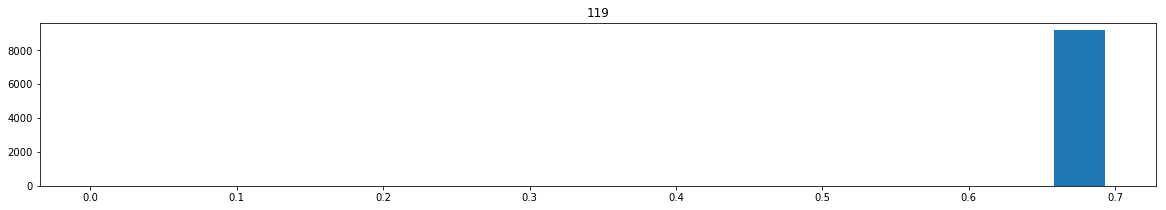

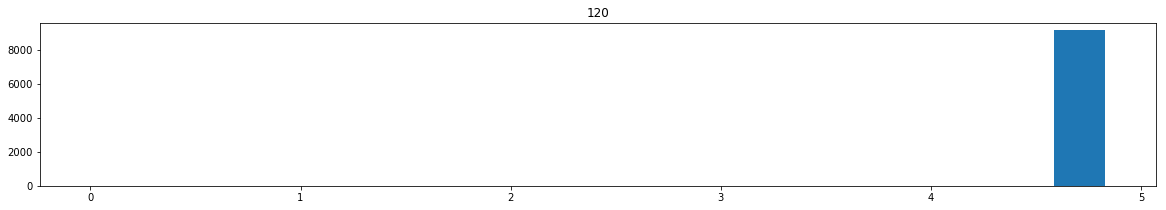

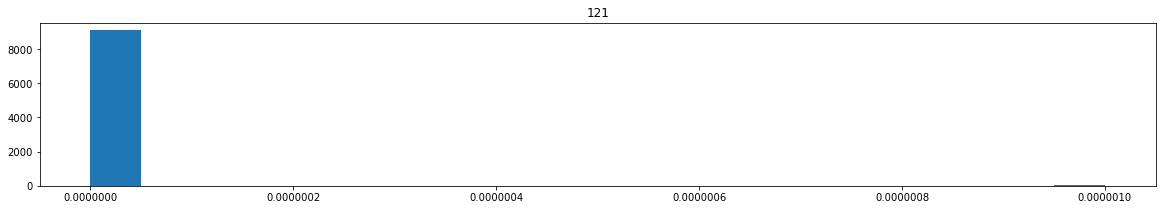

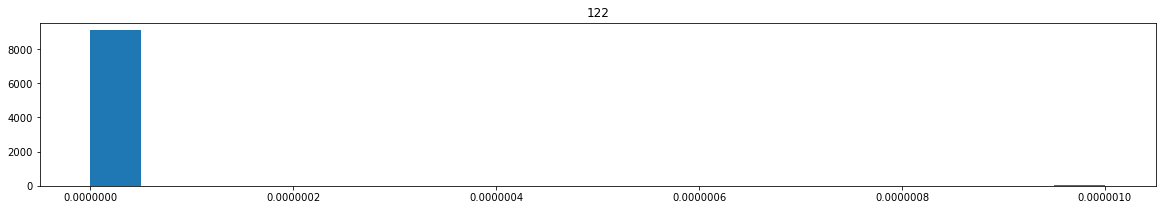

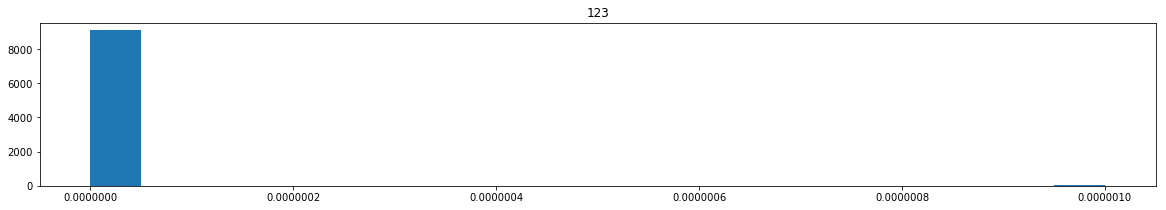

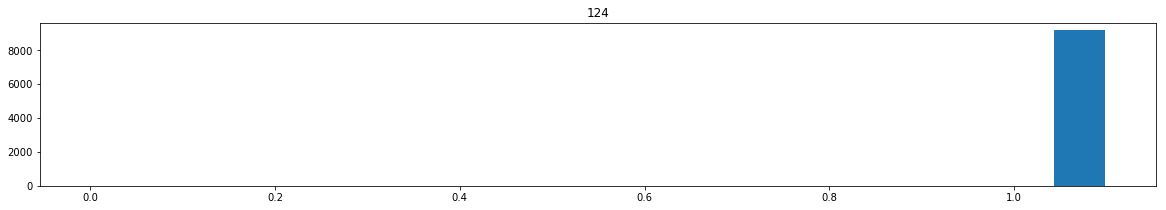

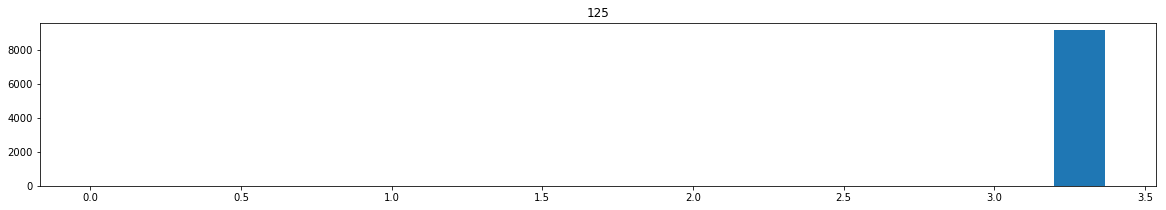

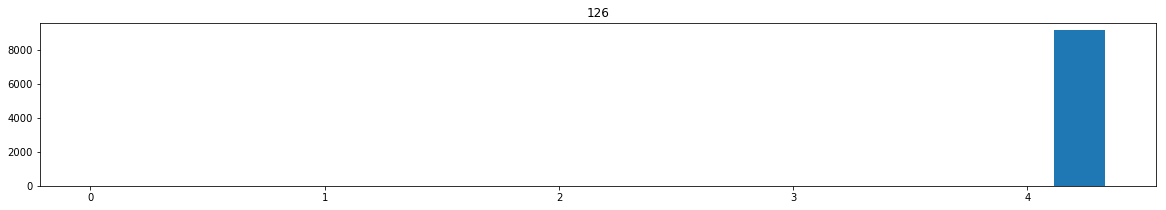

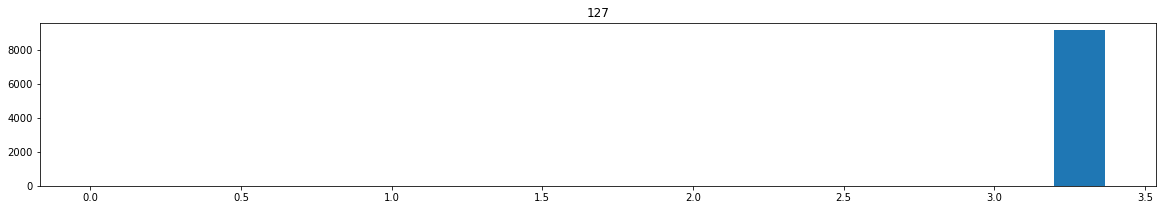

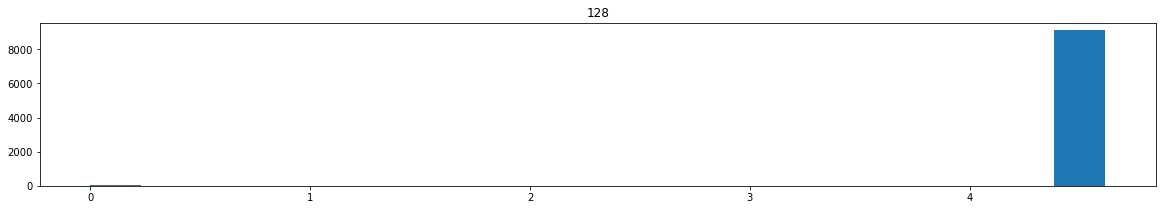

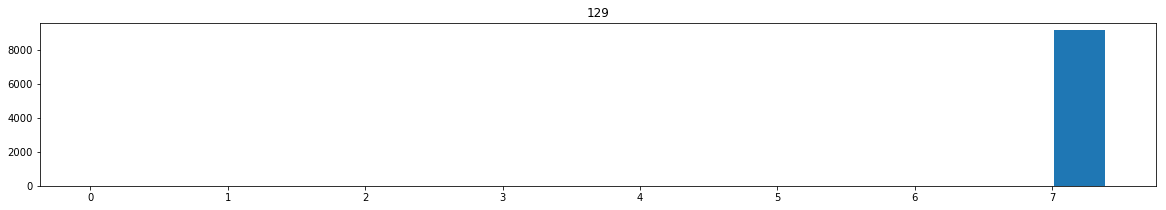

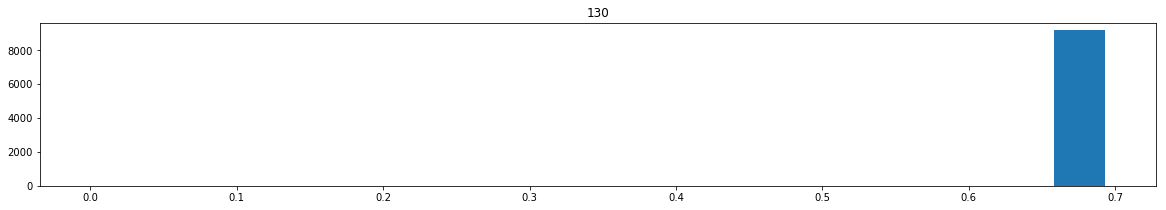

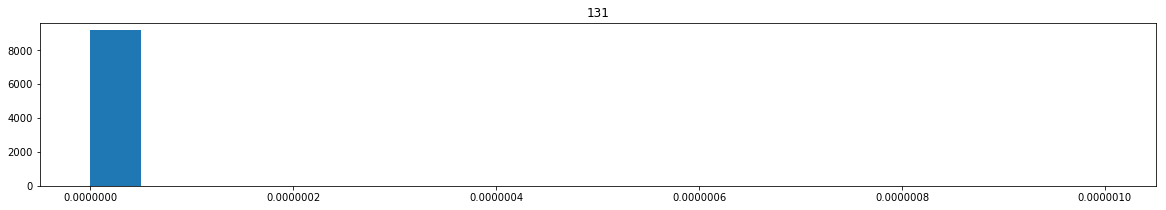

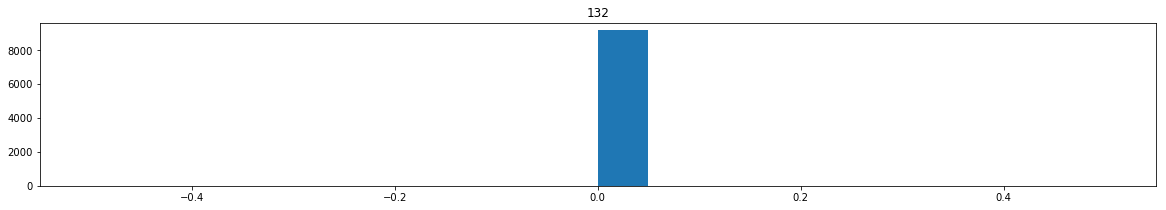

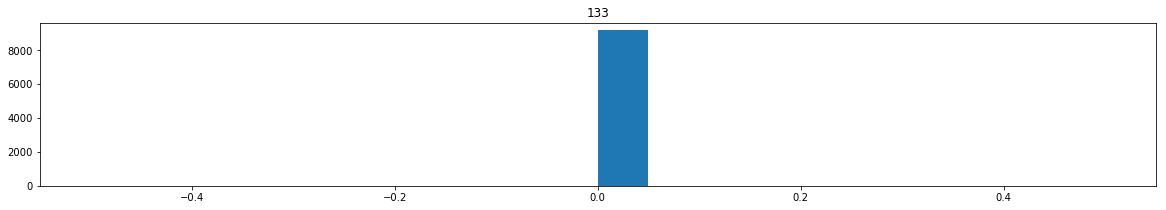

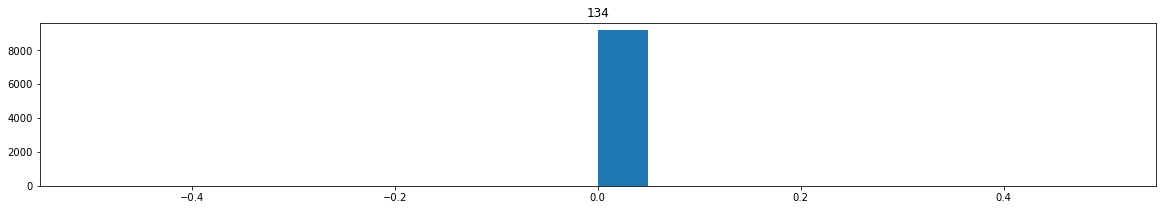

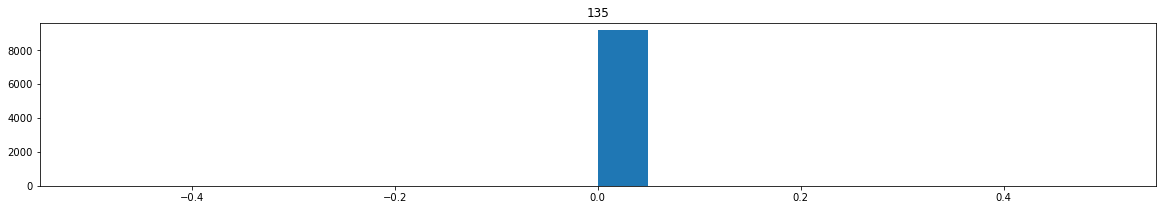

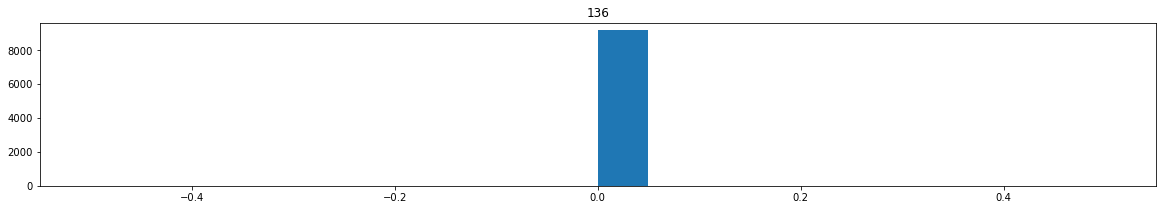

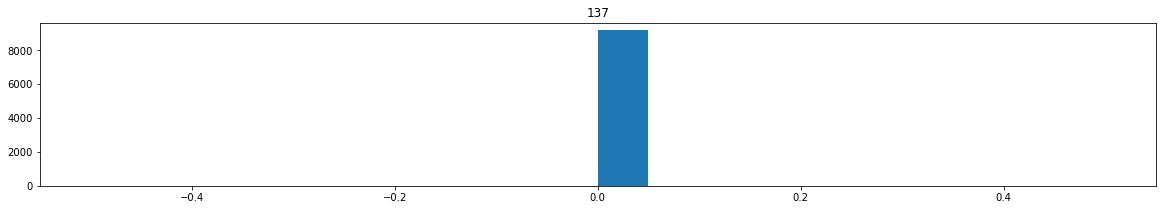

In [64]:
for i in range(columns_number):
    plt.figure(figsize=(20, 3))
    log_col = np.log(1 + max(samplesT[i]) - samplesT[i])
    plt.hist(log_col, bins=20, range=(log_col.min(), log_col.max()))
    plt.title(i)
    plt.show()

In [67]:
y = samplesT[0]
print(y)

[ 0.  0.  0. ...,  1.  1.  1.]


In [68]:
filtered_data = []
for i in range(columns_number):
    if i in {0, 1, 2, 5, 6, 7, 8, 9, 16, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 33, 49, 50, 51, 52, 53, 54, 55, 60, 61, 62, 67, 70, 71, 73, 86, 87, 89, 90, 91, 102, 103, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137}:
        pass
    else:
        filtered_data.append(samplesT[i])
filtered_data = np.asarray(filtered_data)

In [69]:
print(filtered_data.shape)

(77, 9153)


In [70]:
for i in range(77):
    for j in range(n):
        if filtered_data[i][j] == 0:
            filtered_data[i][j] = 10**(-9)

In [71]:
filtered_data = np.nan_to_num(filtered_data)

In [72]:
# run PCA
pca1 = PCA(filtered_data.T)

important_columns = np.argsort(np.abs(pca1.Wt), axis=1)[:10, -10:]
print(important_columns)

[[34 35 36 37 39 40 41 27 76 12]
 [65 64  3 10  1  9  7  6  4  5]
 [65 64  5  4  2  8  3  1  9 10]
 [ 5  2  1  8  4  9 10  3 64 65]
 [ 2  7 10  9  6  1  8  3  0 11]
 [ 2  4 10  6  9  1 11  3  8  0]
 [11  5  9  1  3  6  2  4  8 75]
 [ 4  8  9 10  7  3  0 11  1  2]
 [ 9  7  4  5  1  6 11  0  3  8]
 [10  5  4  6  7  1  8  3  0 11]]


In [73]:
important_columns_set = set()
for elem in important_columns.flatten():
    important_columns_set.add(elem)
print(important_columns_set)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 27, 34, 35, 36, 37, 39, 40, 41, 64, 65, 75, 76}


In [74]:
pca_filtered_data = []
for i in range(43):
    if i in {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 27, 34, 35, 36, 37, 39, 40, 41, 64, 65, 75, 76}:
        pca_filtered_data.append(filtered_data[i])
        
pca_filtered_data = np.asarray(pca_filtered_data)

Нулевой столбец при этом всем сохранился.

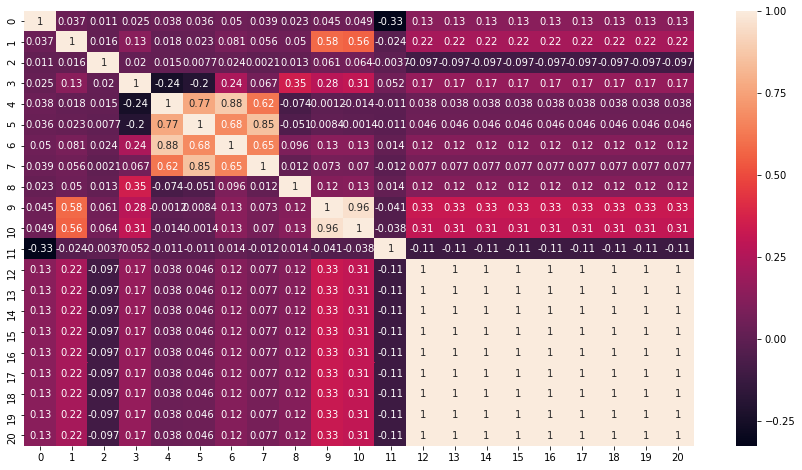

In [75]:
ax = plt.axes()
seaborn.heatmap(np.corrcoef(pca_filtered_data), annot=True, ax=ax)
plt.show()

Кажется здесь есть повальная корреляция. Уберем.

In [76]:
final_data = []
for i in range(21):
    if i in {10, 13, 14, 15, 16, 17, 18, 19}:
        pass
    else:
        final_data.append(pca_filtered_data[i])
final_data = np.asarray(final_data)

In [77]:
print(final_data.shape)

(13, 9153)


In [78]:
X = final_data.T

# Классификаторы

## Linear regression

In [107]:
model = LinearRegression()

In [108]:
print(y.sum())

2043.0


In [109]:
print(X.shape, y.shape)

(9153, 13) (9153,)


In [116]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [119]:
y_pred = model.predict(X)
n = len(y_pred)

In [120]:
y_pred = np.zeros(n) * (y_pred < 0.5) + np.ones(n) * (y_pred >= 0.5)

In [121]:
precision_recall_fscore_support(y, y_pred)

(array([ 0.99586953,  0.94465291]),
 array([ 0.98340366,  0.98580519]),
 array([ 0.98959734,  0.96479042]),
 array([7110, 2043]))

In [123]:
accuracy_score(y, y_pred)

0.98393969190429365

# Test

In [145]:
data = pd.read_table('dataset_16_3_test', sep='\t', header=None)

In [146]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,be9b03b1adc603e94561712191b3ea1f,5ace8c349b91577dcc1431e62c5245e6,-,0,1415669614,0.0,-,-,0,0,...,-,-,-,-,0,0,0,1,0,0
1,4bfa3aed3ba9b452aff5e6740b104b11,453253a6f2ef1115926c3c4ea6125898,-,0,1412745425,34.0,-,-,0,0,...,-,-,-,-,0,0,0,1,0,0
2,b5070c2c19906d0e3c059cb53b35051d,88403755fc49bb8223e33069d5ea0684,-,0,1415705463,0.0,-,-,0,0,...,-,-,-,-,0,0,0,1,0,0
3,6dd4521839ad84eed97cd2625a484b55,4924a4f66881db17afe9a799dcc07675,-,0,1415730192,0.0,-,-,0,0,...,-,-,-,-,0,0,0,1,0,0
4,6c153e673ec08bee397a0867fc2db085,2ac40bf155266234e2e3d48903605fc3,-,0,1407846475,90.0,-,-,0,0,...,-,-,-,-,0,0,0,1,0,0


In [147]:
del data[0]
del data[1]

In [148]:
columns_number = 139
n = len(data)
print(n)
eps = 10**(-6)
converted_data = pd.DataFrame()
for index, row in tqdm(data.iterrows()):
    new_row = []
    for i in range(2, columns_number):
        new_row.append(convert(row[i]))
    converted_data = converted_data.append([new_row])

6it [00:00, 59.53it/s]

3727


3727it [00:55, 66.57it/s]


In [151]:
samples = np.asarray(converted_data)
samplesT = samples.T

In [152]:
columns_number -=2
filtered_data = []
for i in range(columns_number):
    if i in {0, 1, 4, 5, 6, 7, 8, 15, 17, 18, 19, 20, 21, 24, 25, 26, 27, 29, 32, 48, 49, 50, 51, 52, 53, 54, 59, 60, 61, 66, 69, 70, 72, 85, 86, 88, 89, 90, 101, 102, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136}:
        pass
    else:
        filtered_data.append(samplesT[i])
filtered_data = np.asarray(filtered_data)
for i in range(77):
    for j in range(n):
        if filtered_data[i][j] == 0:
            filtered_data[i][j] = 10**(-9)
filtered_data = np.nan_to_num(filtered_data)
pca_filtered_data = []
for i in range(43):
    if i in {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 27, 34, 35, 36, 37, 39, 40, 41, 64, 65, 75, 76}:
        pca_filtered_data.append(filtered_data[i])
        
pca_filtered_data = np.asarray(pca_filtered_data)
final_data = []
for i in range(21):
    if i in {10, 13, 14, 15, 16, 17, 18, 19}:
        pass
    else:
        final_data.append(pca_filtered_data[i])
final_data = np.asarray(final_data)
print(final_data.shape)
X = final_data.T

(13, 3727)


In [153]:
y_pred = model.predict(X)

In [154]:
y_pred = np.zeros(n) * (y_pred < 0.5) + np.ones(n) * (y_pred >= 0.5)

In [156]:
with open('out', 'w') as f:
    for elem in y_pred:
        f.write(str(int(elem)) + '\n')